In [5]:
import sys
sys.path.append('F:\Cambridge\Project\MHMC-for-VAE\change_of_variable')
sys.path.append('F:\Cambridge\Project\MHMC-for-VAE\hmc_pytorch')
from change_of_variable_pytorch import * 
from hmc_base_pytorch import *
from hmc_unconstrained_pytorch import *
import autograd.numpy as np
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal

In [6]:
def transform(y):
    return torch.log(1 + torch.exp(y))

def x_pdf(x):
    mean = torch.tensor([0., 0.])
    cov = torch.eye(2)
    m = MultivariateNormal(mean, cov)
    m.requires_grad=True
    n = torch.exp(m.log_prob(x))
    #n.requires_grad=True
    return n

def energy_function(y, cache):
    y.retain_grad()
    p = reparameter_pdf(transform, x_pdf, y)
    #y.grad.zero_()
    return 0-torch.log(p)

In [5]:
energy_function(init, None)

x tensor([ 0.6931,  0.6931])
y grad tensor([ 0.5000,  0.5000])
px tensor(1.00000e-02 *
       9.8438)
result tensor(1.00000e-02 *
       [ 4.9219,  4.9219])


tensor([ 3.0115,  3.0115])

In [18]:
def jacobian(inputs, outputs):
    return torch.stack([grad([outputs[:, i].sum()], [inputs], retain_graph=True, create_graph=True)[0]
                        for i in range(outputs.size(1))], dim=-1)

In [43]:
x = torch.tensor([1.,2.], requires_grad=True)
#y = transform(x)
y = torch.zeros(2)
y[0] = x[0]+1
y[1] = x[1]**2+x[0]+1
gradients = torch.tensor([0., 1], dtype=torch.float)
y.backward(gradients)
x.grad

tensor([ 1.,  4.])

In [39]:
y = torch.zeros(2)
y

tensor([ 0.,  0.])

In [16]:
one = torch.tensor([1., 1.])
x= torch.tensor([0.5, 0.5], requires_grad=True)
x = x/x[0].item()
p = torch.equal(one, x)
if p ==True:
    raise ValueError('A very specific bad thing happened.')

ValueError: A very specific bad thing happened.

In [7]:
sampler = IsotropicHmcSampler(energy_function, energy_grad=None, prng=None,
                 mom_resample_coeff=1., dtype=np.float64)
init = torch.tensor([0., 0.], requires_grad=True)
pos_samples, mom_samples, ratio = sampler.get_samples(init, 0.1, 6, 1000, torch.tensor([[1.,0.],[0.,1.]], requires_grad=True))
#num = pos_samples.shape[0]
#y_list = []
#for i in range(num):
#    y_list.append(pos_samples[i].item())

========== 1st hamiltonian ==============
x tensor([ 0.6931,  0.6931])
tensor(0.2500)
px tensor(1.00000e-02 *
       9.8438)
result tensor(1.00000e-02 *
       2.4609)
Sample: 1
========== simulate ==============
------calling energy function------
x tensor([ 0.6931,  0.6931])
tensor(0.2500)
px tensor(1.00000e-02 *
       9.8438)
result tensor(1.00000e-02 *
       2.4609)
g:tensor([ 0.3466,  0.3466])
------calling energy function------
x tensor([ 0.7943,  0.5784])
tensor(0.2407)
px tensor(1.00000e-02 *
       9.8216)
result tensor(1.00000e-02 *
       2.3643)
g:tensor([ 0.4353,  0.2540])
------calling energy function------
x tensor([ 0.9020,  0.4774])
tensor(0.2256)
px tensor(1.00000e-02 *
       9.4548)
result tensor(1.00000e-02 *
       2.1327)
g:tensor([ 0.5360,  0.1812])
------calling energy function------
x tensor([ 1.0149,  0.3901])
tensor(0.2059)
px tensor(1.00000e-02 *
       8.8126)
result tensor(1.00000e-02 *
       1.8148)
g:tensor([ 0.6471,  0.1260])
------calling energy fu

px tensor(0.1186)
result tensor(1.00000e-02 *
       1.3981)
g:tensor([ 0.0598,  0.3707])
------calling energy function------
x tensor([ 0.2614,  0.7193])
tensor(0.1180)
px tensor(0.1188)
result tensor(1.00000e-02 *
       1.4012)
g:tensor([ 0.0601,  0.3689])
------calling energy function------
x tensor([ 0.2622,  0.7153])
tensor(0.1178)
px tensor(0.1191)
result tensor(1.00000e-02 *
       1.4030)
g:tensor([ 0.0605,  0.3655])
------calling energy function------
x tensor([ 0.2627,  0.7095])
tensor(0.1174)
px tensor(0.1195)
result tensor(1.00000e-02 *
       1.4035)
g:tensor([ 0.0607,  0.3605])
========== 2nd hamiltonian ==============
x tensor([ 0.2627,  0.7095])
tensor(0.1174)
px tensor(0.1195)
result tensor(1.00000e-02 *
       1.4035)
========== 3rd hamiltonian ==============
x tensor([ 0.2627,  0.7095])
tensor(0.1174)
px tensor(0.1195)
result tensor(1.00000e-02 *
       1.4035)
Sample: 8
========== simulate ==============
------calling energy function------
x tensor([ 0.2627,  0.709

x tensor([ 1.6858,  0.2157])
tensor(0.1581)
px tensor(1.00000e-02 *
       3.7547)
result tensor(1.00000e-03 *
       5.9350)
Sample: 15
========== simulate ==============
------calling energy function------
x tensor([ 1.6858,  0.2157])
tensor(0.1581)
px tensor(1.00000e-02 *
       3.7547)
result tensor(1.00000e-03 *
       5.9350)
g:tensor([ 1.3735,  0.0418])
------calling energy function------
x tensor([ 1.6823,  0.2209])
tensor(0.1613)
px tensor(1.00000e-02 *
       3.7730)
result tensor(1.00000e-03 *
       6.0873)
g:tensor([ 1.3695,  0.0438])
------calling energy function------
x tensor([ 1.6676,  0.2261])
tensor(0.1642)
px tensor(1.00000e-02 *
       3.8624)
result tensor(1.00000e-03 *
       6.3413)
g:tensor([ 1.3529,  0.0458])
------calling energy function------
x tensor([ 1.6420,  0.2313])
tensor(0.1665)
px tensor(1.00000e-02 *
       4.0244)
result tensor(1.00000e-03 *
       6.7026)
g:tensor([ 1.3242,  0.0478])
------calling energy function------
x tensor([ 1.6060,  0.2366])

x tensor([ 0.5302,  0.8108])
tensor(0.2286)
px tensor(1.00000e-02 *
       9.9549)
result tensor(1.00000e-02 *
       2.2756)
g:tensor([ 0.2182,  0.4504])
------calling energy function------
x tensor([ 0.5763,  0.7912])
tensor(0.2395)
px tensor(1.00000e-02 *
       9.8575)
result tensor(1.00000e-02 *
       2.3606)
g:tensor([ 0.2524,  0.4325])
------calling energy function------
x tensor([ 0.6241,  0.7696])
tensor(0.2492)
px tensor(1.00000e-02 *
       9.7413)
result tensor(1.00000e-02 *
       2.4278)
g:tensor([ 0.2898,  0.4131])
------calling energy function------
x tensor([ 0.6733,  0.7463])
tensor(0.2577)
px tensor(1.00000e-02 *
       9.6039)
result tensor(1.00000e-02 *
       2.4746)
g:tensor([ 0.3299,  0.3924])
------calling energy function------
x tensor([ 0.7234,  0.7214])
tensor(0.2646)
px tensor(1.00000e-02 *
       9.4444)
result tensor(1.00000e-02 *
       2.4992)
g:tensor([ 0.3725,  0.3707])
------calling energy function------
x tensor([ 0.7741,  0.6952])
tensor(0.2700)
p

tensor(0.2781)
px tensor(1.00000e-02 *
       8.4855)
result tensor(1.00000e-02 *
       2.3597)
g:tensor([ 0.2771,  0.5751])
------calling energy function------
x tensor([ 0.5662,  0.9897])
tensor(0.2716)
px tensor(1.00000e-02 *
       8.3084)
result tensor(1.00000e-02 *
       2.2568)
g:tensor([ 0.2448,  0.6218])
------calling energy function------
x tensor([ 0.5254,  1.0344])
tensor(0.2634)
px tensor(1.00000e-02 *
       8.1197)
result tensor(1.00000e-02 *
       2.1388)
g:tensor([ 0.2147,  0.6667])
------calling energy function------
x tensor([ 0.4860,  1.0759])
tensor(0.2537)
px tensor(1.00000e-02 *
       7.9284)
result tensor(1.00000e-02 *
       2.0111)
g:tensor([ 0.1871,  0.7090])
========== 2nd hamiltonian ==============
x tensor([ 0.4860,  1.0759])
tensor(0.2537)
px tensor(1.00000e-02 *
       7.9284)
result tensor(1.00000e-02 *
       2.0111)
========== 3rd hamiltonian ==============
x tensor([ 0.4860,  1.0759])
tensor(0.2537)
px tensor(1.00000e-02 *
       7.9284)
result t

g:tensor([ 0.0042,  0.5507])
------calling energy function------
x tensor([ 0.0562,  0.8933])
tensor(1.00000e-02 *
       3.2262)
px tensor(0.1066)
result tensor(1.00000e-03 *
       3.4399)
g:tensor([ 0.0031,  0.5277])
------calling energy function------
x tensor([ 0.0481,  0.8667])
tensor(1.00000e-02 *
       2.7228)
px tensor(0.1092)
result tensor(1.00000e-03 *
       2.9731)
g:tensor([ 0.0023,  0.5024])
------calling energy function------
x tensor([ 0.0412,  0.8378])
tensor(1.00000e-02 *
       2.2892)
px tensor(0.1120)
result tensor(1.00000e-03 *
       2.5628)
g:tensor([ 0.0017,  0.4753])
------calling energy function------
x tensor([ 0.0352,  0.8068])
tensor(1.00000e-02 *
       1.9174)
px tensor(0.1149)
result tensor(1.00000e-03 *
       2.2024)
g:tensor([ 0.0012,  0.4468])
========== 2nd hamiltonian ==============
x tensor([ 0.0352,  0.8068])
tensor(1.00000e-02 *
       1.9174)
px tensor(0.1149)
result tensor(1.00000e-03 *
       2.2024)
========== 3rd hamiltonian ============

g:tensor([ 0.0198,  0.2102])
========== 2nd hamiltonian ==============
x tensor([ 0.1460,  0.5191])
tensor(1.00000e-02 *
       5.5015)
px tensor(0.1376)
result tensor(1.00000e-03 *
       7.5710)
========== 3rd hamiltonian ==============
x tensor([ 0.1460,  0.5191])
tensor(1.00000e-02 *
       5.5015)
px tensor(0.1376)
result tensor(1.00000e-03 *
       7.5710)
Sample: 41
========== simulate ==============
------calling energy function------
x tensor([ 0.1460,  0.5191])
tensor(1.00000e-02 *
       5.5015)
px tensor(0.1376)
result tensor(1.00000e-03 *
       7.5710)
g:tensor([ 0.0198,  0.2102])
------calling energy function------
x tensor([ 0.1499,  0.4704])
tensor(1.00000e-02 *
       5.2241)
px tensor(0.1409)
result tensor(1.00000e-03 *
       7.3604)
g:tensor([ 0.0209,  0.1765])
------calling energy function------
x tensor([ 0.1539,  0.4248])
tensor(1.00000e-02 *
       4.9356)
px tensor(0.1437)
result tensor(1.00000e-03 *
       7.0932)
g:tensor([ 0.0219,  0.1470])
------calling en

tensor(1.00000e-02 *
       3.6366)
px tensor(0.1321)
result tensor(1.00000e-03 *
       4.8024)
g:tensor([ 0.2748,  0.0067])
------calling energy function------
x tensor([ 0.6407,  0.0844])
tensor(1.00000e-02 *
       3.8285)
px tensor(0.1292)
result tensor(1.00000e-03 *
       4.9450)
g:tensor([ 0.3031,  0.0068])
------calling energy function------
x tensor([ 0.6761,  0.0853])
tensor(1.00000e-02 *
       4.0181)
px tensor(0.1262)
result tensor(1.00000e-03 *
       5.0701)
g:tensor([ 0.3322,  0.0070])
------calling energy function------
x tensor([ 0.7111,  0.0862])
tensor(1.00000e-02 *
       4.2043)
px tensor(0.1231)
result tensor(1.00000e-03 *
       5.1773)
g:tensor([ 0.3619,  0.0071])
------calling energy function------
x tensor([ 0.7454,  0.0872])
tensor(1.00000e-02 *
       4.3859)
px tensor(0.1201)
result tensor(1.00000e-03 *
       5.2670)
g:tensor([ 0.3917,  0.0073])
------calling energy function------
x tensor([ 0.7788,  0.0881])
tensor(1.00000e-02 *
       4.5617)
px tensor

tensor(1.00000e-02 *
       4.6667)
px tensor(0.1318)
result tensor(1.00000e-03 *
       6.1526)
g:tensor([ 0.2738,  0.0112])
------calling energy function------
x tensor([ 0.6137,  0.1114])
tensor(1.00000e-02 *
       4.8334)
px tensor(0.1310)
result tensor(1.00000e-03 *
       6.3327)
g:tensor([ 0.2815,  0.0117])
------calling energy function------
x tensor([ 0.6223,  0.1141])
tensor(1.00000e-02 *
       4.9970)
px tensor(0.1303)
result tensor(1.00000e-03 *
       6.5105)
g:tensor([ 0.2883,  0.0123])
------calling energy function------
x tensor([ 0.6296,  0.1170])
tensor(1.00000e-02 *
       5.1569)
px tensor(0.1297)
result tensor(1.00000e-03 *
       6.6861)
g:tensor([ 0.2941,  0.0129])
------calling energy function------
x tensor([ 0.6356,  0.1198])
tensor(1.00000e-02 *
       5.3124)
px tensor(0.1291)
result tensor(1.00000e-03 *
       6.8593)
g:tensor([ 0.2989,  0.0135])
------calling energy function------
x tensor([ 0.6402,  0.1228])
tensor(1.00000e-02 *
       5.4627)
px tensor

g:tensor([ 0.2774,  0.0039])
========== 2nd hamiltonian ==============
x tensor([ 0.6086,  0.0635])
tensor(1.00000e-02 *
       2.8040)
px tensor(0.1320)
result tensor(1.00000e-03 *
       3.7009)
========== 3rd hamiltonian ==============
x tensor([ 0.6086,  0.0635])
tensor(1.00000e-02 *
       2.8040)
px tensor(0.1320)
result tensor(1.00000e-03 *
       3.7009)
Sample: 58
========== simulate ==============
------calling energy function------
x tensor([ 0.6086,  0.0635])
tensor(1.00000e-02 *
       2.8040)
px tensor(0.1320)
result tensor(1.00000e-03 *
       3.7009)
g:tensor([ 0.2774,  0.0039])
------calling energy function------
x tensor([ 0.5779,  0.0584])
tensor(1.00000e-02 *
       2.4890)
px tensor(0.1344)
result tensor(1.00000e-03 *
       3.3463)
g:tensor([ 0.2537,  0.0033])
------calling energy function------
x tensor([ 0.5474,  0.0537])
tensor(1.00000e-02 *
       2.2026)
px tensor(0.1368)
result tensor(1.00000e-03 *
       3.0134)
g:tensor([ 0.2308,  0.0028])
------calling en

g:tensor([ 0.2133,  0.0009])
------calling energy function------
x tensor([ 0.5440,  0.0269])
tensor(1.00000e-02 *
       1.1116)
px tensor(0.1372)
result tensor(1.00000e-03 *
       1.5253)
g:tensor([ 0.2283,  0.0007])
------calling energy function------
x tensor([ 0.5642,  0.0245])
tensor(1.00000e-02 *
       1.0432)
px tensor(0.1357)
result tensor(1.00000e-03 *
       1.4156)
g:tensor([ 0.2433,  0.0006])
------calling energy function------
x tensor([ 0.5839,  0.0223])
tensor(1.00000e-03 *
       9.7690)
px tensor(0.1342)
result tensor(1.00000e-03 *
       1.3108)
g:tensor([ 0.2582,  0.0005])
------calling energy function------
x tensor([ 0.6029,  0.0204])
tensor(1.00000e-03 *
       9.1289)
px tensor(0.1327)
result tensor(1.00000e-03 *
       1.2112)
g:tensor([ 0.2729,  0.0004])
========== 2nd hamiltonian ==============
x tensor([ 0.6029,  0.0204])
tensor(1.00000e-03 *
       9.1289)
px tensor(0.1327)
result tensor(1.00000e-03 *
       1.2112)
========== 3rd hamiltonian ============

g:tensor([ 0.1597,  0.0020])
------calling energy function------
x tensor([ 0.4429,  0.0520])
tensor(1.00000e-02 *
       1.8121)
px tensor(0.1441)
result tensor(1.00000e-03 *
       2.6110)
g:tensor([ 0.1585,  0.0026])
------calling energy function------
x tensor([ 0.4406,  0.0603])
tensor(1.00000e-02 *
       2.0865)
px tensor(0.1442)
result tensor(1.00000e-03 *
       3.0082)
g:tensor([ 0.1570,  0.0035])
------calling energy function------
x tensor([ 0.4377,  0.0700])
tensor(1.00000e-02 *
       2.3969)
px tensor(0.1443)
result tensor(1.00000e-03 *
       3.4579)
g:tensor([ 0.1551,  0.0047])
------calling energy function------
x tensor([ 0.4343,  0.0812])
tensor(1.00000e-02 *
       2.7464)
px tensor(0.1444)
result tensor(1.00000e-03 *
       3.9647)
g:tensor([ 0.1530,  0.0063])
========== 2nd hamiltonian ==============
x tensor([ 0.4343,  0.0812])
tensor(1.00000e-02 *
       2.7464)
px tensor(0.1444)
result tensor(1.00000e-03 *
       3.9647)
========== 3rd hamiltonian ============

g:tensor([ 0.0250,  0.1884])
------calling energy function------
x tensor([ 0.1687,  0.5380])
tensor(1.00000e-02 *
       6.4599)
px tensor(0.1358)
result tensor(1.00000e-03 *
       8.7701)
g:tensor([ 0.0262,  0.2239])
========== 2nd hamiltonian ==============
x tensor([ 0.1687,  0.5380])
tensor(1.00000e-02 *
       6.4599)
px tensor(0.1358)
result tensor(1.00000e-03 *
       8.7701)
========== 3rd hamiltonian ==============
x tensor([ 0.1687,  0.5380])
tensor(1.00000e-02 *
       6.4599)
px tensor(0.1358)
result tensor(1.00000e-03 *
       8.7701)
Sample: 74
========== simulate ==============
------calling energy function------
x tensor([ 0.1687,  0.5380])
tensor(1.00000e-02 *
       6.4599)
px tensor(0.1358)
result tensor(1.00000e-03 *
       8.7701)
g:tensor([ 0.0262,  0.2239])
------calling energy function------
x tensor([ 0.1895,  0.5362])
tensor(1.00000e-02 *
       7.1646)
px tensor(0.1354)
result tensor(1.00000e-03 *
       9.7000)
g:tensor([ 0.0327,  0.2226])
------calling en

g:tensor([ 0.4934,  0.0039])
------calling energy function------
x tensor([ 0.8752,  0.0650])
tensor(1.00000e-02 *
       3.6684)
px tensor(0.1083)
result tensor(1.00000e-03 *
       3.9725)
g:tensor([ 0.5104,  0.0041])
------calling energy function------
x tensor([ 0.8904,  0.0669])
tensor(1.00000e-02 *
       3.8149)
px tensor(0.1068)
result tensor(1.00000e-03 *
       4.0755)
g:tensor([ 0.5249,  0.0043])
------calling energy function------
x tensor([ 0.9026,  0.0689])
tensor(1.00000e-02 *
       3.9578)
px tensor(0.1057)
result tensor(1.00000e-03 *
       4.1815)
g:tensor([ 0.5366,  0.0046])
------calling energy function------
x tensor([ 0.9118,  0.0709])
tensor(1.00000e-02 *
       4.0964)
px tensor(0.1048)
result tensor(1.00000e-03 *
       4.2915)
g:tensor([ 0.5454,  0.0049])
========== 2nd hamiltonian ==============
x tensor([ 0.9118,  0.0709])
tensor(1.00000e-02 *
       4.0964)
px tensor(0.1048)
result tensor(1.00000e-03 *
       4.2915)
========== 3rd hamiltonian ============

g:tensor([ 0.9465,  0.0117])
------calling energy function------
x tensor([ 1.1830,  0.1062])
tensor(1.00000e-02 *
       6.9913)
px tensor(1.00000e-02 *
       7.8609)
result tensor(1.00000e-03 *
       5.4958)
g:tensor([ 0.8206,  0.0107])
------calling energy function------
x tensor([ 1.0657,  0.1015])
tensor(1.00000e-02 *
       6.3245)
px tensor(1.00000e-02 *
       8.9733)
result tensor(1.00000e-03 *
       5.6752)
g:tensor([ 0.6986,  0.0098])
========== 2nd hamiltonian ==============
x tensor([ 1.0657,  0.1015])
tensor(1.00000e-02 *
       6.3245)
px tensor(1.00000e-02 *
       8.9733)
result tensor(1.00000e-03 *
       5.6752)
========== 3rd hamiltonian ==============
x tensor([ 1.7326,  0.1333])
tensor(0.1027)
px tensor(1.00000e-02 *
       3.5165)
result tensor(1.00000e-03 *
       3.6123)
Sample: 85
========== simulate ==============
------calling energy function------
x tensor([ 1.7326,  0.1333])
tensor(0.1027)
px tensor(1.00000e-02 *
       3.5165)
result tensor(1.00000e-03

g:tensor([ 0.2038,  0.0014])
========== 2nd hamiltonian ==============
x tensor([ 0.5100,  0.0379])
tensor(1.00000e-02 *
       1.4859)
px tensor(0.1396)
result tensor(1.00000e-03 *
       2.0750)
========== 3rd hamiltonian ==============
x tensor([ 1.0114,  0.0448])
tensor(1.00000e-02 *
       2.7848)
px tensor(1.00000e-02 *
       9.5337)
result tensor(1.00000e-03 *
       2.6549)
Sample: 90
========== simulate ==============
------calling energy function------
x tensor([ 1.0114,  0.0448])
tensor(1.00000e-02 *
       2.7848)
px tensor(1.00000e-02 *
       9.5337)
result tensor(1.00000e-03 *
       2.6549)
g:tensor([ 0.6435,  0.0020])
------calling energy function------
x tensor([ 1.0121,  0.0429])
tensor(1.00000e-02 *
       2.6741)
px tensor(1.00000e-02 *
       9.5277)
result tensor(1.00000e-03 *
       2.5478)
g:tensor([ 0.6442,  0.0018])
------calling energy function------
x tensor([ 1.0087,  0.0412])
tensor(1.00000e-02 *
       2.5616)
px tensor(1.00000e-02 *
       9.5612)
resu

g:tensor(1.00000e-02 *
       [ 1.4836,  0.1040])
------calling energy function------
x tensor([ 0.1355,  0.0363])
tensor(1.00000e-03 *
       4.5133)
px tensor(0.1576)
result tensor(1.00000e-04 *
       7.1128)
g:tensor(1.00000e-02 *
       [ 1.7171,  0.1292])
------calling energy function------
x tensor([ 0.1461,  0.0404])
tensor(1.00000e-03 *
       5.3849)
px tensor(0.1573)
result tensor(1.00000e-04 *
       8.4725)
g:tensor(1.00000e-02 *
       [ 1.9846,  0.1602])
------calling energy function------
x tensor([ 0.1573,  0.0451])
tensor(1.00000e-03 *
       6.4158)
px tensor(0.1570)
result tensor(1.00000e-03 *
       1.0075)
g:tensor(1.00000e-02 *
       [ 2.2903,  0.1986])
------calling energy function------
x tensor([ 0.1694,  0.0502])
tensor(1.00000e-03 *
       7.6324)
px tensor(0.1567)
result tensor(1.00000e-03 *
       1.1959)
g:tensor(1.00000e-02 *
       [ 2.6388,  0.2461])
------calling energy function------
x tensor([ 0.1822,  0.0560])
tensor(1.00000e-03 *
       9.0647)
p

g:tensor(1.00000e-02 *
       [ 2.4359,  2.1772])
========== 2nd hamiltonian ==============
x tensor([ 0.1625,  0.1532])
tensor(1.00000e-02 *
       2.1304)
px tensor(0.1552)
result tensor(1.00000e-03 *
       3.3071)
========== 3rd hamiltonian ==============
x tensor([ 0.1625,  0.1532])
tensor(1.00000e-02 *
       2.1304)
px tensor(0.1552)
result tensor(1.00000e-03 *
       3.3071)
Sample: 100
========== simulate ==============
------calling energy function------
x tensor([ 0.1625,  0.1532])
tensor(1.00000e-02 *
       2.1304)
px tensor(0.1552)
result tensor(1.00000e-03 *
       3.3071)
g:tensor(1.00000e-02 *
       [ 2.4359,  2.1772])
------calling energy function------
x tensor([ 0.1588,  0.1175])
tensor(1.00000e-02 *
       1.6287)
px tensor(0.1561)
result tensor(1.00000e-03 *
       2.5420)
g:tensor(1.00000e-02 *
       [ 2.3328,  1.3035])
------calling energy function------
x tensor([ 0.1553,  0.0898])
tensor(1.00000e-02 *
       1.2348)
px tensor(0.1566)
result tensor(1.00000e-0

g:tensor(1.00000e-02 *
       [ 4.5489,  4.5531])
========== 2nd hamiltonian ==============
x tensor([ 0.2254,  0.2255])
tensor(1.00000e-02 *
       4.0744)
px tensor(0.1513)
result tensor(1.00000e-03 *
       6.1632)
========== 3rd hamiltonian ==============
x tensor([ 0.2254,  0.2255])
tensor(1.00000e-02 *
       4.0744)
px tensor(0.1513)
result tensor(1.00000e-03 *
       6.1632)
Sample: 105
========== simulate ==============
------calling energy function------
x tensor([ 0.2254,  0.2255])
tensor(1.00000e-02 *
       4.0744)
px tensor(0.1513)
result tensor(1.00000e-03 *
       6.1632)
g:tensor(1.00000e-02 *
       [ 4.5489,  4.5531])
------calling energy function------
x tensor([ 0.2008,  0.2261])
tensor(1.00000e-02 *
       3.6814)
px tensor(0.1520)
result tensor(1.00000e-03 *
       5.5972)
g:tensor(1.00000e-02 *
       [ 3.6537,  4.5743])
------calling energy function------
x tensor([ 0.1786,  0.2265])
tensor(1.00000e-02 *
       3.3159)
px tensor(0.1527)
result tensor(1.00000e-0

g:tensor([ 0.4722,  0.2240])
------calling energy function------
x tensor([ 0.8454,  0.5452])
tensor(0.2398)
px tensor(1.00000e-02 *
       9.5955)
result tensor(1.00000e-02 *
       2.3013)
g:tensor([ 0.4824,  0.2292])
------calling energy function------
x tensor([ 0.8537,  0.5514])
tensor(0.2434)
px tensor(1.00000e-02 *
       9.4958)
result tensor(1.00000e-02 *
       2.3110)
g:tensor([ 0.4902,  0.2337])
------calling energy function------
x tensor([ 0.8592,  0.5567])
tensor(0.2461)
px tensor(1.00000e-02 *
       9.4235)
result tensor(1.00000e-02 *
       2.3192)
g:tensor([ 0.4954,  0.2376])
========== 2nd hamiltonian ==============
x tensor([ 0.8592,  0.5567])
tensor(0.2461)
px tensor(1.00000e-02 *
       9.4235)
result tensor(1.00000e-02 *
       2.3192)
========== 3rd hamiltonian ==============
x tensor([ 0.8592,  0.5567])
tensor(0.2461)
px tensor(1.00000e-02 *
       9.4235)
result tensor(1.00000e-02 *
       2.3192)
Sample: 111
========== simulate ==============
------calling e

------calling energy function------
x tensor([ 1.7919,  1.0870])
tensor(0.5523)
px tensor(1.00000e-02 *
       1.7701)
result tensor(1.00000e-03 *
       9.7769)
g:tensor([ 1.4933,  0.7205])
========== 2nd hamiltonian ==============
x tensor([ 1.7919,  1.0870])
tensor(0.5523)
px tensor(1.00000e-02 *
       1.7701)
result tensor(1.00000e-03 *
       9.7769)
========== 3rd hamiltonian ==============
x tensor([ 1.7919,  1.0870])
tensor(0.5523)
px tensor(1.00000e-02 *
       1.7701)
result tensor(1.00000e-03 *
       9.7769)
Sample: 116
========== simulate ==============
------calling energy function------
x tensor([ 1.7919,  1.0870])
tensor(0.5523)
px tensor(1.00000e-02 *
       1.7701)
result tensor(1.00000e-03 *
       9.7769)
g:tensor([ 1.4933,  0.7205])
------calling energy function------
x tensor([ 1.8137,  1.0420])
tensor(0.5417)
px tensor(1.00000e-02 *
       1.7853)
result tensor(1.00000e-03 *
       9.6717)
g:tensor([ 1.5180,  0.6745])
------calling energy function------
x tensor

tensor(0.5907)
px tensor(1.00000e-02 *
       1.1647)
result tensor(1.00000e-03 *
       6.8801)
g:tensor([ 1.6966,  0.7957])
------calling energy function------
x tensor([ 1.8906,  1.1003])
tensor(0.5665)
px tensor(1.00000e-02 *
       1.4548)
result tensor(1.00000e-03 *
       8.2413)
g:tensor([ 1.6051,  0.7341])
------calling energy function------
x tensor([ 1.7976,  1.0382])
tensor(0.5389)
px tensor(1.00000e-02 *
       1.8453)
result tensor(1.00000e-03 *
       9.9438)
g:tensor([ 1.4998,  0.6706])
------calling energy function------
x tensor([ 1.6942,  0.9739])
tensor(0.5080)
px tensor(1.00000e-02 *
       2.3582)
result tensor(1.00000e-02 *
       1.1981)
g:tensor([ 1.3829,  0.6062])
========== 2nd hamiltonian ==============
x tensor([ 1.6942,  0.9739])
tensor(0.5080)
px tensor(1.00000e-02 *
       2.3582)
result tensor(1.00000e-02 *
       1.1981)
========== 3rd hamiltonian ==============
x tensor([ 1.6942,  0.9739])
tensor(0.5080)
px tensor(1.00000e-02 *
       2.3582)
result t

------calling energy function------
x tensor([ 0.5235,  1.2128])
tensor(0.2864)
px tensor(1.00000e-02 *
       6.6512)
result tensor(1.00000e-02 *
       1.9047)
g:tensor([ 0.2134,  0.8522])
------calling energy function------
x tensor([ 0.4687,  1.1895])
tensor(0.2603)
px tensor(1.00000e-02 *
       7.0288)
result tensor(1.00000e-02 *
       1.8296)
g:tensor([ 0.1754,  0.8274])
------calling energy function------
x tensor([ 0.4179,  1.1607])
tensor(0.2346)
px tensor(1.00000e-02 *
       7.4362)
result tensor(1.00000e-02 *
       1.7443)
g:tensor([ 0.1427,  0.7971])
------calling energy function------
x tensor([ 0.3712,  1.1269])
tensor(0.2096)
px tensor(1.00000e-02 *
       7.8732)
result tensor(1.00000e-02 *
       1.6503)
g:tensor([ 0.1151,  0.7617])
------calling energy function------
x tensor([ 0.3286,  1.0886])
tensor(0.1858)
px tensor(1.00000e-02 *
       8.3381)
result tensor(1.00000e-02 *
       1.5488)
g:tensor([ 0.0920,  0.7220])
========== 2nd hamiltonian ==============
x t

g:tensor([ 0.8292,  0.0589])
------calling energy function------
x tensor([ 1.3277,  0.2536])
tensor(0.1646)
px tensor(1.00000e-02 *
       6.3835)
result tensor(1.00000e-02 *
       1.0508)
g:tensor([ 0.9758,  0.0568])
========== 2nd hamiltonian ==============
x tensor([ 1.3277,  0.2536])
tensor(0.1646)
px tensor(1.00000e-02 *
       6.3835)
result tensor(1.00000e-02 *
       1.0508)
========== 3rd hamiltonian ==============
x tensor([ 1.3277,  0.2536])
tensor(0.1646)
px tensor(1.00000e-02 *
       6.3835)
result tensor(1.00000e-02 *
       1.0508)
Sample: 132
========== simulate ==============
------calling energy function------
x tensor([ 1.3277,  0.2536])
tensor(0.1646)
px tensor(1.00000e-02 *
       6.3835)
result tensor(1.00000e-02 *
       1.0508)
g:tensor([ 0.9758,  0.0568])
------calling energy function------
x tensor([ 1.3882,  0.2458])
tensor(0.1635)
px tensor(1.00000e-02 *
       5.8917)
result tensor(1.00000e-03 *
       9.6347)
g:tensor([ 1.0418,  0.0536])
------calling e

g:tensor([ 1.3408,  0.0322])
------calling energy function------
x tensor([ 1.4383,  0.2085])
tensor(0.1435)
px tensor(1.00000e-02 *
       5.5358)
result tensor(1.00000e-03 *
       7.9450)
g:tensor([ 1.0969,  0.0392])
------calling energy function------
x tensor([ 1.2259,  0.2311])
tensor(0.1458)
px tensor(1.00000e-02 *
       7.3092)
result tensor(1.00000e-02 *
       1.0654)
g:tensor([ 0.8661,  0.0477])
------calling energy function------
x tensor([ 1.0253,  0.2557])
tensor(0.1447)
px tensor(1.00000e-02 *
       9.1065)
result tensor(1.00000e-02 *
       1.3176)
g:tensor([ 0.6575,  0.0577])
========== 2nd hamiltonian ==============
x tensor([ 1.0253,  0.2557])
tensor(0.1447)
px tensor(1.00000e-02 *
       9.1065)
result tensor(1.00000e-02 *
       1.3176)
========== 3rd hamiltonian ==============
x tensor([ 1.0253,  0.2557])
tensor(0.1447)
px tensor(1.00000e-02 *
       9.1065)
result tensor(1.00000e-02 *
       1.3176)
Sample: 137
========== simulate ==============
------calling e

g:tensor([ 1.8255,  0.3810])
========== 2nd hamiltonian ==============
x tensor([ 2.0847,  0.7332])
tensor(0.4550)
px tensor(1.00000e-02 *
       1.3847)
result tensor(1.00000e-03 *
       6.3006)
========== 3rd hamiltonian ==============
x tensor([ 2.0847,  0.7332])
tensor(0.4550)
px tensor(1.00000e-02 *
       1.3847)
result tensor(1.00000e-03 *
       6.3006)
Sample: 142
========== simulate ==============
------calling energy function------
x tensor([ 2.0847,  0.7332])
tensor(0.4550)
px tensor(1.00000e-02 *
       1.3847)
result tensor(1.00000e-03 *
       6.3006)
g:tensor([ 1.8255,  0.3810])
------calling energy function------
x tensor([ 2.0047,  0.6903])
tensor(0.4314)
px tensor(1.00000e-02 *
       1.6814)
result tensor(1.00000e-03 *
       7.2539)
g:tensor([ 1.7347,  0.3442])
------calling energy function------
x tensor([ 1.9109,  0.6476])
tensor(0.4062)
px tensor(1.00000e-02 *
       2.0791)
result tensor(1.00000e-03 *
       8.4445)
g:tensor([ 1.6281,  0.3087])
------calling e

g:tensor([ 1.7161,  0.3703])
------calling energy function------
x tensor([ 1.8887,  0.7183])
tensor(0.4349)
px tensor(1.00000e-02 *
       2.0661)
result tensor(1.00000e-03 *
       8.9856)
g:tensor([ 1.6030,  0.3681])
========== 2nd hamiltonian ==============
x tensor([ 1.8887,  0.7183])
tensor(0.4349)
px tensor(1.00000e-02 *
       2.0661)
result tensor(1.00000e-03 *
       8.9856)
========== 3rd hamiltonian ==============
x tensor([ 1.8887,  0.7183])
tensor(0.4349)
px tensor(1.00000e-02 *
       2.0661)
result tensor(1.00000e-03 *
       8.9856)
Sample: 147
========== simulate ==============
------calling energy function------
x tensor([ 1.8887,  0.7183])
tensor(0.4349)
px tensor(1.00000e-02 *
       2.0661)
result tensor(1.00000e-03 *
       8.9856)
g:tensor([ 1.6030,  0.3681])
------calling energy function------
x tensor([ 1.7966,  0.7360])
tensor(0.4345)
px tensor(1.00000e-02 *
       2.4172)
result tensor(1.00000e-02 *
       1.0504)
g:tensor([ 1.4986,  0.3834])
------calling e

g:tensor([ 0.8330,  0.8546])
------calling energy function------
x tensor([ 1.2447,  1.1269])
tensor(0.4813)
px tensor(1.00000e-02 *
       3.8874)
result tensor(1.00000e-02 *
       1.8709)
g:tensor([ 0.8862,  0.7617])
========== 2nd hamiltonian ==============
x tensor([ 1.2447,  1.1269])
tensor(0.4813)
px tensor(1.00000e-02 *
       3.8874)
result tensor(1.00000e-02 *
       1.8709)
========== 3rd hamiltonian ==============
x tensor([ 1.2447,  1.1269])
tensor(0.4813)
px tensor(1.00000e-02 *
       3.8874)
result tensor(1.00000e-02 *
       1.8709)
Sample: 152
========== simulate ==============
------calling energy function------
x tensor([ 1.2447,  1.1269])
tensor(0.4813)
px tensor(1.00000e-02 *
       3.8874)
result tensor(1.00000e-02 *
       1.8709)
g:tensor([ 0.8862,  0.7617])
------calling energy function------
x tensor([ 1.2928,  1.0796])
tensor(0.4790)
px tensor(1.00000e-02 *
       3.8531)
result tensor(1.00000e-02 *
       1.8457)
g:tensor([ 0.9379,  0.7128])
------calling e

g:tensor([ 0.5013,  0.2416])
------calling energy function------
x tensor([ 0.7907,  0.5824])
tensor(0.2412)
px tensor(1.00000e-02 *
       9.8265)
result tensor(1.00000e-02 *
       2.3705)
g:tensor([ 0.4321,  0.2571])
------calling energy function------
x tensor([ 0.7180,  0.6022])
tensor(0.2318)
px tensor(0.1026)
result tensor(1.00000e-02 *
       2.3777)
g:tensor([ 0.3678,  0.2724])
========== 2nd hamiltonian ==============
x tensor([ 0.7180,  0.6022])
tensor(0.2318)
px tensor(0.1026)
result tensor(1.00000e-02 *
       2.3777)
========== 3rd hamiltonian ==============
x tensor([ 0.7180,  0.6022])
tensor(0.2318)
px tensor(0.1026)
result tensor(1.00000e-02 *
       2.3777)
Sample: 157
========== simulate ==============
------calling energy function------
x tensor([ 0.7180,  0.6022])
tensor(0.2318)
px tensor(0.1026)
result tensor(1.00000e-02 *
       2.3777)
g:tensor([ 0.3678,  0.2724])
------calling energy function------
x tensor([ 0.7788,  0.6217])
tensor(0.2505)
px tensor(1.00000e-

g:tensor([ 0.1049,  1.2219])
------calling energy function------
x tensor([ 0.3511,  1.5951])
tensor(0.2360)
px tensor(1.00000e-02 *
       4.1936)
result tensor(1.00000e-03 *
       9.8966)
g:tensor([ 0.1039,  1.2714])
------calling energy function------
x tensor([ 0.3490,  1.6296])
tensor(0.2369)
px tensor(1.00000e-02 *
       3.9691)
result tensor(1.00000e-03 *
       9.4015)
g:tensor([ 0.1028,  1.3102])
========== 2nd hamiltonian ==============
x tensor([ 0.3490,  1.6296])
tensor(0.2369)
px tensor(1.00000e-02 *
       3.9691)
result tensor(1.00000e-03 *
       9.4015)
========== 3rd hamiltonian ==============
x tensor([ 0.3490,  1.6296])
tensor(0.2369)
px tensor(1.00000e-02 *
       3.9691)
result tensor(1.00000e-03 *
       9.4015)
Sample: 162
========== simulate ==============
------calling energy function------
x tensor([ 0.3490,  1.6296])
tensor(0.2369)
px tensor(1.00000e-02 *
       3.9691)
result tensor(1.00000e-03 *
       9.4015)
g:tensor([ 0.1028,  1.3102])
------calling e

g:tensor([ 0.1716,  0.0679])
------calling energy function------
x tensor([ 0.4495,  0.2841])
tensor(1.00000e-02 *
       8.9547)
px tensor(0.1382)
result tensor(1.00000e-02 *
       1.2373)
g:tensor([ 0.1627,  0.0703])
------calling energy function------
x tensor([ 0.4357,  0.2892])
tensor(1.00000e-02 *
       8.8707)
px tensor(0.1388)
result tensor(1.00000e-02 *
       1.2314)
g:tensor([ 0.1539,  0.0726])
------calling energy function------
x tensor([ 0.4218,  0.2942])
tensor(1.00000e-02 *
       8.7702)
px tensor(0.1394)
result tensor(1.00000e-02 *
       1.2229)
g:tensor([ 0.1451,  0.0750])
------calling energy function------
x tensor([ 0.4077,  0.2990])
tensor(1.00000e-02 *
       8.6539)
px tensor(0.1401)
result tensor(1.00000e-02 *
       1.2120)
g:tensor([ 0.1365,  0.0773])
------calling energy function------
x tensor([ 0.3936,  0.3037])
tensor(1.00000e-02 *
       8.5225)
px tensor(0.1407)
result tensor(1.00000e-02 *
       1.1987)
g:tensor([ 0.1280,  0.0796])
------calling en

g:tensor([ 0.9023,  0.0413])
------calling energy function------
x tensor([ 1.3211,  0.2167])
tensor(0.1429)
px tensor(1.00000e-02 *
       6.4957)
result tensor(1.00000e-03 *
       9.2800)
g:tensor([ 0.9686,  0.0422])
------calling energy function------
x tensor([ 1.3767,  0.2193])
tensor(0.1472)
px tensor(1.00000e-02 *
       6.0231)
result tensor(1.00000e-03 *
       8.8665)
g:tensor([ 1.0292,  0.0432])
------calling energy function------
x tensor([ 1.4255,  0.2218])
tensor(0.1511)
px tensor(1.00000e-02 *
       5.6217)
result tensor(1.00000e-03 *
       8.4942)
g:tensor([ 1.0829,  0.0441])
========== 2nd hamiltonian ==============
x tensor([ 1.4255,  0.2218])
tensor(0.1511)
px tensor(1.00000e-02 *
       5.6217)
result tensor(1.00000e-03 *
       8.4942)
========== 3rd hamiltonian ==============
x tensor([ 1.4255,  0.2218])
tensor(0.1511)
px tensor(1.00000e-02 *
       5.6217)
result tensor(1.00000e-03 *
       8.4942)
Sample: 173
========== simulate ==============
------calling e

g:tensor([ 0.9002,  0.0123])
------calling energy function------
x tensor([ 1.3536,  0.1099])
tensor(1.00000e-02 *
       7.7182)
px tensor(1.00000e-02 *
       6.3292)
result tensor(1.00000e-03 *
       4.8850)
g:tensor([ 1.0039,  0.0114])
========== 2nd hamiltonian ==============
x tensor([ 1.3536,  0.1099])
tensor(1.00000e-02 *
       7.7182)
px tensor(1.00000e-02 *
       6.3292)
result tensor(1.00000e-03 *
       4.8850)
========== 3rd hamiltonian ==============
x tensor([ 1.3536,  0.1099])
tensor(1.00000e-02 *
       7.7182)
px tensor(1.00000e-02 *
       6.3292)
result tensor(1.00000e-03 *
       4.8850)
Sample: 178
========== simulate ==============
------calling energy function------
x tensor([ 1.3536,  0.1099])
tensor(1.00000e-02 *
       7.7182)
px tensor(1.00000e-02 *
       6.3292)
result tensor(1.00000e-03 *
       4.8850)
g:tensor([ 1.0039,  0.0114])
------calling energy function------
x tensor([ 1.4578,  0.1107])
tensor(1.00000e-02 *
       8.0386)
px tensor(1.00000e-02

------calling energy function------
x tensor([ 0.5629,  0.1411])
tensor(1.00000e-02 *
       5.6632)
px tensor(0.1345)
result tensor(1.00000e-03 *
       7.6166)
g:tensor([ 0.2423,  0.0186])
------calling energy function------
x tensor([ 0.5562,  0.1447])
tensor(1.00000e-02 *
       5.7481)
px tensor(0.1349)
result tensor(1.00000e-03 *
       7.7557)
g:tensor([ 0.2373,  0.0195])
------calling energy function------
x tensor([ 0.5485,  0.1484])
tensor(1.00000e-02 *
       5.8244)
px tensor(0.1354)
result tensor(1.00000e-03 *
       7.8876)
g:tensor([ 0.2316,  0.0205])
------calling energy function------
x tensor([ 0.5400,  0.1522])
tensor(1.00000e-02 *
       5.8917)
px tensor(0.1360)
result tensor(1.00000e-03 *
       8.0114)
g:tensor([ 0.2253,  0.0215])
========== 2nd hamiltonian ==============
x tensor([ 0.5400,  0.1522])
tensor(1.00000e-02 *
       5.8917)
px tensor(0.1360)
result tensor(1.00000e-03 *
       8.0114)
========== 3rd hamiltonian ==============
x tensor([ 0.5400,  0.1522

g:tensor([ 0.1300,  0.0733])
------calling energy function------
x tensor([ 0.3813,  0.3045])
tensor(1.00000e-02 *
       8.3224)
px tensor(0.1413)
result tensor(1.00000e-02 *
       1.1759)
g:tensor([ 0.1209,  0.0799])
------calling energy function------
x tensor([ 0.3659,  0.3188])
tensor(1.00000e-02 *
       8.3638)
px tensor(0.1415)
result tensor(1.00000e-02 *
       1.1833)
g:tensor([ 0.1121,  0.0870])
------calling energy function------
x tensor([ 0.3507,  0.3333])
tensor(1.00000e-02 *
       8.3844)
px tensor(0.1416)
result tensor(1.00000e-02 *
       1.1870)
g:tensor([ 0.1037,  0.0945])
========== 2nd hamiltonian ==============
x tensor([ 0.3507,  0.3333])
tensor(1.00000e-02 *
       8.3844)
px tensor(0.1416)
result tensor(1.00000e-02 *
       1.1870)
========== 3rd hamiltonian ==============
x tensor([ 0.3507,  0.3333])
tensor(1.00000e-02 *
       8.3844)
px tensor(0.1416)
result tensor(1.00000e-02 *
       1.1870)
Sample: 188
========== simulate ==============
------calling e

g:tensor([ 0.6013,  1.2009])
------calling energy function------
x tensor([ 0.9367,  1.4956])
tensor(0.4718)
px tensor(1.00000e-02 *
       3.3539)
result tensor(1.00000e-02 *
       1.5824)
g:tensor([ 0.5696,  1.1604])
------calling energy function------
x tensor([ 0.9017,  1.4507])
tensor(0.4549)
px tensor(1.00000e-02 *
       3.7003)
result tensor(1.00000e-02 *
       1.6832)
g:tensor([ 0.5358,  1.1107])
------calling energy function------
x tensor([ 0.8645,  1.3981])
tensor(0.4357)
px tensor(1.00000e-02 *
       4.1219)
result tensor(1.00000e-02 *
       1.7961)
g:tensor([ 0.5003,  1.0527])
========== 2nd hamiltonian ==============
x tensor([ 0.8645,  1.3981])
tensor(0.4357)
px tensor(1.00000e-02 *
       4.1219)
result tensor(1.00000e-02 *
       1.7961)
========== 3rd hamiltonian ==============
x tensor([ 0.8645,  1.3981])
tensor(0.4357)
px tensor(1.00000e-02 *
       4.1219)
result tensor(1.00000e-02 *
       1.7961)
Sample: 193
========== simulate ==============
------calling e

g:tensor([ 1.7107,  0.4623])
------calling energy function------
x tensor([ 1.9620,  0.8463])
tensor(0.4907)
px tensor(1.00000e-02 *
       1.6234)
result tensor(1.00000e-03 *
       7.9666)
g:tensor([ 1.6861,  0.4832])
------calling energy function------
x tensor([ 1.9260,  0.8665])
tensor(0.4951)
px tensor(1.00000e-02 *
       1.7112)
result tensor(1.00000e-03 *
       8.4721)
g:tensor([ 1.6453,  0.5022])
------calling energy function------
x tensor([ 1.8763,  0.8840])
tensor(0.4970)
px tensor(1.00000e-02 *
       1.8521)
result tensor(1.00000e-03 *
       9.2047)
g:tensor([ 1.5889,  0.5188])
------calling energy function------
x tensor([ 1.8137,  0.8987])
tensor(0.4962)
px tensor(1.00000e-02 *
       2.0517)
result tensor(1.00000e-02 *
       1.0181)
g:tensor([ 1.5180,  0.5328])
------calling energy function------
x tensor([ 1.7394,  0.9103])
tensor(0.4926)
px tensor(1.00000e-02 *
       2.3170)
result tensor(1.00000e-02 *
       1.1414)
g:tensor([ 1.4339,  0.5440])
========== 2nd h

g:tensor([ 1.0070,  0.6938])
------calling energy function------
x tensor([ 1.3044,  0.9729])
tensor(0.4533)
px tensor(1.00000e-02 *
       4.2343)
result tensor(1.00000e-02 *
       1.9192)
g:tensor([ 0.9505,  0.6052])
------calling energy function------
x tensor([ 1.2466,  0.8858])
tensor(0.4187)
px tensor(1.00000e-02 *
       4.9429)
result tensor(1.00000e-02 *
       2.0695)
g:tensor([ 0.8883,  0.5205])
------calling energy function------
x tensor([ 1.1840,  0.8007])
tensor(0.3824)
px tensor(1.00000e-02 *
       5.7304)
result tensor(1.00000e-02 *
       2.1911)
g:tensor([ 0.8216,  0.4412])
------calling energy function------
x tensor([ 1.1175,  0.7190])
tensor(0.3450)
px tensor(1.00000e-02 *
       6.5827)
result tensor(1.00000e-02 *
       2.2712)
g:tensor([ 0.7520,  0.3686])
========== 2nd hamiltonian ==============
x tensor([ 1.1175,  0.7190])
tensor(0.3450)
px tensor(1.00000e-02 *
       6.5827)
result tensor(1.00000e-02 *
       2.2712)
========== 3rd hamiltonian ============

g:tensor([ 0.2902,  0.8275])
------calling energy function------
x tensor([ 0.6406,  1.1207])
tensor(0.3188)
px tensor(1.00000e-02 *
       6.9181)
result tensor(1.00000e-02 *
       2.2054)
g:tensor([ 0.3030,  0.7553])
------calling energy function------
x tensor([ 0.6553,  1.0491])
tensor(0.3123)
px tensor(1.00000e-02 *
       7.4057)
result tensor(1.00000e-02 *
       2.3131)
g:tensor([ 0.3150,  0.6817])
------calling energy function------
x tensor([ 0.6687,  0.9760])
tensor(0.3039)
px tensor(1.00000e-02 *
       7.9047)
result tensor(1.00000e-02 *
       2.4021)
g:tensor([ 0.3261,  0.6082])
------calling energy function------
x tensor([ 0.6807,  0.9023])
tensor(0.2935)
px tensor(1.00000e-02 *
       8.4027)
result tensor(1.00000e-02 *
       2.4659)
g:tensor([ 0.3361,  0.5363])
------calling energy function------
x tensor([ 0.6912,  0.8291])
tensor(0.2812)
px tensor(1.00000e-02 *
       8.8882)
result tensor(1.00000e-02 *
       2.4996)
g:tensor([ 0.3449,  0.4672])
------calling en

g:tensor([ 1.2904,  0.7355])
------calling energy function------
x tensor([ 1.6666,  1.1630])
tensor(0.5576)
px tensor(1.00000e-02 *
       2.0183)
result tensor(1.00000e-02 *
       1.1254)
g:tensor([ 1.3518,  0.7995])
------calling energy function------
x tensor([ 1.7108,  1.2205])
tensor(0.5775)
px tensor(1.00000e-02 *
       1.7490)
result tensor(1.00000e-02 *
       1.0101)
g:tensor([ 1.4016,  0.8604])
------calling energy function------
x tensor([ 1.7438,  1.2733])
tensor(0.5942)
px tensor(1.00000e-02 *
       1.5468)
result tensor(1.00000e-03 *
       9.1911)
g:tensor([ 1.4389,  0.9169])
========== 2nd hamiltonian ==============
x tensor([ 1.7438,  1.2733])
tensor(0.5942)
px tensor(1.00000e-02 *
       1.5468)
result tensor(1.00000e-03 *
       9.1911)
========== 3rd hamiltonian ==============
x tensor([ 1.7438,  1.2733])
tensor(0.5942)
px tensor(1.00000e-02 *
       1.5468)
result tensor(1.00000e-03 *
       9.1911)
Sample: 213
========== simulate ==============
------calling e

g:tensor([ 0.5945,  1.2574])
------calling energy function------
x tensor([ 0.9882,  1.5883])
tensor(0.4995)
px tensor(1.00000e-02 *
       2.7665)
result tensor(1.00000e-02 *
       1.3820)
g:tensor([ 0.6204,  1.2639])
------calling energy function------
x tensor([ 1.0108,  1.5841])
tensor(0.5056)
px tensor(1.00000e-02 *
       2.7230)
result tensor(1.00000e-02 *
       1.3767)
g:tensor([ 0.6430,  1.2591])
------calling energy function------
x tensor([ 1.0296,  1.5699])
tensor(0.5091)
px tensor(1.00000e-02 *
       2.7319)
result tensor(1.00000e-02 *
       1.3908)
g:tensor([ 0.6619,  1.2432])
========== 2nd hamiltonian ==============
x tensor([ 1.0296,  1.5699])
tensor(0.5091)
px tensor(1.00000e-02 *
       2.7319)
result tensor(1.00000e-02 *
       1.3908)
========== 3rd hamiltonian ==============
x tensor([ 1.0296,  1.5699])
tensor(0.5091)
px tensor(1.00000e-02 *
       2.7319)
result tensor(1.00000e-02 *
       1.3908)
Sample: 218
========== simulate ==============
------calling e

g:tensor([ 0.9159,  0.5023])
------calling energy function------
x tensor([ 1.3288,  0.8081])
tensor(0.4075)
px tensor(1.00000e-02 *
       4.7486)
result tensor(1.00000e-02 *
       1.9352)
g:tensor([ 0.9770,  0.4479])
------calling energy function------
x tensor([ 1.3792,  0.7499])
tensor(0.3947)
px tensor(1.00000e-02 *
       4.6414)
result tensor(1.00000e-02 *
       1.8322)
g:tensor([ 1.0320,  0.3956])
========== 2nd hamiltonian ==============
x tensor([ 1.3792,  0.7499])
tensor(0.3947)
px tensor(1.00000e-02 *
       4.6414)
result tensor(1.00000e-02 *
       1.8322)
========== 3rd hamiltonian ==============
x tensor([ 1.3792,  0.7499])
tensor(0.3947)
px tensor(1.00000e-02 *
       4.6414)
result tensor(1.00000e-02 *
       1.8322)
Sample: 223
========== simulate ==============
------calling energy function------
x tensor([ 1.3792,  0.7499])
tensor(0.3947)
px tensor(1.00000e-02 *
       4.6414)
result tensor(1.00000e-02 *
       1.8322)
g:tensor([ 1.0320,  0.3956])
------calling e

g:tensor([ 0.5031,  0.0761])
------calling energy function------
x tensor([ 0.8941,  0.3046])
tensor(0.1552)
px tensor(0.1019)
result tensor(1.00000e-02 *
       1.5812)
g:tensor([ 0.5284,  0.0800])
------calling energy function------
x tensor([ 0.9180,  0.3127])
tensor(0.1613)
px tensor(1.00000e-02 *
       9.9452)
result tensor(1.00000e-02 *
       1.6040)
g:tensor([ 0.5514,  0.0839])
========== 2nd hamiltonian ==============
x tensor([ 0.9180,  0.3127])
tensor(0.1613)
px tensor(1.00000e-02 *
       9.9452)
result tensor(1.00000e-02 *
       1.6040)
========== 3rd hamiltonian ==============
x tensor([ 0.9180,  0.3127])
tensor(0.1613)
px tensor(1.00000e-02 *
       9.9452)
result tensor(1.00000e-02 *
       1.6040)
Sample: 228
========== simulate ==============
------calling energy function------
x tensor([ 0.9180,  0.3127])
tensor(0.1613)
px tensor(1.00000e-02 *
       9.9452)
result tensor(1.00000e-02 *
       1.6040)
g:tensor([ 0.5514,  0.0839])
------calling energy function------


g:tensor([ 0.1130,  0.1503])
------calling energy function------
x tensor([ 0.3980,  0.4201])
tensor(0.1126)
px tensor(0.1346)
result tensor(1.00000e-02 *
       1.5160)
g:tensor([ 0.1307,  0.1441])
------calling energy function------
x tensor([ 0.4300,  0.4097])
tensor(0.1175)
px tensor(0.1334)
result tensor(1.00000e-02 *
       1.5675)
g:tensor([ 0.1503,  0.1377])
------calling energy function------
x tensor([ 0.4635,  0.3991])
tensor(0.1221)
px tensor(0.1320)
result tensor(1.00000e-02 *
       1.6114)
g:tensor([ 0.1719,  0.1314])
------calling energy function------
x tensor([ 0.4984,  0.3884])
tensor(0.1263)
px tensor(0.1304)
result tensor(1.00000e-02 *
       1.6466)
g:tensor([ 0.1956,  0.1250])
------calling energy function------
x tensor([ 0.5344,  0.3774])
tensor(0.1301)
px tensor(0.1285)
result tensor(1.00000e-02 *
       1.6723)
g:tensor([ 0.2212,  0.1187])
------calling energy function------
x tensor([ 0.5714,  0.3664])
tensor(0.1335)
px tensor(0.1264)
result tensor(1.00000e-

tensor(1.00000e-02 *
       1.7084)
px tensor(0.1514)
result tensor(1.00000e-03 *
       2.5873)
g:tensor(1.00000e-02 *
       [ 8.1619,  0.4294])
------calling energy function------
x tensor([ 0.3119,  0.0592])
tensor(1.00000e-02 *
       1.5392)
px tensor(0.1513)
result tensor(1.00000e-03 *
       2.3294)
g:tensor(1.00000e-02 *
       [ 8.3560,  0.3399])
------calling energy function------
x tensor([ 0.3156,  0.0525])
tensor(1.00000e-02 *
       1.3848)
px tensor(0.1512)
result tensor(1.00000e-03 *
       2.0940)
g:tensor(1.00000e-02 *
       [ 8.5428,  0.2687])
------calling energy function------
x tensor([ 0.3192,  0.0466])
tensor(1.00000e-02 *
       1.2441)
px tensor(0.1511)
result tensor(1.00000e-03 *
       1.8796)
g:tensor(1.00000e-02 *
       [ 8.7215,  0.2122])
========== 2nd hamiltonian ==============
x tensor([ 0.3192,  0.0466])
tensor(1.00000e-02 *
       1.2441)
px tensor(0.1511)
result tensor(1.00000e-03 *
       1.8796)
========== 3rd hamiltonian ==============
x tenso

g:tensor([ 0.3026,  0.0087])
------calling energy function------
x tensor([ 0.7384,  0.1068])
tensor(1.00000e-02 *
       5.2903)
px tensor(0.1205)
result tensor(1.00000e-03 *
       6.3742)
g:tensor([ 0.3855,  0.0108])
------calling energy function------
x tensor([ 0.8443,  0.1197])
tensor(1.00000e-02 *
       6.4319)
px tensor(0.1106)
result tensor(1.00000e-03 *
       7.1166)
g:tensor([ 0.4813,  0.0135])
------calling energy function------
x tensor([ 0.9563,  0.1340])
tensor(1.00000e-02 *
       7.7219)
px tensor(1.00000e-02 *
       9.9845)
result tensor(1.00000e-03 *
       7.7099)
g:tensor([ 0.5888,  0.0168])
------calling energy function------
x tensor([ 1.0730,  0.1499])
tensor(1.00000e-02 *
       9.1583)
px tensor(1.00000e-02 *
       8.8501)
result tensor(1.00000e-03 *
       8.1053)
g:tensor([ 0.7060,  0.0209])
------calling energy function------
x tensor([ 1.1922,  0.1674])
tensor(0.1074)
px tensor(1.00000e-02 *
       7.7105)
result tensor(1.00000e-03 *
       8.2788)
g:t

g:tensor([ 0.8954,  0.0048])
------calling energy function------
x tensor([ 1.3461,  0.0755])
tensor(1.00000e-02 *
       5.3810)
px tensor(1.00000e-02 *
       6.4141)
result tensor(1.00000e-03 *
       3.4514)
g:tensor([ 0.9957,  0.0055])
------calling energy function------
x tensor([ 1.4344,  0.0810])
tensor(1.00000e-02 *
       5.9293)
px tensor(1.00000e-02 *
       5.6707)
result tensor(1.00000e-03 *
       3.3623)
g:tensor([ 1.0926,  0.0063])
------calling energy function------
x tensor([ 1.5166,  0.0869])
tensor(1.00000e-02 *
       6.4987)
px tensor(1.00000e-02 *
       5.0200)
result tensor(1.00000e-03 *
       3.2623)
g:tensor([ 1.1838,  0.0072])
------calling energy function------
x tensor([ 1.5914,  0.0932])
tensor(1.00000e-02 *
       7.0885)
px tensor(1.00000e-02 *
       4.4667)
result tensor(1.00000e-03 *
       3.1662)
g:tensor([ 1.2673,  0.0083])
========== 2nd hamiltonian ==============
x tensor([ 1.5914,  0.0932])
tensor(1.00000e-02 *
       7.0885)
px tensor(1.0000

g:tensor([ 0.9183,  0.0197])
------calling energy function------
x tensor([ 1.2403,  0.1465])
tensor(1.00000e-02 *
       9.6872)
px tensor(1.00000e-02 *
       7.2960)
result tensor(1.00000e-03 *
       7.0678)
g:tensor([ 0.8815,  0.0200])
========== 2nd hamiltonian ==============
x tensor([ 1.2403,  0.1465])
tensor(1.00000e-02 *
       9.6872)
px tensor(1.00000e-02 *
       7.2960)
result tensor(1.00000e-03 *
       7.0678)
========== 3rd hamiltonian ==============
x tensor([ 1.2403,  0.1465])
tensor(1.00000e-02 *
       9.6872)
px tensor(1.00000e-02 *
       7.2960)
result tensor(1.00000e-03 *
       7.0678)
Sample: 253
========== simulate ==============
------calling energy function------
x tensor([ 1.2403,  0.1465])
tensor(1.00000e-02 *
       9.6872)
px tensor(1.00000e-02 *
       7.2960)
result tensor(1.00000e-03 *
       7.0678)
g:tensor([ 0.8815,  0.0200])
------calling energy function------
x tensor([ 1.0914,  0.1269])
tensor(1.00000e-02 *
       7.9142)
px tensor(1.00000e-02

g:tensor([ 0.5482,  0.0359])
------calling energy function------
x tensor([ 0.9151,  0.2266])
tensor(0.1216)
px tensor(0.1021)
result tensor(1.00000e-02 *
       1.2408)
g:tensor([ 0.5486,  0.0460])
========== 2nd hamiltonian ==============
x tensor([ 0.9151,  0.2266])
tensor(0.1216)
px tensor(0.1021)
result tensor(1.00000e-02 *
       1.2408)
========== 3rd hamiltonian ==============
x tensor([ 0.9151,  0.2266])
tensor(0.1216)
px tensor(0.1021)
result tensor(1.00000e-02 *
       1.2408)
Sample: 258
========== simulate ==============
------calling energy function------
x tensor([ 0.9151,  0.2266])
tensor(0.1216)
px tensor(0.1021)
result tensor(1.00000e-02 *
       1.2408)
g:tensor([ 0.5486,  0.0460])
------calling energy function------
x tensor([ 0.8311,  0.2200])
tensor(0.1115)
px tensor(0.1100)
result tensor(1.00000e-02 *
       1.2261)
g:tensor([ 0.4691,  0.0435])
------calling energy function------
x tensor([ 0.7498,  0.2135])
tensor(0.1014)
px tensor(0.1174)
result tensor(1.00000e

g:tensor([ 0.5895,  0.0189])
------calling energy function------
x tensor([ 1.0104,  0.1614])
tensor(1.00000e-02 *
       9.4760)
px tensor(1.00000e-02 *
       9.4293)
result tensor(1.00000e-03 *
       8.9352)
g:tensor([ 0.6425,  0.0240])
------calling energy function------
x tensor([ 1.0612,  0.1826])
tensor(0.1092)
px tensor(1.00000e-02 *
       8.9133)
result tensor(1.00000e-03 *
       9.7290)
g:tensor([ 0.6940,  0.0305])
------calling energy function------
x tensor([ 1.1088,  0.2063])
tensor(0.1249)
px tensor(1.00000e-02 *
       8.4261)
result tensor(1.00000e-02 *
       1.0526)
g:tensor([ 0.7429,  0.0385])
------calling energy function------
x tensor([ 1.1524,  0.2327])
tensor(0.1420)
px tensor(1.00000e-02 *
       7.9745)
result tensor(1.00000e-02 *
       1.1327)
g:tensor([ 0.7883,  0.0483])
------calling energy function------
x tensor([ 1.1914,  0.2619])
tensor(0.1604)
px tensor(1.00000e-02 *
       7.5633)
result tensor(1.00000e-02 *
       1.2134)
g:tensor([ 0.8294,  0.06

g:tensor([ 0.9150,  0.1589])
------calling energy function------
x tensor([ 1.2173,  0.4991])
tensor(0.2766)
px tensor(1.00000e-02 *
       6.6984)
result tensor(1.00000e-02 *
       1.8528)
g:tensor([ 0.8569,  0.1961])
------calling energy function------
x tensor([ 1.1583,  0.5589])
tensor(0.2937)
px tensor(1.00000e-02 *
       6.9605)
result tensor(1.00000e-02 *
       2.0444)
g:tensor([ 0.7946,  0.2393])
------calling energy function------
x tensor([ 1.0956,  0.6228])
tensor(0.3086)
px tensor(1.00000e-02 *
       7.1935)
result tensor(1.00000e-02 *
       2.2198)
g:tensor([ 0.7293,  0.2887])
------calling energy function------
x tensor([ 1.0301,  0.6904])
tensor(0.3206)
px tensor(1.00000e-02 *
       7.3773)
result tensor(1.00000e-02 *
       2.3654)
g:tensor([ 0.6624,  0.3442])
------calling energy function------
x tensor([ 0.9628,  0.7611])
tensor(0.3294)
px tensor(1.00000e-02 *
       7.4946)
result tensor(1.00000e-02 *
       2.4686)
g:tensor([ 0.5952,  0.4055])
========== 2nd h

g:tensor([ 0.7675,  0.5056])
------calling energy function------
x tensor([ 1.1361,  0.9080])
tensor(0.4051)
px tensor(1.00000e-02 *
       5.5273)
result tensor(1.00000e-02 *
       2.2391)
g:tensor([ 0.7714,  0.5417])
------calling energy function------
x tensor([ 1.1346,  0.9435])
tensor(0.4144)
px tensor(1.00000e-02 *
       5.3576)
result tensor(1.00000e-02 *
       2.2199)
g:tensor([ 0.7698,  0.5762])
------calling energy function------
x tensor([ 1.1279,  0.9762])
tensor(0.4215)
px tensor(1.00000e-02 *
       5.2314)
result tensor(1.00000e-02 *
       2.2051)
g:tensor([ 0.7628,  0.6084])
------calling energy function------
x tensor([ 1.1161,  1.0057])
tensor(0.4265)
px tensor(1.00000e-02 *
       5.1483)
result tensor(1.00000e-02 *
       2.1957)
g:tensor([ 0.7505,  0.6379])
------calling energy function------
x tensor([ 1.0994,  1.0317])
tensor(0.4292)
px tensor(1.00000e-02 *
       5.1080)
result tensor(1.00000e-02 *
       2.1925)
g:tensor([ 0.7332,  0.6640])
------calling en

g:tensor([ 0.4725,  1.0698])
------calling energy function------
x tensor([ 0.8286,  1.3953])
tensor(0.4238)
px tensor(1.00000e-02 *
       4.2656)
result tensor(1.00000e-02 *
       1.8076)
g:tensor([ 0.4668,  1.0496])
------calling energy function------
x tensor([ 0.8198,  1.3692])
tensor(0.4172)
px tensor(1.00000e-02 *
       4.4546)
result tensor(1.00000e-02 *
       1.8585)
g:tensor([ 0.4587,  1.0209])
------calling energy function------
x tensor([ 0.8086,  1.3357])
tensor(0.4087)
px tensor(1.00000e-02 *
       4.7037)
result tensor(1.00000e-02 *
       1.9223)
g:tensor([ 0.4483,  0.9845])
------calling energy function------
x tensor([ 0.7949,  1.2955])
tensor(0.3983)
px tensor(1.00000e-02 *
       5.0136)
result tensor(1.00000e-02 *
       1.9967)
g:tensor([ 0.4359,  0.9409])
------calling energy function------
x tensor([ 0.7791,  1.2492])
tensor(0.3860)
px tensor(1.00000e-02 *
       5.3847)
result tensor(1.00000e-02 *
       2.0785)
g:tensor([ 0.4216,  0.8910])
------calling en

g:tensor([ 0.8677,  1.2366])
------calling energy function------
x tensor([ 1.0918,  1.5970])
tensor(0.5298)
px tensor(1.00000e-02 *
       2.4499)
result tensor(1.00000e-02 *
       1.2981)
g:tensor([ 0.7254,  1.2736])
------calling energy function------
x tensor([ 0.9604,  1.6201])
tensor(0.4951)
px tensor(1.00000e-02 *
       2.7011)
result tensor(1.00000e-02 *
       1.3374)
g:tensor([ 0.5929,  1.2996])
------calling energy function------
x tensor([ 0.8356,  1.6329])
tensor(0.4557)
px tensor(1.00000e-02 *
       2.9594)
result tensor(1.00000e-02 *
       1.3487)
g:tensor([ 0.4733,  1.3139])
------calling energy function------
x tensor([ 0.7193,  1.6351])
tensor(0.4129)
px tensor(1.00000e-02 *
       3.2279)
result tensor(1.00000e-02 *
       1.3328)
g:tensor([ 0.3689,  1.3164])
------calling energy function------
x tensor([ 0.6128,  1.6267])
tensor(0.3681)
px tensor(1.00000e-02 *
       3.5127)
result tensor(1.00000e-02 *
       1.2931)
g:tensor([ 0.2808,  1.3070])
------calling en

g:tensor([ 0.2079,  1.2336])
------calling energy function------
x tensor([ 0.4395,  1.5953])
tensor(0.2835)
px tensor(1.00000e-02 *
       4.0479)
result tensor(1.00000e-02 *
       1.1477)
g:tensor([ 0.1563,  1.2717])
------calling energy function------
x tensor([ 0.3721,  1.6194])
tensor(0.2492)
px tensor(1.00000e-02 *
       4.0022)
result tensor(1.00000e-03 *
       9.9723)
g:tensor([ 0.1156,  1.2987])
------calling energy function------
x tensor([ 0.3131,  1.6332])
tensor(0.2163)
px tensor(1.00000e-02 *
       3.9933)
result tensor(1.00000e-03 *
       8.6377)
g:tensor([ 0.0842,  1.3142])
------calling energy function------
x tensor([ 0.2620,  1.6364])
tensor(0.1856)
px tensor(1.00000e-02 *
       4.0310)
result tensor(1.00000e-03 *
       7.4832)
g:tensor([ 0.0604,  1.3179])
------calling energy function------
x tensor([ 0.2183,  1.6291])
tensor(0.1577)
px tensor(1.00000e-02 *
       4.1229)
result tensor(1.00000e-03 *
       6.5003)
g:tensor([ 0.0428,  1.3096])
========== 2nd h

g:tensor([ 0.3715,  0.0397])
------calling energy function------
x tensor([ 0.6305,  0.2432])
tensor(0.1010)
px tensor(0.1267)
result tensor(1.00000e-02 *
       1.2787)
g:tensor([ 0.2949,  0.0525])
------calling energy function------
x tensor([ 0.5462,  0.2810])
tensor(0.1031)
px tensor(0.1318)
result tensor(1.00000e-02 *
       1.3586)
g:tensor([ 0.2298,  0.0688])
------calling energy function------
x tensor([ 0.4697,  0.3236])
tensor(0.1036)
px tensor(0.1353)
result tensor(1.00000e-02 *
       1.4015)
g:tensor([ 0.1761,  0.0894])
------calling energy function------
x tensor([ 0.4014,  0.3712])
tensor(0.1025)
px tensor(0.1371)
result tensor(1.00000e-02 *
       1.4052)
g:tensor([ 0.1327,  0.1151])
------calling energy function------
x tensor([ 0.3409,  0.4242])
tensor(1.00000e-02 *
       9.9867)
px tensor(0.1372)
result tensor(1.00000e-02 *
       1.3707)
g:tensor([ 0.0985,  0.1466])
========== 2nd hamiltonian ==============
x tensor([ 0.3409,  0.4242])
tensor(1.00000e-02 *
       9

g:tensor([ 0.0844,  0.5066])
------calling energy function------
x tensor([ 0.2849,  0.8639])
tensor(0.1434)
px tensor(0.1052)
result tensor(1.00000e-02 *
       1.5089)
g:tensor([ 0.0706,  0.4998])
------calling energy function------
x tensor([ 0.2583,  0.8539])
tensor(0.1307)
px tensor(0.1069)
result tensor(1.00000e-02 *
       1.3973)
g:tensor([ 0.0588,  0.4904])
========== 2nd hamiltonian ==============
x tensor([ 0.2583,  0.8539])
tensor(0.1307)
px tensor(0.1069)
result tensor(1.00000e-02 *
       1.3973)
========== 3rd hamiltonian ==============
x tensor([ 0.2583,  0.8539])
tensor(0.1307)
px tensor(0.1069)
result tensor(1.00000e-02 *
       1.3973)
Sample: 299
========== simulate ==============
------calling energy function------
x tensor([ 0.2583,  0.8539])
tensor(0.1307)
px tensor(0.1069)
result tensor(1.00000e-02 *
       1.3973)
g:tensor([ 0.0588,  0.4904])
------calling energy function------
x tensor([ 0.2406,  0.9131])
tensor(0.1280)
px tensor(0.1019)
result tensor(1.00000e

g:tensor([ 0.0195,  0.7578])
------calling energy function------
x tensor([ 0.1403,  1.1436])
tensor(1.00000e-02 *
       8.9213)
px tensor(1.00000e-02 *
       8.1949)
result tensor(1.00000e-03 *
       7.3110)
g:tensor([ 0.0184,  0.7792])
------calling energy function------
x tensor([ 0.1361,  1.1590])
tensor(1.00000e-02 *
       8.7308)
px tensor(1.00000e-02 *
       8.0558)
result tensor(1.00000e-03 *
       7.0334)
g:tensor([ 0.0173,  0.7953])
------calling energy function------
x tensor([ 0.1319,  1.1690])
tensor(1.00000e-02 *
       8.5201)
px tensor(1.00000e-02 *
       7.9670)
result tensor(1.00000e-03 *
       6.7880)
g:tensor([ 0.0163,  0.8058])
========== 2nd hamiltonian ==============
x tensor([ 0.1319,  1.1690])
tensor(1.00000e-02 *
       8.5201)
px tensor(1.00000e-02 *
       7.9670)
result tensor(1.00000e-03 *
       6.7880)
========== 3rd hamiltonian ==============
x tensor([ 0.1319,  1.1690])
tensor(1.00000e-02 *
       8.5201)
px tensor(1.00000e-02 *
       7.9670)


g:tensor([ 0.0111,  0.6365])
------calling energy function------
x tensor([ 0.0993,  1.0071])
tensor(1.00000e-02 *
       5.9973)
px tensor(1.00000e-02 *
       9.5376)
result tensor(1.00000e-03 *
       5.7199)
g:tensor([ 0.0094,  0.6392])
------calling energy function------
x tensor([ 0.0910,  1.0057])
tensor(1.00000e-02 *
       5.5181)
px tensor(1.00000e-02 *
       9.5582)
result tensor(1.00000e-03 *
       5.2743)
g:tensor([ 0.0079,  0.6379])
------calling energy function------
x tensor([ 0.0834,  1.0003])
tensor(1.00000e-02 *
       5.0616)
px tensor(1.00000e-02 *
       9.6166)
result tensor(1.00000e-03 *
       4.8675)
g:tensor([ 0.0067,  0.6324])
------calling energy function------
x tensor([ 0.0765,  0.9909])
tensor(1.00000e-02 *
       4.6288)
px tensor(1.00000e-02 *
       9.7122)
result tensor(1.00000e-03 *
       4.4956)
g:tensor([ 0.0056,  0.6231])
------calling energy function------
x tensor([ 0.0700,  0.9777])
tensor(1.00000e-02 *
       4.2204)
px tensor(1.00000e-02 

g:tensor([ 0.0013,  0.9345])
------calling energy function------
x tensor([ 0.0430,  1.2464])
tensor(1.00000e-02 *
       3.0007)
px tensor(1.00000e-02 *
       7.3131)
result tensor(1.00000e-03 *
       2.1944)
g:tensor([ 0.0018,  0.8880])
------calling energy function------
x tensor([ 0.0505,  1.1976])
tensor(1.00000e-02 *
       3.4369)
px tensor(1.00000e-02 *
       7.7591)
result tensor(1.00000e-03 *
       2.6667)
g:tensor([ 0.0025,  0.8361])
------calling energy function------
x tensor([ 0.0592,  1.1442])
tensor(1.00000e-02 *
       3.9171)
px tensor(1.00000e-02 *
       8.2561)
result tensor(1.00000e-03 *
       3.2340)
g:tensor([ 0.0034,  0.7798])
------calling energy function------
x tensor([ 0.0694,  1.0869])
tensor(1.00000e-02 *
       4.4404)
px tensor(1.00000e-02 *
       8.7954)
result tensor(1.00000e-03 *
       3.9054)
g:tensor([ 0.0046,  0.7203])
------calling energy function------
x tensor([ 0.0812,  1.0266])
tensor(1.00000e-02 *
       5.0038)
px tensor(1.00000e-02 

g:tensor([ 0.0517,  0.2441])
------calling energy function------
x tensor([ 0.2634,  0.4926])
tensor(1.00000e-02 *
       9.0077)
px tensor(0.1362)
result tensor(1.00000e-02 *
       1.2265)
g:tensor([ 0.0610,  0.1916])
========== 2nd hamiltonian ==============
x tensor([ 0.2634,  0.4926])
tensor(1.00000e-02 *
       9.0077)
px tensor(0.1362)
result tensor(1.00000e-02 *
       1.2265)
========== 3rd hamiltonian ==============
x tensor([ 0.2634,  0.4926])
tensor(1.00000e-02 *
       9.0077)
px tensor(0.1362)
result tensor(1.00000e-02 *
       1.2265)
Sample: 318
========== simulate ==============
------calling energy function------
x tensor([ 0.2634,  0.4926])
tensor(1.00000e-02 *
       9.0077)
px tensor(0.1362)
result tensor(1.00000e-02 *
       1.2265)
g:tensor([ 0.0610,  0.1916])
------calling energy function------
x tensor([ 0.2676,  0.4843])
tensor(1.00000e-02 *
       9.0128)
px tensor(0.1366)
result tensor(1.00000e-02 *
       1.2309)
g:tensor([ 0.0628,  0.1859])
------calling e

g:tensor([ 0.0535,  1.0408])
------calling energy function------
x tensor([ 0.2567,  1.3514])
tensor(0.1678)
px tensor(1.00000e-02 *
       6.1792)
result tensor(1.00000e-02 *
       1.0369)
g:tensor([ 0.0581,  1.0016])
------calling energy function------
x tensor([ 0.2681,  1.3087])
tensor(0.1717)
px tensor(1.00000e-02 *
       6.5208)
result tensor(1.00000e-02 *
       1.1193)
g:tensor([ 0.0631,  0.9551])
------calling energy function------
x tensor([ 0.2798,  1.2598])
tensor(0.1748)
px tensor(1.00000e-02 *
       6.9211)
result tensor(1.00000e-02 *
       1.2101)
g:tensor([ 0.0683,  0.9024])
========== 2nd hamiltonian ==============
x tensor([ 0.2798,  1.2598])
tensor(0.1748)
px tensor(1.00000e-02 *
       6.9211)
result tensor(1.00000e-02 *
       1.2101)
========== 3rd hamiltonian ==============
x tensor([ 0.2798,  1.2598])
tensor(0.1748)
px tensor(1.00000e-02 *
       6.9211)
result tensor(1.00000e-02 *
       1.2101)
Sample: 323
========== simulate ==============
------calling e

g:tensor([ 0.0167,  0.3257])
------calling energy function------
x tensor([ 0.1335,  0.7137])
tensor(1.00000e-02 *
       6.3740)
px tensor(0.1223)
result tensor(1.00000e-03 *
       7.7940)
g:tensor([ 0.0167,  0.3641])
------calling energy function------
x tensor([ 0.1333,  0.7593])
tensor(1.00000e-02 *
       6.6396)
px tensor(0.1182)
result tensor(1.00000e-03 *
       7.8507)
g:tensor([ 0.0166,  0.4040])
------calling energy function------
x tensor([ 0.1331,  0.8046])
tensor(1.00000e-02 *
       6.8896)
px tensor(0.1141)
result tensor(1.00000e-03 *
       7.8630)
g:tensor([ 0.0166,  0.4447])
------calling energy function------
x tensor([ 0.1329,  0.8491])
tensor(1.00000e-02 *
       7.1221)
px tensor(0.1100)
result tensor(1.00000e-03 *
       7.8352)
g:tensor([ 0.0165,  0.4858])
------calling energy function------
x tensor([ 0.1327,  0.8922])
tensor(1.00000e-02 *
       7.3356)
px tensor(0.1060)
result tensor(1.00000e-03 *
       7.7729)
g:tensor([ 0.0165,  0.5266])
------calling en

g:tensor([ 0.1433,  0.5313])
------calling energy function------
x tensor([ 0.4325,  0.8489])
tensor(0.2009)
px tensor(0.1011)
result tensor(1.00000e-02 *
       2.0306)
g:tensor([ 0.1518,  0.4857])
------calling energy function------
x tensor([ 0.4460,  0.7996])
tensor(0.1981)
px tensor(0.1047)
result tensor(1.00000e-02 *
       2.0731)
g:tensor([ 0.1605,  0.4402])
------calling energy function------
x tensor([ 0.4593,  0.7500])
tensor(0.1943)
px tensor(0.1081)
result tensor(1.00000e-02 *
       2.1006)
g:tensor([ 0.1691,  0.3957])
------calling energy function------
x tensor([ 0.4722,  0.7004])
tensor(0.1896)
px tensor(0.1114)
result tensor(1.00000e-02 *
       2.1115)
g:tensor([ 0.1777,  0.3528])
------calling energy function------
x tensor([ 0.4847,  0.6515])
tensor(0.1839)
px tensor(0.1145)
result tensor(1.00000e-02 *
       2.1048)
g:tensor([ 0.1862,  0.3119])
------calling energy function------
x tensor([ 0.4968,  0.6037])
tensor(0.1774)
px tensor(0.1172)
result tensor(1.00000e-

g:tensor([ 0.0401,  0.3921])
------calling energy function------
x tensor([ 0.1898,  0.7976])
tensor(1.00000e-02 *
       9.5005)
px tensor(0.1137)
result tensor(1.00000e-02 *
       1.0805)
g:tensor([ 0.0328,  0.4383])
------calling energy function------
x tensor([ 0.1706,  0.8491])
tensor(1.00000e-02 *
       8.9724)
px tensor(0.1094)
result tensor(1.00000e-03 *
       9.8146)
g:tensor([ 0.0267,  0.4858])
------calling energy function------
x tensor([ 0.1531,  0.8997])
tensor(1.00000e-02 *
       8.4225)
px tensor(0.1049)
result tensor(1.00000e-03 *
       8.8386)
g:tensor([ 0.0217,  0.5338])
------calling energy function------
x tensor([ 0.1373,  0.9490])
tensor(1.00000e-02 *
       7.8610)
px tensor(0.1005)
result tensor(1.00000e-03 *
       7.9005)
g:tensor([ 0.0176,  0.5816])
------calling energy function------
x tensor([ 0.1230,  0.9961])
tensor(1.00000e-02 *
       7.2972)
px tensor(1.00000e-02 *
       9.6179)
result tensor(1.00000e-03 *
       7.0184)
g:tensor([ 0.0142,  0.62

g:tensor([ 0.0309,  0.4698])
------calling energy function------
x tensor([ 0.1600,  0.8449])
tensor(1.00000e-02 *
       8.4343)
px tensor(0.1100)
result tensor(1.00000e-03 *
       9.2750)
g:tensor([ 0.0237,  0.4819])
------calling energy function------
x tensor([ 0.1389,  0.8553])
tensor(1.00000e-02 *
       7.4556)
px tensor(0.1093)
result tensor(1.00000e-03 *
       8.1522)
g:tensor([ 0.0180,  0.4916])
------calling energy function------
x tensor([ 0.1204,  0.8629])
tensor(1.00000e-02 *
       6.5581)
px tensor(0.1089)
result tensor(1.00000e-03 *
       7.1411)
g:tensor([ 0.0137,  0.4988])
------calling energy function------
x tensor([ 0.1042,  0.8677])
tensor(1.00000e-02 *
       5.7422)
px tensor(0.1086)
result tensor(1.00000e-03 *
       6.2381)
g:tensor([ 0.0103,  0.5033])
------calling energy function------
x tensor([ 0.0901,  0.8695])
tensor(1.00000e-02 *
       5.0062)
px tensor(0.1086)
result tensor(1.00000e-03 *
       5.4372)
g:tensor([ 0.0078,  0.5051])
------calling en

g:tensor([ 0.0003,  0.3340])
========== 2nd hamiltonian ==============
x tensor([ 0.0178,  0.6783])
tensor(1.00000e-03 *
       8.6703)
px tensor(0.1264)
result tensor(1.00000e-03 *
       1.0962)
========== 3rd hamiltonian ==============
x tensor([ 0.0552,  0.6171])
tensor(1.00000e-02 *
       2.4738)
px tensor(0.1314)
result tensor(1.00000e-03 *
       3.2495)
Sample: 347
========== simulate ==============
------calling energy function------
x tensor([ 0.0552,  0.6171])
tensor(1.00000e-02 *
       2.4738)
px tensor(0.1314)
result tensor(1.00000e-03 *
       3.2495)
g:tensor([ 0.0030,  0.2842])
------calling energy function------
x tensor([ 0.0540,  0.5701])
tensor(1.00000e-02 *
       2.2857)
px tensor(0.1351)
result tensor(1.00000e-03 *
       3.0876)
g:tensor([ 0.0028,  0.2477])
------calling energy function------
x tensor([ 0.0529,  0.5248])
tensor(1.00000e-02 *
       2.1030)
px tensor(0.1385)
result tensor(1.00000e-03 *
       2.9123)
g:tensor([ 0.0027,  0.2143])
------calling e

g:tensor([ 0.0018,  0.1838])
------calling energy function------
x tensor([ 0.0462,  0.4611])
tensor(1.00000e-02 *
       1.6687)
px tensor(0.1430)
result tensor(1.00000e-03 *
       2.3854)
g:tensor([ 0.0021,  0.1703])
------calling energy function------
x tensor([ 0.0500,  0.4410])
tensor(1.00000e-02 *
       1.7398)
px tensor(0.1442)
result tensor(1.00000e-03 *
       2.5093)
g:tensor([ 0.0024,  0.1573])
------calling energy function------
x tensor([ 0.0541,  0.4211])
tensor(1.00000e-02 *
       1.8103)
px tensor(0.1454)
result tensor(1.00000e-03 *
       2.6329)
g:tensor([ 0.0029,  0.1447])
========== 2nd hamiltonian ==============
x tensor([ 0.0541,  0.4211])
tensor(1.00000e-02 *
       1.8103)
px tensor(0.1454)
result tensor(1.00000e-03 *
       2.6329)
========== 3rd hamiltonian ==============
x tensor([ 0.0541,  0.4211])
tensor(1.00000e-02 *
       1.8103)
px tensor(0.1454)
result tensor(1.00000e-03 *
       2.6329)
Sample: 352
========== simulate ==============
------calling e

g:tensor(1.00000e-02 *
       [ 0.4777,  5.0966])
------calling energy function------
x tensor([ 0.0753,  0.2326])
tensor(1.00000e-02 *
       1.5059)
px tensor(0.1545)
result tensor(1.00000e-03 *
       2.3261)
g:tensor(1.00000e-02 *
       [ 0.5468,  4.8257])
------calling energy function------
x tensor([ 0.0807,  0.2258])
tensor(1.00000e-02 *
       1.5667)
px tensor(0.1546)
result tensor(1.00000e-03 *
       2.4229)
g:tensor(1.00000e-02 *
       [ 0.6254,  4.5643])
------calling energy function------
x tensor([ 0.0864,  0.2191])
tensor(1.00000e-02 *
       1.6285)
px tensor(0.1548)
result tensor(1.00000e-03 *
       2.5209)
g:tensor(1.00000e-02 *
       [ 0.7148,  4.3125])
------calling energy function------
x tensor([ 0.0925,  0.2126])
tensor(1.00000e-02 *
       1.6910)
px tensor(0.1549)
result tensor(1.00000e-03 *
       2.6200)
g:tensor(1.00000e-02 *
       [ 0.8164,  4.0705])
------calling energy function------
x tensor([ 0.0989,  0.2061])
tensor(1.00000e-02 *
       1.7542)
p

g:tensor(1.00000e-02 *
       [ 4.9358,  7.0584])
------calling energy function------
x tensor([ 0.2461,  0.2816])
tensor(1.00000e-02 *
       5.3529)
px tensor(0.1484)
result tensor(1.00000e-03 *
       7.9441)
g:tensor(1.00000e-02 *
       [ 5.3670,  6.9102])
------calling energy function------
x tensor([ 0.2571,  0.2782])
tensor(1.00000e-02 *
       5.5053)
px tensor(0.1481)
result tensor(1.00000e-03 *
       8.1553)
g:tensor(1.00000e-02 *
       [ 5.8269,  6.7571])
========== 2nd hamiltonian ==============
x tensor([ 0.2571,  0.2782])
tensor(1.00000e-02 *
       5.5053)
px tensor(0.1481)
result tensor(1.00000e-03 *
       8.1553)
========== 3rd hamiltonian ==============
x tensor([ 0.2571,  0.2782])
tensor(1.00000e-02 *
       5.5053)
px tensor(0.1481)
result tensor(1.00000e-03 *
       8.1553)
Sample: 361
========== simulate ==============
------calling energy function------
x tensor([ 0.2571,  0.2782])
tensor(1.00000e-02 *
       5.5053)
px tensor(0.1481)
result tensor(1.00000e-0

g:tensor([ 0.3707,  0.1031])
------calling energy function------
x tensor([ 0.6777,  0.3727])
tensor(0.1531)
px tensor(0.1180)
result tensor(1.00000e-02 *
       1.8072)
g:tensor([ 0.3336,  0.1160])
------calling energy function------
x tensor([ 0.6343,  0.3967])
tensor(0.1538)
px tensor(0.1203)
result tensor(1.00000e-02 *
       1.8503)
g:tensor([ 0.2980,  0.1299])
------calling energy function------
x tensor([ 0.5917,  0.4214])
tensor(0.1536)
px tensor(0.1222)
result tensor(1.00000e-02 *
       1.8775)
g:tensor([ 0.2642,  0.1449])
------calling energy function------
x tensor([ 0.5500,  0.4469])
tensor(0.1525)
px tensor(0.1238)
result tensor(1.00000e-02 *
       1.8878)
g:tensor([ 0.2327,  0.1611])
------calling energy function------
x tensor([ 0.5097,  0.4730])
tensor(0.1505)
px tensor(0.1250)
result tensor(1.00000e-02 *
       1.8808)
g:tensor([ 0.2035,  0.1783])
------calling energy function------
x tensor([ 0.4709,  0.4995])
tensor(0.1477)
px tensor(0.1257)
result tensor(1.00000e-

g:tensor([ 0.6459,  0.0613])
------calling energy function------
x tensor([ 1.1457,  0.2525])
tensor(0.1522)
px tensor(1.00000e-02 *
       7.9976)
result tensor(1.00000e-02 *
       1.2171)
g:tensor([ 0.7813,  0.0563])
------calling energy function------
x tensor([ 1.2806,  0.2412])
tensor(0.1548)
px tensor(1.00000e-02 *
       6.8089)
result tensor(1.00000e-02 *
       1.0538)
g:tensor([ 0.9248,  0.0517])
========== 2nd hamiltonian ==============
x tensor([ 1.2806,  0.2412])
tensor(0.1548)
px tensor(1.00000e-02 *
       6.8089)
result tensor(1.00000e-02 *
       1.0538)
========== 3rd hamiltonian ==============
x tensor([ 1.2806,  0.2412])
tensor(0.1548)
px tensor(1.00000e-02 *
       6.8089)
result tensor(1.00000e-02 *
       1.0538)
Sample: 371
========== simulate ==============
------calling energy function------
x tensor([ 1.2806,  0.2412])
tensor(0.1548)
px tensor(1.00000e-02 *
       6.8089)
result tensor(1.00000e-02 *
       1.0538)
g:tensor([ 0.9248,  0.0517])
------calling e

g:tensor([ 1.5174,  0.1047])
------calling energy function------
x tensor([ 1.9761,  0.3225])
tensor(0.2375)
px tensor(1.00000e-02 *
       2.1443)
result tensor(1.00000e-03 *
       5.0921)
g:tensor([ 1.7022,  0.0889])
------calling energy function------
x tensor([ 2.1284,  0.2946])
tensor(0.2248)
px tensor(1.00000e-02 *
       1.5822)
result tensor(1.00000e-03 *
       3.5566)
g:tensor([ 1.8751,  0.0752])
========== 2nd hamiltonian ==============
x tensor([ 2.1284,  0.2946])
tensor(0.2248)
px tensor(1.00000e-02 *
       1.5822)
result tensor(1.00000e-03 *
       3.5566)
========== 3rd hamiltonian ==============
x tensor([ 1.1269,  0.4909])
tensor(0.2622)
px tensor(1.00000e-02 *
       7.4777)
result tensor(1.00000e-02 *
       1.9606)
Sample: 376
========== simulate ==============
------calling energy function------
x tensor([ 1.1269,  0.4909])
tensor(0.2622)
px tensor(1.00000e-02 *
       7.4777)
result tensor(1.00000e-02 *
       1.9606)
g:tensor([ 0.7617,  0.1904])
------calling e

g:tensor([ 1.5655,  0.2692])
------calling energy function------
x tensor([ 1.8330,  0.5832])
tensor(0.3712)
px tensor(1.00000e-02 *
       2.5027)
result tensor(1.00000e-03 *
       9.2899)
g:tensor([ 1.5398,  0.2577])
------calling energy function------
x tensor([ 1.7975,  0.5674])
tensor(0.3613)
px tensor(1.00000e-02 *
       2.6934)
result tensor(1.00000e-03 *
       9.7304)
g:tensor([ 1.4996,  0.2457])
------calling energy function------
x tensor([ 1.7499,  0.5510])
tensor(0.3500)
px tensor(1.00000e-02 *
       2.9579)
result tensor(1.00000e-02 *
       1.0353)
g:tensor([ 1.4457,  0.2334])
------calling energy function------
x tensor([ 1.6909,  0.5340])
tensor(0.3374)
px tensor(1.00000e-02 *
       3.3041)
result tensor(1.00000e-02 *
       1.1150)
g:tensor([ 1.3792,  0.2209])
========== 2nd hamiltonian ==============
x tensor([ 1.6909,  0.5340])
tensor(0.3374)
px tensor(1.00000e-02 *
       3.3041)
result tensor(1.00000e-02 *
       1.1150)
========== 3rd hamiltonian ============

g:tensor([ 1.2722,  0.1238])
------calling energy function------
x tensor([ 1.5404,  0.4001])
tensor(0.2591)
px tensor(1.00000e-02 *
       4.4856)
result tensor(1.00000e-02 *
       1.1621)
g:tensor([ 1.2103,  0.1319])
------calling energy function------
x tensor([ 1.4765,  0.4137])
tensor(0.2614)
px tensor(1.00000e-02 *
       4.9121)
result tensor(1.00000e-02 *
       1.2841)
g:tensor([ 1.1392,  0.1402])
------calling energy function------
x tensor([ 1.4052,  0.4272])
tensor(0.2624)
px tensor(1.00000e-02 *
       5.4129)
result tensor(1.00000e-02 *
       1.4202)
g:tensor([ 1.0604,  0.1485])
------calling energy function------
x tensor([ 1.3277,  0.4405])
tensor(0.2619)
px tensor(1.00000e-02 *
       5.9829)
result tensor(1.00000e-02 *
       1.5667)
g:tensor([ 0.9757,  0.1570])
------calling energy function------
x tensor([ 1.2453,  0.4536])
tensor(0.2597)
px tensor(1.00000e-02 *
       6.6128)
result tensor(1.00000e-02 *
       1.7174)
g:tensor([ 0.8868,  0.1654])
------calling en

g:tensor([ 0.3398,  0.0534])
------calling energy function------
x tensor([ 0.6702,  0.2752])
tensor(0.1175)
px tensor(0.1224)
result tensor(1.00000e-02 *
       1.4384)
g:tensor([ 0.3273,  0.0662])
------calling energy function------
x tensor([ 0.6538,  0.3078])
tensor(0.1272)
px tensor(0.1226)
result tensor(1.00000e-02 *
       1.5588)
g:tensor([ 0.3138,  0.0816])
------calling energy function------
x tensor([ 0.6363,  0.3434])
tensor(0.1368)
px tensor(0.1225)
result tensor(1.00000e-02 *
       1.6768)
g:tensor([ 0.2996,  0.0998])
------calling energy function------
x tensor([ 0.6178,  0.3821])
tensor(0.1464)
px tensor(0.1222)
result tensor(1.00000e-02 *
       1.7892)
g:tensor([ 0.2847,  0.1214])
------calling energy function------
x tensor([ 0.5983,  0.4239])
tensor(0.1556)
px tensor(0.1216)
result tensor(1.00000e-02 *
       1.8923)
g:tensor([ 0.2694,  0.1465])
========== 2nd hamiltonian ==============
x tensor([ 0.5983,  0.4239])
tensor(0.1556)
px tensor(0.1216)
result tensor(1.0

g:tensor([ 0.1808,  0.3825])
========== 2nd hamiltonian ==============
x tensor([ 0.4767,  0.7350])
tensor(0.1973)
px tensor(0.1084)
result tensor(1.00000e-02 *
       2.1400)
========== 3rd hamiltonian ==============
x tensor([ 0.4767,  0.7350])
tensor(0.1973)
px tensor(0.1084)
result tensor(1.00000e-02 *
       2.1400)
Sample: 396
========== simulate ==============
------calling energy function------
x tensor([ 0.4767,  0.7350])
tensor(0.1973)
px tensor(0.1084)
result tensor(1.00000e-02 *
       2.1400)
g:tensor([ 0.1808,  0.3825])
------calling energy function------
x tensor([ 0.5160,  0.7866])
tensor(0.2195)
px tensor(0.1022)
result tensor(1.00000e-02 *
       2.2446)
g:tensor([ 0.2080,  0.4284])
------calling energy function------
x tensor([ 0.5569,  0.8382])
tensor(0.2423)
px tensor(1.00000e-02 *
       9.5925)
result tensor(1.00000e-02 *
       2.3245)
g:tensor([ 0.2378,  0.4756])
------calling energy function------
x tensor([ 0.5990,  0.8890])
tensor(0.2654)
px tensor(1.00000e-

g:tensor([ 0.3910,  0.8915])
========== 2nd hamiltonian ==============
x tensor([ 0.7446,  1.2497])
tensor(0.3746)
px tensor(1.00000e-02 *
       5.5246)
result tensor(1.00000e-02 *
       2.0695)
========== 3rd hamiltonian ==============
x tensor([ 0.7446,  1.2497])
tensor(0.3746)
px tensor(1.00000e-02 *
       5.5246)
result tensor(1.00000e-02 *
       2.0695)
Sample: 401
========== simulate ==============
------calling energy function------
x tensor([ 0.7446,  1.2497])
tensor(0.3746)
px tensor(1.00000e-02 *
       5.5246)
result tensor(1.00000e-02 *
       2.0695)
g:tensor([ 0.3910,  0.8915])
------calling energy function------
x tensor([ 0.8097,  1.2187])
tensor(0.3909)
px tensor(1.00000e-02 *
       5.4568)
result tensor(1.00000e-02 *
       2.1333)
g:tensor([ 0.4494,  0.8584])
------calling energy function------
x tensor([ 0.8758,  1.1821])
tensor(0.4046)
px tensor(1.00000e-02 *
       5.3928)
result tensor(1.00000e-02 *
       2.1818)
g:tensor([ 0.5110,  0.8196])
------calling e

g:tensor([ 0.5997,  0.1190])
------calling energy function------
x tensor([ 0.8922,  0.3492])
tensor(0.1740)
px tensor(0.1006)
result tensor(1.00000e-02 *
       1.7499)
g:tensor([ 0.5266,  0.1030])
------calling energy function------
x tensor([ 0.8178,  0.3220])
tensor(0.1538)
px tensor(0.1082)
result tensor(1.00000e-02 *
       1.6633)
g:tensor([ 0.4569,  0.0886])
------calling energy function------
x tensor([ 0.7452,  0.2963])
tensor(0.1347)
px tensor(0.1154)
result tensor(1.00000e-02 *
       1.5547)
g:tensor([ 0.3915,  0.0760])
------calling energy function------
x tensor([ 0.6751,  0.2723])
tensor(0.1170)
px tensor(0.1221)
result tensor(1.00000e-02 *
       1.4287)
g:tensor([ 0.3314,  0.0649])
------calling energy function------
x tensor([ 0.6083,  0.2498])
tensor(0.1007)
px tensor(0.1282)
result tensor(1.00000e-02 *
       1.2914)
g:tensor([ 0.2772,  0.0552])
------calling energy function------
x tensor([ 0.5452,  0.2288])
tensor(1.00000e-02 *
       8.5958)
px tensor(0.1336)
re

g:tensor([ 1.6902,  0.3274])
------calling energy function------
x tensor([ 1.9018,  0.6321])
tensor(0.3986)
px tensor(1.00000e-02 *
       2.1362)
result tensor(1.00000e-03 *
       8.5148)
g:tensor([ 1.6179,  0.2962])
------calling energy function------
x tensor([ 1.8252,  0.5943])
tensor(0.3758)
px tensor(1.00000e-02 *
       2.5217)
result tensor(1.00000e-03 *
       9.4774)
g:tensor([ 1.5311,  0.2663])
------calling energy function------
x tensor([ 1.7371,  0.5570])
tensor(0.3519)
px tensor(1.00000e-02 *
       3.0142)
result tensor(1.00000e-02 *
       1.0607)
g:tensor([ 1.4314,  0.2379])
------calling energy function------
x tensor([ 1.6391,  0.5205])
tensor(0.3270)
px tensor(1.00000e-02 *
       3.6273)
result tensor(1.00000e-02 *
       1.1861)
g:tensor([ 1.3209,  0.2112])
------calling energy function------
x tensor([ 1.5330,  0.4850])
tensor(0.3013)
px tensor(1.00000e-02 *
       4.3694)
result tensor(1.00000e-02 *
       1.3167)
g:tensor([ 1.2020,  0.1864])
========== 2nd h

g:tensor([ 0.6197,  0.0532])
------calling energy function------
x tensor([ 1.0857,  0.2481])
tensor(0.1455)
px tensor(1.00000e-02 *
       8.5606)
result tensor(1.00000e-02 *
       1.2456)
g:tensor([ 0.7191,  0.0545])
------calling energy function------
x tensor([ 1.1840,  0.2510])
tensor(0.1541)
px tensor(1.00000e-02 *
       7.6514)
result tensor(1.00000e-02 *
       1.1788)
g:tensor([ 0.8216,  0.0557])
------calling energy function------
x tensor([ 1.2808,  0.2539])
tensor(0.1619)
px tensor(1.00000e-02 *
       6.7860)
result tensor(1.00000e-02 *
       1.0990)
g:tensor([ 0.9249,  0.0569])
------calling energy function------
x tensor([ 1.3744,  0.2567])
tensor(0.1691)
px tensor(1.00000e-02 *
       5.9886)
result tensor(1.00000e-02 *
       1.0129)
g:tensor([ 1.0267,  0.0581])
------calling energy function------
x tensor([ 1.4632,  0.2594])
tensor(0.1756)
px tensor(1.00000e-02 *
       5.2760)
result tensor(1.00000e-03 *
       9.2642)
g:tensor([ 1.1245,  0.0593])
========== 2nd h

g:tensor([ 0.7124,  0.0562])
------calling energy function------
x tensor([ 1.1213,  0.2533])
tensor(0.1509)
px tensor(1.00000e-02 *
       8.2202)
result tensor(1.00000e-02 *
       1.2402)
g:tensor([ 0.7559,  0.0567])
------calling energy function------
x tensor([ 1.1590,  0.2543])
tensor(0.1541)
px tensor(1.00000e-02 *
       7.8716)
result tensor(1.00000e-02 *
       1.2130)
g:tensor([ 0.7953,  0.0571])
------calling energy function------
x tensor([ 1.1919,  0.2552])
tensor(0.1569)
px tensor(1.00000e-02 *
       7.5713)
result tensor(1.00000e-02 *
       1.1876)
g:tensor([ 0.8300,  0.0575])
------calling energy function------
x tensor([ 1.2195,  0.2560])
tensor(0.1591)
px tensor(1.00000e-02 *
       7.3228)
result tensor(1.00000e-02 *
       1.1652)
g:tensor([ 0.8593,  0.0578])
------calling energy function------
x tensor([ 1.2412,  0.2566])
tensor(0.1609)
px tensor(1.00000e-02 *
       7.1285)
result tensor(1.00000e-02 *
       1.1469)
g:tensor([ 0.8824,  0.0581])
========== 2nd h

g:tensor([ 0.5471,  0.1341])
------calling energy function------
x tensor([ 0.8527,  0.4521])
tensor(0.2087)
px tensor(1.00000e-02 *
       9.9892)
result tensor(1.00000e-02 *
       2.0846)
g:tensor([ 0.4893,  0.1644])
------calling energy function------
x tensor([ 0.7920,  0.5044])
tensor(0.2167)
px tensor(0.1024)
result tensor(1.00000e-02 *
       2.2195)
g:tensor([ 0.4332,  0.1998])
------calling energy function------
x tensor([ 0.7318,  0.5604])
tensor(0.2227)
px tensor(0.1041)
result tensor(1.00000e-02 *
       2.3172)
g:tensor([ 0.3798,  0.2404])
------calling energy function------
x tensor([ 0.6730,  0.6198])
tensor(0.2263)
px tensor(0.1047)
result tensor(1.00000e-02 *
       2.3697)
g:tensor([ 0.3297,  0.2863])
========== 2nd hamiltonian ==============
x tensor([ 0.6730,  0.6198])
tensor(0.2263)
px tensor(0.1047)
result tensor(1.00000e-02 *
       2.3697)
========== 3rd hamiltonian ==============
x tensor([ 0.6730,  0.6198])
tensor(0.2263)
px tensor(0.1047)
result tensor(1.000

g:tensor([ 0.4470,  0.2583])
------calling energy function------
x tensor([ 0.8175,  0.5619])
tensor(0.2401)
px tensor(1.00000e-02 *
       9.7304)
result tensor(1.00000e-02 *
       2.3360)
g:tensor([ 0.4566,  0.2415])
========== 2nd hamiltonian ==============
x tensor([ 0.8175,  0.5619])
tensor(0.2401)
px tensor(1.00000e-02 *
       9.7304)
result tensor(1.00000e-02 *
       2.3360)
========== 3rd hamiltonian ==============
x tensor([ 0.8175,  0.5619])
tensor(0.2401)
px tensor(1.00000e-02 *
       9.7304)
result tensor(1.00000e-02 *
       2.3360)
Sample: 432
========== simulate ==============
------calling energy function------
x tensor([ 0.8175,  0.5619])
tensor(0.2401)
px tensor(1.00000e-02 *
       9.7304)
result tensor(1.00000e-02 *
       2.3360)
g:tensor([ 0.4566,  0.2415])
------calling energy function------
x tensor([ 0.7576,  0.5150])
tensor(0.2138)
px tensor(0.1046)
result tensor(1.00000e-02 *
       2.2367)
g:tensor([ 0.4024,  0.2073])
------calling energy function------


g:tensor([ 0.7996,  0.0062])
------calling energy function------
x tensor([ 1.1600,  0.0803])
tensor(1.00000e-02 *
       5.2949)
px tensor(1.00000e-02 *
       8.0948)
result tensor(1.00000e-03 *
       4.2861)
g:tensor([ 0.7964,  0.0062])
------calling energy function------
x tensor([ 1.1515,  0.0802])
tensor(1.00000e-02 *
       5.2719)
px tensor(1.00000e-02 *
       8.1749)
result tensor(1.00000e-03 *
       4.3097)
g:tensor([ 0.7875,  0.0062])
------calling energy function------
x tensor([ 1.1377,  0.0802])
tensor(1.00000e-02 *
       5.2353)
px tensor(1.00000e-02 *
       8.3055)
result tensor(1.00000e-03 *
       4.3482)
g:tensor([ 0.7730,  0.0062])
========== 2nd hamiltonian ==============
x tensor([ 1.1377,  0.0802])
tensor(1.00000e-02 *
       5.2353)
px tensor(1.00000e-02 *
       8.3055)
result tensor(1.00000e-03 *
       4.3482)
========== 3rd hamiltonian ==============
x tensor([ 1.1377,  0.0802])
tensor(1.00000e-02 *
       5.2353)
px tensor(1.00000e-02 *
       8.3055)


g:tensor([ 1.0073,  0.0076])
------calling energy function------
x tensor([ 1.2838,  0.0975])
tensor(1.00000e-02 *
       6.7170)
px tensor(1.00000e-02 *
       6.9481)
result tensor(1.00000e-03 *
       4.6671)
g:tensor([ 0.9282,  0.0091])
------calling energy function------
x tensor([ 1.2064,  0.1068])
tensor(1.00000e-02 *
       7.0987)
px tensor(1.00000e-02 *
       7.6440)
result tensor(1.00000e-03 *
       5.4262)
g:tensor([ 0.8453,  0.0108])
------calling energy function------
x tensor([ 1.1257,  0.1169])
tensor(1.00000e-02 *
       7.4561)
px tensor(1.00000e-02 *
       8.3883)
result tensor(1.00000e-03 *
       6.2543)
g:tensor([ 0.7605,  0.0129])
------calling energy function------
x tensor([ 1.0431,  0.1280])
tensor(1.00000e-02 *
       7.7792)
px tensor(1.00000e-02 *
       9.1618)
result tensor(1.00000e-03 *
       7.1271)
g:tensor([ 0.6756,  0.0154])
------calling energy function------
x tensor([ 0.9599,  0.1399])
tensor(1.00000e-02 *
       8.0578)
px tensor(1.00000e-02 

g:tensor([ 1.5739,  0.0574])
------calling energy function------
x tensor([ 1.8851,  0.2552])
tensor(0.1910)
px tensor(1.00000e-02 *
       2.6063)
result tensor(1.00000e-03 *
       4.9786)
g:tensor([ 1.5989,  0.0575])
------calling energy function------
x tensor([ 1.8936,  0.2551])
tensor(0.1913)
px tensor(1.00000e-02 *
       2.5648)
result tensor(1.00000e-03 *
       4.9053)
g:tensor([ 1.6086,  0.0574])
------calling energy function------
x tensor([ 1.8885,  0.2549])
tensor(0.1909)
px tensor(1.00000e-02 *
       2.5900)
result tensor(1.00000e-03 *
       4.9454)
g:tensor([ 1.6027,  0.0573])
------calling energy function------
x tensor([ 1.8698,  0.2545])
tensor(0.1901)
px tensor(1.00000e-02 *
       2.6829)
result tensor(1.00000e-03 *
       5.0995)
g:tensor([ 1.5815,  0.0572])
------calling energy function------
x tensor([ 1.8378,  0.2541])
tensor(0.1886)
px tensor(1.00000e-02 *
       2.8470)
result tensor(1.00000e-03 *
       5.3707)
g:tensor([ 1.5453,  0.0570])
------calling en

g:tensor([ 0.3001,  0.0706])
------calling energy function------
x tensor([ 0.5858,  0.2878])
tensor(0.1109)
px tensor(0.1286)
result tensor(1.00000e-02 *
       1.4259)
g:tensor([ 0.2597,  0.0720])
------calling energy function------
x tensor([ 0.5365,  0.2904])
tensor(0.1047)
px tensor(0.1321)
result tensor(1.00000e-02 *
       1.3828)
g:tensor([ 0.2228,  0.0732])
------calling energy function------
x tensor([ 0.4897,  0.2929])
tensor(1.00000e-02 *
       9.8302)
px tensor(0.1352)
result tensor(1.00000e-02 *
       1.3295)
g:tensor([ 0.1896,  0.0744])
------calling energy function------
x tensor([ 0.4453,  0.2952])
tensor(1.00000e-02 *
       9.1871)
px tensor(0.1380)
result tensor(1.00000e-02 *
       1.2677)
g:tensor([ 0.1600,  0.0755])
------calling energy function------
x tensor([ 0.4037,  0.2974])
tensor(1.00000e-02 *
       8.5442)
px tensor(0.1404)
result tensor(1.00000e-02 *
       1.1992)
g:tensor([ 0.1341,  0.0765])
------calling energy function------
x tensor([ 0.3649,  0.

g:tensor([ 0.5100,  0.3171])
------calling energy function------
x tensor([ 0.8587,  0.6474])
tensor(0.2746)
px tensor(1.00000e-02 *
       8.9267)
result tensor(1.00000e-02 *
       2.4517)
g:tensor([ 0.4949,  0.3085])
------calling energy function------
x tensor([ 0.8401,  0.6355])
tensor(0.2673)
px tensor(1.00000e-02 *
       9.1387)
result tensor(1.00000e-02 *
       2.4427)
g:tensor([ 0.4774,  0.2989])
------calling energy function------
x tensor([ 0.8190,  0.6224])
tensor(0.2591)
px tensor(1.00000e-02 *
       9.3767)
result tensor(1.00000e-02 *
       2.4292)
g:tensor([ 0.4579,  0.2884])
------calling energy function------
x tensor([ 0.7957,  0.6082])
tensor(0.2501)
px tensor(1.00000e-02 *
       9.6383)
result tensor(1.00000e-02 *
       2.4101)
g:tensor([ 0.4366,  0.2772])
------calling energy function------
x tensor([ 0.7705,  0.5930])
tensor(0.2403)
px tensor(1.00000e-02 *
       9.9203)
result tensor(1.00000e-02 *
       2.3842)
g:tensor([ 0.4140,  0.2653])
------calling en

g:tensor([ 0.5215,  0.2744])
------calling energy function------
x tensor([ 0.9188,  0.5880])
tensor(0.2672)
px tensor(1.00000e-02 *
       8.7791)
result tensor(1.00000e-02 *
       2.3455)
g:tensor([ 0.5522,  0.2614])
------calling energy function------
x tensor([ 0.9480,  0.5705])
tensor(0.2663)
px tensor(1.00000e-02 *
       8.6299)
result tensor(1.00000e-02 *
       2.2979)
g:tensor([ 0.5806,  0.2480])
------calling energy function------
x tensor([ 0.9742,  0.5523])
tensor(0.2642)
px tensor(1.00000e-02 *
       8.5020)
result tensor(1.00000e-02 *
       2.2459)
g:tensor([ 0.6064,  0.2344])
------calling energy function------
x tensor([ 0.9969,  0.5336])
tensor(0.2609)
px tensor(1.00000e-02 *
       8.3983)
result tensor(1.00000e-02 *
       2.1911)
g:tensor([ 0.6290,  0.2206])
------calling energy function------
x tensor([ 1.0160,  0.5144])
tensor(0.2566)
px tensor(1.00000e-02 *
       8.3218)
result tensor(1.00000e-02 *
       2.1350)
g:tensor([ 0.6481,  0.2069])
========== 2nd h

g:tensor([ 1.5719,  0.2771])
------calling energy function------
x tensor([ 1.8325,  0.6182])
tensor(0.3873)
px tensor(1.00000e-02 *
       2.4525)
result tensor(1.00000e-03 *
       9.4990)
g:tensor([ 1.5393,  0.2851])
------calling energy function------
x tensor([ 1.7911,  0.6271])
tensor(0.3882)
px tensor(1.00000e-02 *
       2.6292)
result tensor(1.00000e-02 *
       1.0205)
g:tensor([ 1.4924,  0.2921])
------calling energy function------
x tensor([ 1.7377,  0.6347])
tensor(0.3872)
px tensor(1.00000e-02 *
       2.8753)
result tensor(1.00000e-02 *
       1.1134)
g:tensor([ 1.4320,  0.2982])
------calling energy function------
x tensor([ 1.6732,  0.6409])
tensor(0.3844)
px tensor(1.00000e-02 *
       3.1968)
result tensor(1.00000e-02 *
       1.2288)
g:tensor([ 1.3592,  0.3032])
------calling energy function------
x tensor([ 1.5988,  0.6457])
tensor(0.3795)
px tensor(1.00000e-02 *
       3.5993)
result tensor(1.00000e-02 *
       1.3661)
g:tensor([ 1.2756,  0.3072])
========== 2nd h

g:tensor([ 0.4485,  0.5337])
------calling energy function------
x tensor([ 0.7417,  0.9328])
tensor(0.3176)
px tensor(1.00000e-02 *
       7.8237)
result tensor(1.00000e-02 *
       2.4852)
g:tensor([ 0.3884,  0.5658])
------calling energy function------
x tensor([ 0.6765,  0.9633])
tensor(0.3040)
px tensor(1.00000e-02 *
       7.9604)
result tensor(1.00000e-02 *
       2.4200)
g:tensor([ 0.3326,  0.5957])
------calling energy function------
x tensor([ 0.6140,  0.9906])
tensor(0.2884)
px tensor(1.00000e-02 *
       8.0703)
result tensor(1.00000e-02 *
       2.3276)
g:tensor([ 0.2817,  0.6227])
------calling energy function------
x tensor([ 0.5545,  1.0143])
tensor(0.2713)
px tensor(1.00000e-02 *
       8.1589)
result tensor(1.00000e-02 *
       2.2134)
g:tensor([ 0.2360,  0.6465])
------calling energy function------
x tensor([ 0.4985,  1.0343])
tensor(0.2530)
px tensor(1.00000e-02 *
       8.2332)
result tensor(1.00000e-02 *
       2.0832)
g:tensor([ 0.1957,  0.6666])
========== 2nd h

tensor(0.1335)
px tensor(0.1153)
result tensor(1.00000e-02 *
       1.5391)
g:tensor([ 0.3935,  0.0741])
------calling energy function------
x tensor([ 0.8207,  0.2649])
tensor(0.1303)
px tensor(0.1097)
result tensor(1.00000e-02 *
       1.4297)
g:tensor([ 0.4595,  0.0616])
------calling energy function------
x tensor([ 0.8957,  0.2396])
tensor(0.1260)
px tensor(0.1035)
result tensor(1.00000e-02 *
       1.3052)
g:tensor([ 0.5300,  0.0510])
------calling energy function------
x tensor([ 0.9715,  0.2163])
tensor(0.1209)
px tensor(1.00000e-02 *
       9.6987)
result tensor(1.00000e-02 *
       1.1724)
g:tensor([ 0.6038,  0.0421])
========== 2nd hamiltonian ==============
x tensor([ 0.9715,  0.2163])
tensor(0.1209)
px tensor(1.00000e-02 *
       9.6987)
result tensor(1.00000e-02 *
       1.1724)
========== 3rd hamiltonian ==============
x tensor([ 0.5459,  0.3882])
tensor(0.1354)
px tensor(0.1272)
result tensor(1.00000e-02 *
       1.7213)
Sample: 477
========== simulate ==============
--

g:tensor([ 0.1614,  0.0889])
------calling energy function------
x tensor([ 0.4272,  0.2863])
tensor(1.00000e-02 *
       8.6572)
px tensor(0.1394)
result tensor(1.00000e-02 *
       1.2071)
g:tensor([ 0.1485,  0.0713])
========== 2nd hamiltonian ==============
x tensor([ 0.4272,  0.2863])
tensor(1.00000e-02 *
       8.6572)
px tensor(0.1394)
result tensor(1.00000e-02 *
       1.2071)
========== 3rd hamiltonian ==============
x tensor([ 0.5480,  0.5563])
tensor(0.1800)
px tensor(0.1173)
result tensor(1.00000e-02 *
       2.1121)
Sample: 482
========== simulate ==============
------calling energy function------
x tensor([ 0.5480,  0.5563])
tensor(0.1800)
px tensor(0.1173)
result tensor(1.00000e-02 *
       2.1121)
g:tensor([ 0.2312,  0.2373])
------calling energy function------
x tensor([ 0.5364,  0.6109])
tensor(0.1898)
px tensor(0.1144)
result tensor(1.00000e-02 *
       2.1705)
g:tensor([ 0.2227,  0.2793])
------calling energy function------
x tensor([ 0.5241,  0.6680])
tensor(0.1988

g:tensor([ 1.7073,  1.3173])
------calling energy function------
x tensor([ 2.0219,  1.5727])
tensor(0.6876)
px tensor(1.00000e-03 *
       5.9837)
result tensor(1.00000e-03 *
       4.1143)
g:tensor([ 1.7542,  1.2464])
------calling energy function------
x tensor([ 2.0482,  1.5008])
tensor(0.6768)
px tensor(1.00000e-03 *
       6.3343)
result tensor(1.00000e-03 *
       4.2873)
g:tensor([ 1.7841,  1.1662])
========== 2nd hamiltonian ==============
x tensor([ 2.0482,  1.5008])
tensor(0.6768)
px tensor(1.00000e-03 *
       6.3343)
result tensor(1.00000e-03 *
       4.2873)
========== 3rd hamiltonian ==============
x tensor([ 2.0482,  1.5008])
tensor(0.6768)
px tensor(1.00000e-03 *
       6.3343)
result tensor(1.00000e-03 *
       4.2873)
Sample: 487
========== simulate ==============
------calling energy function------
x tensor([ 2.0482,  1.5008])
tensor(0.6768)
px tensor(1.00000e-03 *
       6.3343)
result tensor(1.00000e-03 *
       4.2873)
g:tensor([ 1.7841,  1.1662])
------calling e

g:tensor([ 0.9371,  1.0271])
------calling energy function------
x tensor([ 1.2429,  1.2682])
tensor(0.5113)
px tensor(1.00000e-02 *
       3.2895)
result tensor(1.00000e-02 *
       1.6819)
g:tensor([ 0.8843,  0.9114])
------calling energy function------
x tensor([ 1.1885,  1.1597])
tensor(0.4773)
px tensor(1.00000e-02 *
       4.0090)
result tensor(1.00000e-02 *
       1.9135)
g:tensor([ 0.8264,  0.7960])
------calling energy function------
x tensor([ 1.1299,  1.0511])
tensor(0.4403)
px tensor(1.00000e-02 *
       4.8385)
result tensor(1.00000e-02 *
       2.1304)
g:tensor([ 0.7648,  0.6837])
========== 2nd hamiltonian ==============
x tensor([ 1.1299,  1.0511])
tensor(0.4403)
px tensor(1.00000e-02 *
       4.8385)
result tensor(1.00000e-02 *
       2.1304)
========== 3rd hamiltonian ==============
x tensor([ 1.1299,  1.0511])
tensor(0.4403)
px tensor(1.00000e-02 *
       4.8385)
result tensor(1.00000e-02 *
       2.1304)
Sample: 492
========== simulate ==============
------calling e

------calling energy function------
x tensor([ 0.4096,  0.3617])
tensor(0.1020)
px tensor(0.1371)
result tensor(1.00000e-02 *
       1.3982)
g:tensor([ 0.1377,  0.1098])
------calling energy function------
x tensor([ 0.4102,  0.3231])
tensor(1.00000e-02 *
       9.2890)
px tensor(0.1389)
result tensor(1.00000e-02 *
       1.2900)
g:tensor([ 0.1380,  0.0892])
========== 2nd hamiltonian ==============
x tensor([ 0.4102,  0.3231])
tensor(1.00000e-02 *
       9.2890)
px tensor(0.1389)
result tensor(1.00000e-02 *
       1.2900)
========== 3rd hamiltonian ==============
x tensor([ 0.3999,  0.6044])
tensor(0.1495)
px tensor(0.1224)
result tensor(1.00000e-02 *
       1.8300)
Sample: 497
========== simulate ==============
------calling energy function------
x tensor([ 0.3999,  0.6044])
tensor(0.1495)
px tensor(0.1224)
result tensor(1.00000e-02 *
       1.8300)
g:tensor([ 0.1318,  0.2742])
------calling energy function------
x tensor([ 0.4264,  0.5307])
tensor(0.1430)
px tensor(0.1262)
result te

g:tensor([ 0.4374,  0.1770])
========== 2nd hamiltonian ==============
x tensor([ 0.7965,  0.4711])
tensor(0.2063)
px tensor(0.1037)
result tensor(1.00000e-02 *
       2.1396)
========== 3rd hamiltonian ==============
x tensor([ 0.7965,  0.4711])
tensor(0.2063)
px tensor(0.1037)
result tensor(1.00000e-02 *
       2.1396)
Sample: 502
========== simulate ==============
------calling energy function------
x tensor([ 0.7965,  0.4711])
tensor(0.2063)
px tensor(0.1037)
result tensor(1.00000e-02 *
       2.1396)
g:tensor([ 0.4374,  0.1770])
------calling energy function------
x tensor([ 0.7407,  0.4322])
tensor(0.1836)
px tensor(0.1102)
result tensor(1.00000e-02 *
       2.0232)
g:tensor([ 0.3876,  0.1517])
------calling energy function------
x tensor([ 0.6857,  0.3955])
tensor(0.1621)
px tensor(0.1163)
result tensor(1.00000e-02 *
       1.8860)
g:tensor([ 0.3403,  0.1292])
------calling energy function------
x tensor([ 0.6320,  0.3609])
tensor(0.1419)
px tensor(0.1221)
result tensor(1.00000e

g:tensor([ 0.2733,  0.0724])
========== 2nd hamiltonian ==============
x tensor([ 0.6034,  0.2887])
tensor(0.1136)
px tensor(0.1273)
result tensor(1.00000e-02 *
       1.4455)
========== 3rd hamiltonian ==============
x tensor([ 0.6034,  0.2887])
tensor(0.1136)
px tensor(0.1273)
result tensor(1.00000e-02 *
       1.4455)
Sample: 507
========== simulate ==============
------calling energy function------
x tensor([ 0.6034,  0.2887])
tensor(0.1136)
px tensor(0.1273)
result tensor(1.00000e-02 *
       1.4455)
g:tensor([ 0.2733,  0.0724])
------calling energy function------
x tensor([ 0.6162,  0.2766])
tensor(0.1111)
px tensor(0.1267)
result tensor(1.00000e-02 *
       1.4082)
g:tensor([ 0.2835,  0.0668])
------calling energy function------
x tensor([ 0.6279,  0.2648])
tensor(0.1085)
px tensor(0.1262)
result tensor(1.00000e-02 *
       1.3686)
g:tensor([ 0.2928,  0.0616])
------calling energy function------
x tensor([ 0.6384,  0.2533])
tensor(0.1056)
px tensor(0.1257)
result tensor(1.00000e

x tensor([ 1.1256,  0.0849])
tensor(1.00000e-02 *
       5.5011)
px tensor(1.00000e-02 *
       8.4169)
result tensor(1.00000e-03 *
       4.6302)
========== 3rd hamiltonian ==============
x tensor([ 1.1256,  0.0849])
tensor(1.00000e-02 *
       5.5011)
px tensor(1.00000e-02 *
       8.4169)
result tensor(1.00000e-03 *
       4.6302)
Sample: 512
========== simulate ==============
------calling energy function------
x tensor([ 1.1256,  0.0849])
tensor(1.00000e-02 *
       5.5011)
px tensor(1.00000e-02 *
       8.4169)
result tensor(1.00000e-03 *
       4.6302)
g:tensor([ 0.7603,  0.0069])
------calling energy function------
x tensor([ 1.1487,  0.0888])
tensor(1.00000e-02 *
       5.8046)
px tensor(1.00000e-02 *
       8.1958)
result tensor(1.00000e-03 *
       4.7573)
g:tensor([ 0.7845,  0.0075])
------calling energy function------
x tensor([ 1.1666,  0.0929])
tensor(1.00000e-02 *
       6.1070)
px tensor(1.00000e-02 *
       8.0242)
result tensor(1.00000e-03 *
       4.9004)
g:tensor([

g:tensor([ 0.2920,  0.1622])
------calling energy function------
x tensor([ 0.5890,  0.4462])
tensor(0.1602)
px tensor(0.1211)
result tensor(1.00000e-02 *
       1.9407)
g:tensor([ 0.2622,  0.1606])
------calling energy function------
x tensor([ 0.5517,  0.4431])
tensor(0.1518)
px tensor(0.1239)
result tensor(1.00000e-02 *
       1.8808)
g:tensor([ 0.2339,  0.1586])
========== 2nd hamiltonian ==============
x tensor([ 0.5517,  0.4431])
tensor(0.1518)
px tensor(0.1239)
result tensor(1.00000e-02 *
       1.8808)
========== 3rd hamiltonian ==============
x tensor([ 0.5517,  0.4431])
tensor(0.1518)
px tensor(0.1239)
result tensor(1.00000e-02 *
       1.8808)
Sample: 517
========== simulate ==============
------calling energy function------
x tensor([ 0.5517,  0.4431])
tensor(0.1518)
px tensor(0.1239)
result tensor(1.00000e-02 *
       1.8808)
g:tensor([ 0.2339,  0.1586])
------calling energy function------
x tensor([ 0.6183,  0.5080])
tensor(0.1837)
px tensor(0.1155)
result tensor(1.00000e

g:tensor([ 0.4404,  0.1480])
------calling energy function------
x tensor([ 0.8897,  0.4344])
tensor(0.2076)
px tensor(1.00000e-02 *
       9.7490)
result tensor(1.00000e-02 *
       2.0240)
g:tensor([ 0.5242,  0.1531])
------calling energy function------
x tensor([ 0.9822,  0.4420])
tensor(0.2235)
px tensor(1.00000e-02 *
       8.9108)
result tensor(1.00000e-02 *
       1.9913)
g:tensor([ 0.6144,  0.1579])
------calling energy function------
x tensor([ 1.0761,  0.4491])
tensor(0.2385)
px tensor(1.00000e-02 *
       8.0646)
result tensor(1.00000e-02 *
       1.9231)
g:tensor([ 0.7092,  0.1625])
------calling energy function------
x tensor([ 1.1698,  0.4558])
tensor(0.2524)
px tensor(1.00000e-02 *
       7.2369)
result tensor(1.00000e-02 *
       1.8266)
g:tensor([ 0.8067,  0.1668])
------calling energy function------
x tensor([ 1.2619,  0.4618])
tensor(0.2652)
px tensor(1.00000e-02 *
       6.4521)
result tensor(1.00000e-02 *
       1.7108)
g:tensor([ 0.9047,  0.1708])
------calling en

g:tensor([ 0.1826,  0.7689])
------calling energy function------
x tensor([ 0.4706,  1.0200])
tensor(0.2400)
px tensor(1.00000e-02 *
       8.4688)
result tensor(1.00000e-02 *
       2.0325)
g:tensor([ 0.1766,  0.6522])
------calling energy function------
x tensor([ 0.4612,  0.9092])
tensor(0.2206)
px tensor(1.00000e-02 *
       9.4655)
result tensor(1.00000e-02 *
       2.0882)
g:tensor([ 0.1704,  0.5429])
------calling energy function------
x tensor([ 0.4513,  0.8031])
tensor(0.2005)
px tensor(0.1041)
result tensor(1.00000e-02 *
       2.0877)
g:tensor([ 0.1639,  0.4434])
------calling energy function------
x tensor([ 0.4410,  0.7032])
tensor(0.1801)
px tensor(0.1128)
result tensor(1.00000e-02 *
       2.0309)
g:tensor([ 0.1573,  0.3551])
------calling energy function------
x tensor([ 0.4303,  0.6106])
tensor(0.1598)
px tensor(0.1204)
result tensor(1.00000e-02 *
       1.9241)
g:tensor([ 0.1505,  0.2790])
========== 2nd hamiltonian ==============
x tensor([ 0.4303,  0.6106])
tensor(0

g:tensor([ 0.2090,  0.5834])
------calling energy function------
x tensor([ 0.5132,  0.9199])
tensor(0.2414)
px tensor(1.00000e-02 *
       9.1387)
result tensor(1.00000e-02 *
       2.2063)
g:tensor([ 0.2060,  0.5532])
------calling energy function------
x tensor([ 0.5082,  0.8863])
tensor(0.2342)
px tensor(1.00000e-02 *
       9.4441)
result tensor(1.00000e-02 *
       2.2118)
g:tensor([ 0.2025,  0.5210])
------calling energy function------
x tensor([ 0.5024,  0.8505])
tensor(0.2262)
px tensor(1.00000e-02 *
       9.7707)
result tensor(1.00000e-02 *
       2.2103)
g:tensor([ 0.1984,  0.4872])
------calling energy function------
x tensor([ 0.4959,  0.8130])
tensor(0.2176)
px tensor(0.1011)
result tensor(1.00000e-02 *
       2.2003)
g:tensor([ 0.1939,  0.4524])
========== 2nd hamiltonian ==============
x tensor([ 0.4959,  0.8130])
tensor(0.2176)
px tensor(0.1011)
result tensor(1.00000e-02 *
       2.2003)
========== 3rd hamiltonian ==============
x tensor([ 0.4959,  0.8130])
tensor(0.2

g:tensor([ 1.0826,  1.5086])
------calling energy function------
x tensor([ 1.3740,  1.8592])
tensor(0.6305)
px tensor(1.00000e-02 *
       1.0998)
result tensor(1.00000e-03 *
       6.9346)
g:tensor([ 1.0262,  1.5695])
------calling energy function------
x tensor([ 1.3160,  1.9001])
tensor(0.6223)
px tensor(1.00000e-02 *
       1.1010)
result tensor(1.00000e-03 *
       6.8522)
g:tensor([ 0.9630,  1.6159])
------calling energy function------
x tensor([ 1.2523,  1.9274])
tensor(0.6102)
px tensor(1.00000e-02 *
       1.1338)
result tensor(1.00000e-03 *
       6.9191)
g:tensor([ 0.8944,  1.6470])
------calling energy function------
x tensor([ 1.1841,  1.9408])
tensor(0.5943)
px tensor(1.00000e-02 *
       1.2007)
result tensor(1.00000e-03 *
       7.1361)
g:tensor([ 0.8217,  1.6621])
------calling energy function------
x tensor([ 1.1123,  1.9400])
tensor(0.5747)
px tensor(1.00000e-02 *
       1.3060)
result tensor(1.00000e-03 *
       7.5062)
g:tensor([ 0.7465,  1.6612])
========== 2nd h

g:tensor([ 1.1452,  0.7002])
------calling energy function------
x tensor([ 1.4193,  1.0377])
tensor(0.4895)
px tensor(1.00000e-02 *
       3.3928)
result tensor(1.00000e-02 *
       1.6609)
g:tensor([ 1.0760,  0.6701])
------calling energy function------
x tensor([ 1.3500,  1.0043])
tensor(0.4694)
px tensor(1.00000e-02 *
       3.8640)
result tensor(1.00000e-02 *
       1.8139)
g:tensor([ 1.0000,  0.6365])
------calling energy function------
x tensor([ 1.2751,  0.9676])
tensor(0.4468)
px tensor(1.00000e-02 *
       4.4202)
result tensor(1.00000e-02 *
       1.9749)
g:tensor([ 0.9188,  0.5999])
------calling energy function------
x tensor([ 1.1959,  0.9281])
tensor(0.4218)
px tensor(1.00000e-02 *
       5.0607)
result tensor(1.00000e-02 *
       2.1347)
g:tensor([ 0.8342,  0.5612])
------calling energy function------
x tensor([ 1.1137,  0.8863])
tensor(0.3948)
px tensor(1.00000e-02 *
       5.7797)
result tensor(1.00000e-02 *
       2.2819)
g:tensor([ 0.7481,  0.5210])
========== 2nd h

------calling energy function------
x tensor([ 0.5068,  1.3792])
tensor(0.2975)
px tensor(1.00000e-02 *
       5.4071)
result tensor(1.00000e-02 *
       1.6086)
g:tensor([ 0.2015,  1.0320])
------calling energy function------
x tensor([ 0.5053,  1.3322])
tensor(0.2920)
px tensor(1.00000e-02 *
       5.7674)
result tensor(1.00000e-02 *
       1.6841)
g:tensor([ 0.2005,  0.9807])
------calling energy function------
x tensor([ 0.5030,  1.2789])
tensor(0.2853)
px tensor(1.00000e-02 *
       6.1904)
result tensor(1.00000e-02 *
       1.7660)
g:tensor([ 0.1989,  0.9229])
------calling energy function------
x tensor([ 0.5000,  1.2201])
tensor(0.2773)
px tensor(1.00000e-02 *
       6.6723)
result tensor(1.00000e-02 *
       1.8503)
g:tensor([ 0.1967,  0.8599])
------calling energy function------
x tensor([ 0.4961,  1.1569])
tensor(0.2681)
px tensor(1.00000e-02 *
       7.2070)
result tensor(1.00000e-02 *
       1.9324)
g:tensor([ 0.1941,  0.7931])
------calling energy function------
x tensor(

g:tensor([ 0.8911,  0.4004])
------calling energy function------
x tensor([ 1.3256,  0.7965])
tensor(0.4032)
px tensor(1.00000e-02 *
       4.8137)
result tensor(1.00000e-02 *
       1.9410)
g:tensor([ 0.9735,  0.4374])
------calling energy function------
x tensor([ 1.3967,  0.8367])
tensor(0.4266)
px tensor(1.00000e-02 *
       4.2285)
result tensor(1.00000e-02 *
       1.8039)
g:tensor([ 1.0512,  0.4743])
------calling energy function------
x tensor([ 1.4615,  0.8754])
tensor(0.4480)
px tensor(1.00000e-02 *
       3.7292)
result tensor(1.00000e-02 *
       1.6708)
g:tensor([ 1.1226,  0.5106])
------calling energy function------
x tensor([ 1.5187,  0.9121])
tensor(0.4673)
px tensor(1.00000e-02 *
       3.3137)
result tensor(1.00000e-02 *
       1.5484)
g:tensor([ 1.1862,  0.5457])
------calling energy function------
x tensor([ 1.5675,  0.9464])
tensor(0.4843)
px tensor(1.00000e-02 *
       2.9769)
result tensor(1.00000e-02 *
       1.4416)
g:tensor([ 1.2406,  0.5791])
========== 2nd h

g:tensor([ 2.1453,  0.3163])
------calling energy function------
x tensor([ 2.3318,  0.5895])
tensor(0.4021)
px tensor(1.00000e-03 *
       8.8237)
result tensor(1.00000e-03 *
       3.5484)
g:tensor([ 2.1054,  0.2626])
------calling energy function------
x tensor([ 2.2777,  0.5263])
tensor(0.3673)
px tensor(1.00000e-02 *
       1.0355)
result tensor(1.00000e-03 *
       3.8031)
g:tensor([ 2.0442,  0.2154])
------calling energy function------
x tensor([ 2.2057,  0.4676])
tensor(0.3324)
px tensor(1.00000e-02 *
       1.2530)
result tensor(1.00000e-03 *
       4.1642)
g:tensor([ 1.9626,  0.1747])
------calling energy function------
x tensor([ 2.1170,  0.4136])
tensor(0.2979)
px tensor(1.00000e-02 *
       1.5542)
result tensor(1.00000e-03 *
       4.6305)
g:tensor([ 1.8621,  0.1401])
------calling energy function------
x tensor([ 2.0132,  0.3643])
tensor(0.2645)
px tensor(1.00000e-02 *
       1.9628)
result tensor(1.00000e-03 *
       5.1922)
g:tensor([ 1.7444,  0.1112])
------calling en

g:tensor([ 0.1510,  0.2373])
------calling energy function------
x tensor([ 0.4090,  0.4921])
tensor(0.1305)
px tensor(0.1297)
result tensor(1.00000e-02 *
       1.6921)
g:tensor([ 0.1373,  0.1912])
------calling energy function------
x tensor([ 0.3875,  0.4331])
tensor(0.1129)
px tensor(0.1344)
result tensor(1.00000e-02 *
       1.5178)
g:tensor([ 0.1245,  0.1522])
------calling energy function------
x tensor([ 0.3665,  0.3794])
tensor(1.00000e-02 *
       9.6876)
px tensor(0.1385)
result tensor(1.00000e-02 *
       1.3416)
g:tensor([ 0.1124,  0.1198])
------calling energy function------
x tensor([ 0.3461,  0.3310])
tensor(1.00000e-02 *
       8.2439)
px tensor(0.1419)
result tensor(1.00000e-02 *
       1.1699)
g:tensor([ 0.1012,  0.0933])
------calling energy function------
x tensor([ 0.3264,  0.2877])
tensor(1.00000e-02 *
       6.9614)
px tensor(0.1448)
result tensor(1.00000e-02 *
       1.0079)
g:tensor(1.00000e-02 *
       [ 9.0878,  7.1921])
========== 2nd hamiltonian ==========

g:tensor(1.00000e-02 *
       [ 2.5592,  1.2054])
------calling energy function------
x tensor([ 0.1583,  0.1260])
tensor(1.00000e-02 *
       1.7328)
px tensor(0.1559)
result tensor(1.00000e-03 *
       2.7020)
g:tensor(1.00000e-02 *
       [ 2.3163,  1.4917])
------calling energy function------
x tensor([ 0.1502,  0.1405])
tensor(1.00000e-02 *
       1.8279)
px tensor(0.1558)
result tensor(1.00000e-03 *
       2.8483)
g:tensor(1.00000e-02 *
       [ 2.0943,  1.8416])
------calling energy function------
x tensor([ 0.1425,  0.1565])
tensor(1.00000e-02 *
       1.9238)
px tensor(0.1556)
result tensor(1.00000e-03 *
       2.9940)
g:tensor(1.00000e-02 *
       [ 1.8918,  2.2676])
------calling energy function------
x tensor([ 0.1351,  0.1742])
tensor(1.00000e-02 *
       2.0199)
px tensor(0.1553)
result tensor(1.00000e-03 *
       3.1377)
g:tensor(1.00000e-02 *
       [ 1.7073,  2.7838])
------calling energy function------
x tensor([ 0.1281,  0.1936])
tensor(1.00000e-02 *
       2.1155)
p

g:tensor([ 0.1269,  0.6257])
------calling energy function------
x tensor([ 0.3871,  0.9635])
tensor(0.1985)
px tensor(1.00000e-02 *
       9.2832)
result tensor(1.00000e-02 *
       1.8429)
g:tensor([ 0.1243,  0.5958])
------calling energy function------
x tensor([ 0.3824,  0.9303])
tensor(0.1924)
px tensor(1.00000e-02 *
       9.5967)
result tensor(1.00000e-02 *
       1.8467)
g:tensor([ 0.1215,  0.5634])
------calling energy function------
x tensor([ 0.3773,  0.8946])
tensor(0.1858)
px tensor(1.00000e-02 *
       9.9343)
result tensor(1.00000e-02 *
       1.8458)
g:tensor([ 0.1186,  0.5289])
------calling energy function------
x tensor([ 0.3718,  0.8566])
tensor(0.1787)
px tensor(0.1029)
result tensor(1.00000e-02 *
       1.8388)
g:tensor([ 0.1155,  0.4929])
------calling energy function------
x tensor([ 0.3661,  0.8170])
tensor(0.1711)
px tensor(0.1066)
result tensor(1.00000e-02 *
       1.8245)
g:tensor([ 0.1122,  0.4560])
========== 2nd hamiltonian ==============
x tensor([ 0.366

g:tensor([ 0.2689,  0.1106])
------calling energy function------
x tensor([ 0.5711,  0.3377])
tensor(0.1247)
px tensor(0.1277)
result tensor(1.00000e-02 *
       1.5924)
g:tensor([ 0.2485,  0.0968])
========== 2nd hamiltonian ==============
x tensor([ 0.5711,  0.3377])
tensor(0.1247)
px tensor(0.1277)
result tensor(1.00000e-02 *
       1.5924)
========== 3rd hamiltonian ==============
x tensor([ 0.7211,  0.5073])
tensor(0.2044)
px tensor(0.1079)
result tensor(1.00000e-02 *
       2.2058)
Sample: 578
========== simulate ==============
------calling energy function------
x tensor([ 0.7211,  0.5073])
tensor(0.2044)
px tensor(0.1079)
result tensor(1.00000e-02 *
       2.2058)
g:tensor([ 0.3705,  0.2019])
------calling energy function------
x tensor([ 0.7722,  0.4492])
tensor(0.1947)
px tensor(0.1068)
result tensor(1.00000e-02 *
       2.0789)
g:tensor([ 0.4155,  0.1625])
------calling energy function------
x tensor([ 0.8234,  0.3959])
tensor(0.1834)
px tensor(0.1048)
result tensor(1.00000e

g:tensor([ 0.1002,  0.0394])
========== 2nd hamiltonian ==============
x tensor([ 0.3442,  0.2090])
tensor(1.00000e-02 *
       5.4921)
px tensor(0.1468)
result tensor(1.00000e-03 *
       8.0603)
========== 3rd hamiltonian ==============
x tensor([ 0.3442,  0.2090])
tensor(1.00000e-02 *
       5.4921)
px tensor(0.1468)
result tensor(1.00000e-03 *
       8.0603)
Sample: 583
========== simulate ==============
------calling energy function------
x tensor([ 0.3442,  0.2090])
tensor(1.00000e-02 *
       5.4921)
px tensor(0.1468)
result tensor(1.00000e-03 *
       8.0603)
g:tensor([ 0.1002,  0.0394])
------calling energy function------
x tensor([ 0.3864,  0.1844])
tensor(1.00000e-02 *
       5.3976)
px tensor(0.1452)
result tensor(1.00000e-03 *
       7.8382)
g:tensor([ 0.1238,  0.0311])
------calling energy function------
x tensor([ 0.4322,  0.1625])
tensor(1.00000e-02 *
       5.2631)
px tensor(0.1431)
result tensor(1.00000e-03 *
       7.5294)
g:tensor([ 0.1517,  0.0244])
------calling e

g:tensor(1.00000e-02 *
       [ 4.4287,  1.1045])
------calling energy function------
x tensor([ 0.2231,  0.1150])
tensor(1.00000e-02 *
       2.1730)
px tensor(0.1542)
result tensor(1.00000e-03 *
       3.3511)
g:tensor(1.00000e-02 *
       [ 4.4603,  1.2503])
------calling energy function------
x tensor([ 0.2238,  0.1226])
tensor(1.00000e-02 *
       2.3136)
px tensor(0.1541)
result tensor(1.00000e-03 *
       3.5642)
g:tensor(1.00000e-02 *
       [ 4.4886,  1.4142])
------calling energy function------
x tensor([ 0.2245,  0.1306])
tensor(1.00000e-02 *
       2.4610)
px tensor(0.1539)
result tensor(1.00000e-03 *
       3.7870)
g:tensor(1.00000e-02 *
       [ 4.5137,  1.5980])
========== 2nd hamiltonian ==============
x tensor([ 0.2245,  0.1306])
tensor(1.00000e-02 *
       2.4610)
px tensor(0.1539)
result tensor(1.00000e-03 *
       3.7870)
========== 3rd hamiltonian ==============
x tensor([ 0.2245,  0.1306])
tensor(1.00000e-02 *
       2.4610)
px tensor(0.1539)
result tensor(1.00000

g:tensor(1.00000e-03 *
       [ 8.9786,  7.7626])
------calling energy function------
x tensor([ 0.1001,  0.0847])
tensor(1.00000e-03 *
       7.7333)
px tensor(0.1578)
result tensor(1.00000e-03 *
       1.2203)
g:tensor(1.00000e-03 *
       [ 9.5324,  6.8761])
------calling energy function------
x tensor([ 0.1032,  0.0796])
tensor(1.00000e-03 *
       7.4998)
px tensor(0.1578)
result tensor(1.00000e-03 *
       1.1835)
g:tensor(1.00000e-02 *
       [ 1.0117,  0.6087])
------calling energy function------
x tensor([ 0.1064,  0.0748])
tensor(1.00000e-03 *
       7.2694)
px tensor(0.1578)
result tensor(1.00000e-03 *
       1.1472)
g:tensor(1.00000e-02 *
       [ 1.0735,  0.5386])
------calling energy function------
x tensor([ 0.1096,  0.0702])
tensor(1.00000e-03 *
       7.0424)
px tensor(0.1578)
result tensor(1.00000e-03 *
       1.1114)
g:tensor(1.00000e-02 *
       [ 1.1386,  0.4763])
------calling energy function------
x tensor([ 0.1130,  0.0660])
tensor(1.00000e-03 *
       6.8190)
p

g:tensor(1.00000e-02 *
       [ 9.5665,  1.3368])
------calling energy function------
x tensor([ 0.3779,  0.1201])
tensor(1.00000e-02 *
       3.5623)
px tensor(0.1471)
result tensor(1.00000e-03 *
       5.2409)
g:tensor([ 0.1189,  0.0136])
========== 2nd hamiltonian ==============
x tensor([ 0.3779,  0.1201])
tensor(1.00000e-02 *
       3.5623)
px tensor(0.1471)
result tensor(1.00000e-03 *
       5.2409)
========== 3rd hamiltonian ==============
x tensor([ 0.3779,  0.1201])
tensor(1.00000e-02 *
       3.5623)
px tensor(0.1471)
result tensor(1.00000e-03 *
       5.2409)
Sample: 597
========== simulate ==============
------calling energy function------
x tensor([ 0.3779,  0.1201])
tensor(1.00000e-02 *
       3.5623)
px tensor(0.1471)
result tensor(1.00000e-03 *
       5.2409)
g:tensor([ 0.1189,  0.0136])
------calling energy function------
x tensor([ 0.3623,  0.1223])
tensor(1.00000e-02 *
       3.4991)
px tensor(0.1479)
result tensor(1.00000e-03 *
       5.1764)
g:tensor([ 0.1101,  0.0

g:tensor(1.00000e-02 *
       [ 4.2313,  1.7809])
------calling energy function------
x tensor([ 0.2202,  0.1412])
tensor(1.00000e-02 *
       2.6026)
px tensor(0.1538)
result tensor(1.00000e-03 *
       4.0029)
g:tensor(1.00000e-02 *
       [ 4.3523,  1.8593])
------calling energy function------
x tensor([ 0.2234,  0.1443])
tensor(1.00000e-02 *
       2.6912)
px tensor(0.1536)
result tensor(1.00000e-03 *
       4.1343)
g:tensor(1.00000e-02 *
       [ 4.4731,  1.9402])
------calling energy function------
x tensor([ 0.2266,  0.1475])
tensor(1.00000e-02 *
       2.7810)
px tensor(0.1534)
result tensor(1.00000e-03 *
       4.2672)
g:tensor(1.00000e-02 *
       [ 4.5935,  2.0238])
------calling energy function------
x tensor([ 0.2297,  0.1508])
tensor(1.00000e-02 *
       2.8719)
px tensor(0.1533)
result tensor(1.00000e-03 *
       4.4016)
g:tensor(1.00000e-02 *
       [ 4.7132,  2.1100])
========== 2nd hamiltonian ==============
x tensor([ 0.2297,  0.1508])
tensor(1.00000e-02 *
       2.8

g:tensor(1.00000e-02 *
       [ 4.6984,  0.2924])
========== 2nd hamiltonian ==============
x tensor([ 0.2293,  0.0548])
tensor(1.00000e-02 *
       1.0930)
px tensor(0.1548)
result tensor(1.00000e-03 *
       1.6919)
========== 3rd hamiltonian ==============
x tensor([ 0.3440,  0.1690])
tensor(1.00000e-02 *
       4.5246)
px tensor(0.1479)
result tensor(1.00000e-03 *
       6.6913)
Sample: 606
========== simulate ==============
------calling energy function------
x tensor([ 0.3440,  0.1690])
tensor(1.00000e-02 *
       4.5246)
px tensor(0.1479)
result tensor(1.00000e-03 *
       6.6913)
g:tensor([ 0.1001,  0.0263])
------calling energy function------
x tensor([ 0.3439,  0.1809])
tensor(1.00000e-02 *
       4.8161)
px tensor(0.1476)
result tensor(1.00000e-03 *
       7.1077)
g:tensor([ 0.1001,  0.0299])
------calling energy function------
x tensor([ 0.3435,  0.1936])
tensor(1.00000e-02 *
       5.1176)
px tensor(0.1473)
result tensor(1.00000e-03 *
       7.5357)
g:tensor(1.00000e-02 *


g:tensor([ 0.0601,  0.7761])
------calling energy function------
x tensor([ 0.2270,  1.1263])
tensor(0.1372)
px tensor(1.00000e-02 *
       8.2257)
result tensor(1.00000e-02 *
       1.1289)
g:tensor([ 0.0461,  0.7611])
========== 2nd hamiltonian ==============
x tensor([ 0.2270,  1.1263])
tensor(0.1372)
px tensor(1.00000e-02 *
       8.2257)
result tensor(1.00000e-02 *
       1.1289)
========== 3rd hamiltonian ==============
x tensor([ 0.5017,  1.1329])
tensor(0.2674)
px tensor(1.00000e-02 *
       7.3867)
result tensor(1.00000e-02 *
       1.9755)
Sample: 611
========== simulate ==============
------calling energy function------
x tensor([ 0.5017,  1.1329])
tensor(0.2674)
px tensor(1.00000e-02 *
       7.3867)
result tensor(1.00000e-02 *
       1.9755)
g:tensor([ 0.1979,  0.7680])
------calling energy function------
x tensor([ 0.4985,  1.1893])
tensor(0.2730)
px tensor(1.00000e-02 *
       6.9299)
result tensor(1.00000e-02 *
       1.8922)
g:tensor([ 0.1957,  0.8272])
------calling e

g:tensor([ 0.1297,  1.1248])
------calling energy function------
x tensor([ 0.3748,  1.5392])
tensor(0.2455)
px tensor(1.00000e-02 *
       4.5379)
result tensor(1.00000e-02 *
       1.1141)
g:tensor([ 0.1172,  1.2090])
------calling energy function------
x tensor([ 0.3539,  1.6069])
tensor(0.2383)
px tensor(1.00000e-02 *
       4.1109)
result tensor(1.00000e-03 *
       9.7961)
g:tensor([ 0.1055,  1.2847])
========== 2nd hamiltonian ==============
x tensor([ 0.3539,  1.6069])
tensor(0.2383)
px tensor(1.00000e-02 *
       4.1109)
result tensor(1.00000e-03 *
       9.7961)
========== 3rd hamiltonian ==============
x tensor([ 0.3539,  1.6069])
tensor(0.2383)
px tensor(1.00000e-02 *
       4.1109)
result tensor(1.00000e-03 *
       9.7961)
Sample: 616
========== simulate ==============
------calling energy function------
x tensor([ 0.3539,  1.6069])
tensor(0.2383)
px tensor(1.00000e-02 *
       4.1109)
result tensor(1.00000e-03 *
       9.7961)
g:tensor([ 0.1055,  1.2847])
------calling e

g:tensor([ 0.3189,  0.6910])
------calling energy function------
x tensor([ 0.6921,  1.0003])
tensor(0.3158)
px tensor(1.00000e-02 *
       7.5949)
result tensor(1.00000e-02 *
       2.3984)
g:tensor([ 0.3457,  0.6324])
------calling energy function------
x tensor([ 0.7236,  0.9403])
tensor(0.3139)
px tensor(1.00000e-02 *
       7.8727)
result tensor(1.00000e-02 *
       2.4711)
g:tensor([ 0.3727,  0.5731])
------calling energy function------
x tensor([ 0.7541,  0.8792])
tensor(0.3097)
px tensor(1.00000e-02 *
       8.1376)
result tensor(1.00000e-02 *
       2.5204)
g:tensor([ 0.3993,  0.5142])
------calling energy function------
x tensor([ 0.7832,  0.8178])
tensor(0.3033)
px tensor(1.00000e-02 *
       8.3833)
result tensor(1.00000e-02 *
       2.5430)
g:tensor([ 0.4253,  0.4568])
========== 2nd hamiltonian ==============
x tensor([ 0.7832,  0.8178])
tensor(0.3033)
px tensor(1.00000e-02 *
       8.3833)
result tensor(1.00000e-02 *
       2.5430)
========== 3rd hamiltonian ============

g:tensor([ 0.2438,  0.5251])
------calling energy function------
x tensor([ 0.5867,  0.8436])
tensor(0.2529)
px tensor(1.00000e-02 *
       9.3869)
result tensor(1.00000e-02 *
       2.3742)
g:tensor([ 0.2604,  0.4808])
------calling energy function------
x tensor([ 0.6080,  0.7956])
tensor(0.2500)
px tensor(1.00000e-02 *
       9.6403)
result tensor(1.00000e-02 *
       2.4097)
g:tensor([ 0.2770,  0.4366])
------calling energy function------
x tensor([ 0.6285,  0.7472])
tensor(0.2456)
px tensor(1.00000e-02 *
       9.8813)
result tensor(1.00000e-02 *
       2.4266)
g:tensor([ 0.2933,  0.3932])
------calling energy function------
x tensor([ 0.6481,  0.6988])
tensor(0.2398)
px tensor(0.1011)
result tensor(1.00000e-02 *
       2.4236)
g:tensor([ 0.3091,  0.3513])
========== 2nd hamiltonian ==============
x tensor([ 0.6481,  0.6988])
tensor(0.2398)
px tensor(0.1011)
result tensor(1.00000e-02 *
       2.4236)
========== 3rd hamiltonian ==============
x tensor([ 0.6481,  0.6988])
tensor(0.2

g:tensor([ 0.0028,  0.9004])
------calling energy function------
x tensor([ 0.0506,  1.1480])
tensor(1.00000e-02 *
       3.3669)
px tensor(1.00000e-02 *
       8.2237)
result tensor(1.00000e-03 *
       2.7688)
g:tensor([ 0.0025,  0.7838])
------calling energy function------
x tensor([ 0.0474,  1.0384])
tensor(1.00000e-02 *
       2.9932)
px tensor(1.00000e-02 *
       9.2724)
result tensor(1.00000e-03 *
       2.7754)
g:tensor([ 0.0022,  0.6708])
------calling energy function------
x tensor([ 0.0445,  0.9309])
tensor(1.00000e-02 *
       2.6369)
px tensor(0.1031)
result tensor(1.00000e-03 *
       2.7184)
g:tensor([ 0.0019,  0.5639])
------calling energy function------
x tensor([ 0.0417,  0.8272])
tensor(1.00000e-02 *
       2.3007)
px tensor(0.1129)
result tensor(1.00000e-03 *
       2.5983)
g:tensor([ 0.0017,  0.4655])
------calling energy function------
x tensor([ 0.0391,  0.7289])
tensor(1.00000e-02 *
       1.9870)
px tensor(0.1219)
result tensor(1.00000e-03 *
       2.4227)
g:t

g:tensor([ 0.0015,  1.2817])
------calling energy function------
x tensor([ 0.0366,  1.6595])
tensor(1.00000e-02 *
       2.9110)
px tensor(1.00000e-02 *
       4.0135)
result tensor(1.00000e-03 *
       1.1683)
g:tensor([ 0.0013,  1.3438])
========== 2nd hamiltonian ==============
x tensor([ 0.0366,  1.6595])
tensor(1.00000e-02 *
       2.9110)
px tensor(1.00000e-02 *
       4.0135)
result tensor(1.00000e-03 *
       1.1683)
========== 3rd hamiltonian ==============
x tensor([ 0.0366,  1.6595])
tensor(1.00000e-02 *
       2.9110)
px tensor(1.00000e-02 *
       4.0135)
result tensor(1.00000e-03 *
       1.1683)
Sample: 635
========== simulate ==============
------calling energy function------
x tensor([ 0.0366,  1.6595])
tensor(1.00000e-02 *
       2.9110)
px tensor(1.00000e-02 *
       4.0135)
result tensor(1.00000e-03 *
       1.1683)
g:tensor([ 0.0013,  1.3438])
------calling energy function------
x tensor([ 0.0341,  1.6417])
tensor(1.00000e-02 *
       2.7017)
px tensor(1.00000e-02

g:tensor([ 0.0012,  0.4877])
------calling energy function------
x tensor([ 0.0364,  0.8284])
tensor(1.00000e-02 *
       2.0143)
px tensor(0.1128)
result tensor(1.00000e-03 *
       2.2731)
g:tensor([ 0.0013,  0.4666])
------calling energy function------
x tensor([ 0.0381,  0.8036])
tensor(1.00000e-02 *
       2.0669)
px tensor(0.1152)
result tensor(1.00000e-03 *
       2.3801)
g:tensor([ 0.0014,  0.4438])
------calling energy function------
x tensor([ 0.0400,  0.7769])
tensor(1.00000e-02 *
       2.1154)
px tensor(0.1176)
result tensor(1.00000e-03 *
       2.4878)
g:tensor([ 0.0016,  0.4196])
------calling energy function------
x tensor([ 0.0418,  0.7485])
tensor(1.00000e-02 *
       2.1592)
px tensor(0.1202)
result tensor(1.00000e-03 *
       2.5946)
g:tensor([ 0.0017,  0.3944])
------calling energy function------
x tensor([ 0.0438,  0.7188])
tensor(1.00000e-02 *
       2.1979)
px tensor(0.1228)
result tensor(1.00000e-03 *
       2.6991)
g:tensor([ 0.0019,  0.3685])
========== 2nd h

g:tensor([ 0.0003,  0.6437])
------calling energy function------
x tensor([ 0.0174,  1.1298])
tensor(1.00000e-02 *
       1.1678)
px tensor(1.00000e-02 *
       8.4058)
result tensor(1.00000e-04 *
       9.8164)
g:tensor([ 0.0003,  0.7648])
------calling energy function------
x tensor([ 0.0177,  1.2497])
tensor(1.00000e-02 *
       1.2524)
px tensor(1.00000e-02 *
       7.2884)
result tensor(1.00000e-04 *
       9.1279)
g:tensor([ 0.0003,  0.8915])
------calling energy function------
x tensor([ 0.0180,  1.3690])
tensor(1.00000e-02 *
       1.3319)
px tensor(1.00000e-02 *
       6.2342)
result tensor(1.00000e-04 *
       8.3036)
g:tensor([ 0.0003,  1.0208])
------calling energy function------
x tensor([ 0.0183,  1.4855])
tensor(1.00000e-02 *
       1.4061)
px tensor(1.00000e-02 *
       5.2794)
result tensor(1.00000e-04 *
       7.4236)
g:tensor([ 0.0003,  1.1492])
------calling energy function------
x tensor([ 0.0187,  1.5969])
tensor(1.00000e-02 *
       1.4749)
px tensor(1.00000e-02 

g:tensor([ 0.0279,  1.4581])
------calling energy function------
x tensor([ 0.2026,  1.7724])
tensor(0.1522)
px tensor(1.00000e-02 *
       3.2416)
result tensor(1.00000e-03 *
       4.9354)
g:tensor([ 0.0372,  1.4712])
------calling energy function------
x tensor([ 0.2350,  1.7718])
tensor(0.1739)
px tensor(1.00000e-02 *
       3.2222)
result tensor(1.00000e-03 *
       5.6018)
g:tensor([ 0.0492,  1.4705])
========== 2nd hamiltonian ==============
x tensor([ 0.2350,  1.7718])
tensor(0.1739)
px tensor(1.00000e-02 *
       3.2222)
result tensor(1.00000e-03 *
       5.6018)
========== 3rd hamiltonian ==============
x tensor([ 0.2350,  1.7718])
tensor(0.1739)
px tensor(1.00000e-02 *
       3.2222)
result tensor(1.00000e-03 *
       5.6018)
Sample: 649
========== simulate ==============
------calling energy function------
x tensor([ 0.2350,  1.7718])
tensor(0.1739)
px tensor(1.00000e-02 *
       3.2222)
result tensor(1.00000e-03 *
       5.6018)
g:tensor([ 0.0492,  1.4705])
------calling e

g:tensor([ 0.0135,  1.3629])
------calling energy function------
x tensor([ 0.1161,  1.8178])
tensor(1.00000e-02 *
       9.1806)
px tensor(1.00000e-02 *
       3.0292)
result tensor(1.00000e-03 *
       2.7810)
g:tensor([ 0.0127,  1.5226])
------calling energy function------
x tensor([ 0.1126,  1.9501])
tensor(1.00000e-02 *
       9.1322)
px tensor(1.00000e-02 *
       2.3618)
result tensor(1.00000e-03 *
       2.1569)
g:tensor([ 0.0120,  1.6727])
------calling energy function------
x tensor([ 0.1091,  2.0708])
tensor(1.00000e-02 *
       9.0362)
px tensor(1.00000e-02 *
       1.8538)
result tensor(1.00000e-03 *
       1.6752)
g:tensor([ 0.0113,  1.8097])
========== 2nd hamiltonian ==============
x tensor([ 0.1091,  2.0708])
tensor(1.00000e-02 *
       9.0362)
px tensor(1.00000e-02 *
       1.8538)
result tensor(1.00000e-03 *
       1.6752)
========== 3rd hamiltonian ==============
x tensor([ 0.1091,  2.0708])
tensor(1.00000e-02 *
       9.0362)
px tensor(1.00000e-02 *
       1.8538)


g:tensor([ 0.0160,  1.9272])
------calling energy function------
x tensor([ 0.1117,  2.0169])
tensor(1.00000e-02 *
       9.1621)
px tensor(1.00000e-02 *
       2.0689)
result tensor(1.00000e-03 *
       1.8956)
g:tensor([ 0.0118,  1.7486])
------calling energy function------
x tensor([ 0.0954,  1.8485])
tensor(1.00000e-02 *
       7.6662)
px tensor(1.00000e-02 *
       2.8700)
result tensor(1.00000e-03 *
       2.2002)
g:tensor([ 0.0087,  1.5574])
------calling energy function------
x tensor([ 0.0814,  1.6725])
tensor(1.00000e-02 *
       6.3481)
px tensor(1.00000e-02 *
       3.9171)
result tensor(1.00000e-03 *
       2.4866)
g:tensor([ 0.0064,  1.3585])
------calling energy function------
x tensor([ 0.0693,  1.4929])
tensor(1.00000e-02 *
       5.1940)
px tensor(1.00000e-02 *
       5.2098)
result tensor(1.00000e-03 *
       2.7060)
g:tensor([ 0.0046,  1.1574])
------calling energy function------
x tensor([ 0.0590,  1.3137])
tensor(1.00000e-02 *
       4.1915)
px tensor(1.00000e-02 

g:tensor([ 0.0115,  1.5999])
------calling energy function------
x tensor([ 0.1245,  1.9332])
tensor(0.1001)
px tensor(1.00000e-02 *
       2.4375)
result tensor(1.00000e-03 *
       2.4406)
g:tensor([ 0.0146,  1.6535])
------calling energy function------
x tensor([ 0.1403,  1.9665])
tensor(0.1126)
px tensor(1.00000e-02 *
       2.2793)
result tensor(1.00000e-03 *
       2.5659)
g:tensor([ 0.0184,  1.6913])
------calling energy function------
x tensor([ 0.1579,  1.9854])
tensor(0.1260)
px tensor(1.00000e-02 *
       2.1899)
result tensor(1.00000e-03 *
       2.7593)
g:tensor([ 0.0231,  1.7128])
------calling energy function------
x tensor([ 0.1775,  1.9896])
tensor(0.1404)
px tensor(1.00000e-02 *
       2.1648)
result tensor(1.00000e-03 *
       3.0390)
g:tensor([ 0.0289,  1.7175])
------calling energy function------
x tensor([ 0.1992,  1.9789])
tensor(0.1557)
px tensor(1.00000e-02 *
       2.2020)
result tensor(1.00000e-03 *
       3.4275)
g:tensor([ 0.0360,  1.7054])
------calling en

g:tensor([ 0.0143,  0.8030])
------calling energy function------
x tensor([ 0.1214,  1.1168])
tensor(1.00000e-02 *
       7.6906)
px tensor(1.00000e-02 *
       8.4676)
result tensor(1.00000e-03 *
       6.5121)
g:tensor([ 0.0139,  0.7513])
------calling energy function------
x tensor([ 0.1194,  1.0636])
tensor(1.00000e-02 *
       7.3684)
px tensor(1.00000e-02 *
       8.9757)
result tensor(1.00000e-03 *
       6.6137)
g:tensor([ 0.0134,  0.6965])
------calling energy function------
x tensor([ 0.1174,  1.0074])
tensor(1.00000e-02 *
       7.0306)
px tensor(1.00000e-02 *
       9.5158)
result tensor(1.00000e-03 *
       6.6902)
g:tensor([ 0.0130,  0.6396])
------calling energy function------
x tensor([ 0.1154,  0.9491])
tensor(1.00000e-02 *
       6.6789)
px tensor(0.1008)
result tensor(1.00000e-03 *
       6.7305)
g:tensor([ 0.0126,  0.5817])
------calling energy function------
x tensor([ 0.1134,  0.8893])
tensor(1.00000e-02 *
       6.3157)
px tensor(0.1065)
result tensor(1.00000e-03

g:tensor([ 0.0347,  0.2327])
------calling energy function------
x tensor([ 0.2156,  0.6092])
tensor(1.00000e-02 *
       8.8476)
px tensor(0.1292)
result tensor(1.00000e-02 *
       1.1428)
g:tensor([ 0.0418,  0.2780])
------calling energy function------
x tensor([ 0.2374,  0.6715])
tensor(0.1033)
px tensor(0.1235)
result tensor(1.00000e-02 *
       1.2763)
g:tensor([ 0.0502,  0.3284])
------calling energy function------
x tensor([ 0.2610,  0.7365])
tensor(0.1197)
px tensor(0.1173)
result tensor(1.00000e-02 *
       1.4043)
g:tensor([ 0.0600,  0.3838])
------calling energy function------
x tensor([ 0.2865,  0.8034])
tensor(0.1376)
px tensor(0.1106)
result tensor(1.00000e-02 *
       1.5217)
g:tensor([ 0.0714,  0.4436])
------calling energy function------
x tensor([ 0.3139,  0.8716])
tensor(0.1567)
px tensor(0.1036)
result tensor(1.00000e-02 *
       1.6241)
g:tensor([ 0.0846,  0.5070])
------calling energy function------
x tensor([ 0.3433,  0.9402])
tensor(0.1771)
px tensor(1.00000e-0

g:tensor([ 0.0112,  0.1401])
------calling energy function------
x tensor([ 0.1232,  0.4413])
tensor(1.00000e-02 *
       4.1371)
px tensor(0.1433)
result tensor(1.00000e-03 *
       5.9282)
g:tensor([ 0.0143,  0.1575])
------calling energy function------
x tensor([ 0.1397,  0.4700])
tensor(1.00000e-02 *
       4.8904)
px tensor(0.1411)
result tensor(1.00000e-03 *
       6.9016)
g:tensor([ 0.0182,  0.1763])
------calling energy function------
x tensor([ 0.1582,  0.4995])
tensor(1.00000e-02 *
       5.7537)
px tensor(0.1387)
result tensor(1.00000e-03 *
       7.9828)
g:tensor([ 0.0232,  0.1964])
------calling energy function------
x tensor([ 0.1789,  0.5295])
tensor(1.00000e-02 *
       6.7358)
px tensor(0.1361)
result tensor(1.00000e-03 *
       9.1699)
g:tensor([ 0.0293,  0.2177])
------calling energy function------
x tensor([ 0.2020,  0.5600])
tensor(1.00000e-02 *
       7.8439)
px tensor(0.1333)
result tensor(1.00000e-02 *
       1.0457)
g:tensor([ 0.0370,  0.2401])
------calling en

g:tensor([ 0.1342,  0.3916])
------calling energy function------
x tensor([ 0.4571,  0.7889])
tensor(0.2002)
px tensor(0.1050)
result tensor(1.00000e-02 *
       2.1025)
g:tensor([ 0.1677,  0.4304])
------calling energy function------
x tensor([ 0.5149,  0.8316])
tensor(0.2272)
px tensor(1.00000e-02 *
       9.8643)
result tensor(1.00000e-02 *
       2.2416)
g:tensor([ 0.2072,  0.4696])
------calling energy function------
x tensor([ 0.5773,  0.8731])
tensor(0.2554)
px tensor(1.00000e-02 *
       9.2027)
result tensor(1.00000e-02 *
       2.3504)
g:tensor([ 0.2532,  0.5085])
------calling energy function------
x tensor([ 0.6438,  0.9129])
tensor(0.2842)
px tensor(1.00000e-02 *
       8.5282)
result tensor(1.00000e-02 *
       2.4235)
g:tensor([ 0.3056,  0.5465])
------calling energy function------
x tensor([ 0.7141,  0.9503])
tensor(0.3131)
px tensor(1.00000e-02 *
       7.8519)
result tensor(1.00000e-02 *
       2.4581)
g:tensor([ 0.3645,  0.5829])
========== 2nd hamiltonian ==========

g:tensor([ 0.5836,  1.1562])
------calling energy function------
x tensor([ 0.9559,  1.4699])
tensor(0.4740)
px tensor(1.00000e-02 *
       3.4214)
result tensor(1.00000e-02 *
       1.6218)
g:tensor([ 0.5884,  1.1319])
------calling energy function------
x tensor([ 0.9572,  1.4395])
tensor(0.4700)
px tensor(1.00000e-02 *
       3.5716)
result tensor(1.00000e-02 *
       1.6787)
g:tensor([ 0.5897,  1.0983])
------calling energy function------
x tensor([ 0.9549,  1.4011])
tensor(0.4636)
px tensor(1.00000e-02 *
       3.7802)
result tensor(1.00000e-02 *
       1.7526)
g:tensor([ 0.5874,  1.0560])
------calling energy function------
x tensor([ 0.9489,  1.3554])
tensor(0.4548)
px tensor(1.00000e-02 *
       4.0492)
result tensor(1.00000e-02 *
       1.8417)
g:tensor([ 0.5816,  1.0059])
------calling energy function------
x tensor([ 0.9395,  1.3030])
tensor(0.4436)
px tensor(1.00000e-02 *
       4.3801)
result tensor(1.00000e-02 *
       1.9432)
g:tensor([ 0.5723,  0.9490])
------calling en

g:tensor([ 0.8057,  0.9210])
------calling energy function------
x tensor([ 1.2612,  1.3139])
tensor(0.5241)
px tensor(1.00000e-02 *
       3.0308)
result tensor(1.00000e-02 *
       1.5883)
g:tensor([ 0.9039,  0.9607])
------calling energy function------
x tensor([ 1.3503,  1.3441])
tensor(0.5476)
px tensor(1.00000e-02 *
       2.5918)
result tensor(1.00000e-02 *
       1.4194)
g:tensor([ 1.0004,  0.9936])
------calling energy function------
x tensor([ 1.4346,  1.3672])
tensor(0.5677)
px tensor(1.00000e-02 *
       2.2337)
result tensor(1.00000e-02 *
       1.2680)
g:tensor([ 1.0929,  1.0188])
------calling energy function------
x tensor([ 1.5127,  1.3828])
tensor(0.5841)
px tensor(1.00000e-02 *
       1.9485)
result tensor(1.00000e-02 *
       1.1381)
g:tensor([ 1.1795,  1.0359])
------calling energy function------
x tensor([ 1.5832,  1.3907])
tensor(0.5969)
px tensor(1.00000e-02 *
       1.7281)
result tensor(1.00000e-02 *
       1.0315)
g:tensor([ 1.2581,  1.0446])
========== 2nd h

g:tensor([ 0.0467,  0.9650])
------calling energy function------
x tensor([ 0.2609,  1.3977])
tensor(0.1729)
px tensor(1.00000e-02 *
       5.7917)
result tensor(1.00000e-02 *
       1.0014)
g:tensor([ 0.0599,  1.0523])
------calling energy function------
x tensor([ 0.2971,  1.4716])
tensor(0.1980)
px tensor(1.00000e-02 *
       5.1567)
result tensor(1.00000e-02 *
       1.0211)
g:tensor([ 0.0764,  1.1338])
------calling energy function------
x tensor([ 0.3372,  1.5383])
tensor(0.2248)
px tensor(1.00000e-02 *
       4.6054)
result tensor(1.00000e-02 *
       1.0352)
g:tensor([ 0.0965,  1.2080])
------calling energy function------
x tensor([ 0.3815,  1.5966])
tensor(0.2529)
px tensor(1.00000e-02 *
       4.1370)
result tensor(1.00000e-02 *
       1.0464)
g:tensor([ 0.1210,  1.2731])
------calling energy function------
x tensor([ 0.4301,  1.6454])
tensor(0.2821)
px tensor(1.00000e-02 *
       3.7475)
result tensor(1.00000e-02 *
       1.0572)
g:tensor([ 0.1503,  1.3280])
------calling en

g:tensor([ 0.0185,  0.4916])
------calling energy function------
x tensor([ 0.1412,  0.8622])
tensor(1.00000e-02 *
       7.6103)
px tensor(0.1087)
result tensor(1.00000e-03 *
       8.2690)
g:tensor([ 0.0186,  0.4982])
------calling energy function------
x tensor([ 0.1417,  0.8664])
tensor(1.00000e-02 *
       7.6591)
px tensor(0.1083)
result tensor(1.00000e-03 *
       8.2913)
g:tensor([ 0.0187,  0.5021])
------calling energy function------
x tensor([ 0.1422,  0.8677])
tensor(1.00000e-02 *
       7.6907)
px tensor(0.1081)
result tensor(1.00000e-03 *
       8.3155)
g:tensor([ 0.0189,  0.5034])
------calling energy function------
x tensor([ 0.1427,  0.8661])
tensor(1.00000e-02 *
       7.7047)
px tensor(0.1083)
result tensor(1.00000e-03 *
       8.3419)
g:tensor([ 0.0190,  0.5018])
------calling energy function------
x tensor([ 0.1431,  0.8616])
tensor(1.00000e-02 *
       7.7012)
px tensor(0.1087)
result tensor(1.00000e-03 *
       8.3702)
g:tensor([ 0.0191,  0.4976])
========== 2nd h

g:tensor([ 0.0662,  0.1890])
------calling energy function------
x tensor([ 0.2872,  0.4729])
tensor(1.00000e-02 *
       9.4053)
px tensor(0.1366)
result tensor(1.00000e-02 *
       1.2845)
g:tensor([ 0.0717,  0.1782])
------calling energy function------
x tensor([ 0.2995,  0.4567])
tensor(1.00000e-02 *
       9.4892)
px tensor(0.1371)
result tensor(1.00000e-02 *
       1.3010)
g:tensor([ 0.0775,  0.1674])
------calling energy function------
x tensor([ 0.3121,  0.4404])
tensor(1.00000e-02 *
       9.5496)
px tensor(0.1376)
result tensor(1.00000e-02 *
       1.3138)
g:tensor([ 0.0837,  0.1569])
------calling energy function------
x tensor([ 0.3249,  0.4240])
tensor(1.00000e-02 *
       9.5859)
px tensor(0.1380)
result tensor(1.00000e-02 *
       1.3228)
g:tensor([ 0.0901,  0.1465])
------calling energy function------
x tensor([ 0.3379,  0.4076])
tensor(1.00000e-02 *
       9.5979)
px tensor(0.1383)
result tensor(1.00000e-02 *
       1.3278)
g:tensor([ 0.0969,  0.1365])
------calling en

g:tensor(1.00000e-02 *
       [ 2.1605,  0.3468])
------calling energy function------
x tensor([ 0.1395,  0.0562])
tensor(1.00000e-03 *
       7.1161)
px tensor(0.1574)
result tensor(1.00000e-03 *
       1.1198)
g:tensor(1.00000e-02 *
       [ 1.8175,  0.3070])
------calling energy function------
x tensor([ 0.1275,  0.0528])
tensor(1.00000e-03 *
       6.1565)
px tensor(0.1576)
result tensor(1.00000e-04 *
       9.7055)
g:tensor(1.00000e-02 *
       [ 1.5259,  0.2716])
------calling energy function------
x tensor([ 0.1164,  0.0496])
tensor(1.00000e-03 *
       5.3191)
px tensor(0.1579)
result tensor(1.00000e-04 *
       8.3982)
g:tensor(1.00000e-02 *
       [ 1.2789,  0.2402])
------calling energy function------
x tensor([ 0.1062,  0.0466])
tensor(1.00000e-03 *
       4.5900)
px tensor(0.1581)
result tensor(1.00000e-04 *
       7.2562)
g:tensor(1.00000e-02 *
       [ 1.0701,  0.2124])
------calling energy function------
x tensor(1.00000e-02 *
       [ 9.6854,  4.3803])
tensor(1.00000e-

g:tensor(1.00000e-02 *
       [ 0.3702,  3.7416])
------calling energy function------
x tensor([ 0.0626,  0.2157])
tensor(1.00000e-02 *
       1.1782)
px tensor(0.1552)
result tensor(1.00000e-03 *
       1.8285)
g:tensor(1.00000e-02 *
       [ 0.3804,  4.1855])
========== 2nd hamiltonian ==============
x tensor([ 0.0626,  0.2157])
tensor(1.00000e-02 *
       1.1782)
px tensor(0.1552)
result tensor(1.00000e-03 *
       1.8285)
========== 3rd hamiltonian ==============
x tensor([ 0.0626,  0.2157])
tensor(1.00000e-02 *
       1.1782)
px tensor(0.1552)
result tensor(1.00000e-03 *
       1.8285)
Sample: 718
========== simulate ==============
------calling energy function------
x tensor([ 0.0626,  0.2157])
tensor(1.00000e-02 *
       1.1782)
px tensor(0.1552)
result tensor(1.00000e-03 *
       1.8285)
g:tensor(1.00000e-02 *
       [ 0.3804,  4.1855])
------calling energy function------
x tensor([ 0.0556,  0.1836])
tensor(1.00000e-03 *
       9.0689)
px tensor(0.1563)
result tensor(1.00000e-0

g:tensor(1.00000e-02 *
       [ 0.1220,  6.2896])
------calling energy function------
x tensor([ 0.0352,  0.2140])
tensor(1.00000e-03 *
       6.6558)
px tensor(0.1555)
result tensor(1.00000e-03 *
       1.0347)
g:tensor(1.00000e-02 *
       [ 0.1215,  4.1215])
------calling energy function------
x tensor([ 0.0351,  0.1700])
tensor(1.00000e-03 *
       5.3911)
px tensor(0.1568)
result tensor(1.00000e-04 *
       8.4519)
g:tensor(1.00000e-02 *
       [ 0.1210,  2.6581])
------calling energy function------
x tensor([ 0.0350,  0.1345])
tensor(1.00000e-03 *
       4.3290)
px tensor(0.1576)
result tensor(1.00000e-04 *
       6.8236)
g:tensor(1.00000e-02 *
       [ 0.1205,  1.6915])
------calling energy function------
x tensor([ 0.0349,  0.1059])
tensor(1.00000e-03 *
       3.4511)
px tensor(0.1582)
result tensor(1.00000e-04 *
       5.4586)
g:tensor(1.00000e-02 *
       [ 0.1200,  1.0646])
========== 2nd hamiltonian ==============
x tensor([ 0.0349,  0.1059])
tensor(1.00000e-03 *
       3.4

g:tensor(1.00000e-02 *
       [ 2.6117,  6.4629])
------calling energy function------
x tensor([ 0.1568,  0.2650])
tensor(1.00000e-02 *
       3.3772)
px tensor(0.1518)
result tensor(1.00000e-03 *
       5.1262)
g:tensor(1.00000e-02 *
       [ 2.2744,  6.1674])
------calling energy function------
x tensor([ 0.1458,  0.2583])
tensor(1.00000e-02 *
       3.0876)
px tensor(0.1523)
result tensor(1.00000e-03 *
       4.7027)
g:tensor(1.00000e-02 *
       [ 1.9777,  5.8781])
------calling energy function------
x tensor([ 0.1355,  0.2516])
tensor(1.00000e-02 *
       2.8186)
px tensor(0.1528)
result tensor(1.00000e-03 *
       4.3065)
g:tensor(1.00000e-02 *
       [ 1.7171,  5.5956])
------calling energy function------
x tensor([ 0.1259,  0.2449])
tensor(1.00000e-02 *
       2.5694)
px tensor(0.1532)
result tensor(1.00000e-03 *
       3.9372)
g:tensor(1.00000e-02 *
       [ 1.4889,  5.3205])
------calling energy function------
x tensor([ 0.1169,  0.2383])
tensor(1.00000e-02 *
       2.3391)
p

g:tensor([ 0.1271,  0.0515])
------calling energy function------
x tensor([ 0.4229,  0.2258])
tensor(1.00000e-02 *
       6.9691)
px tensor(0.1419)
result tensor(1.00000e-03 *
       9.8878)
g:tensor([ 0.1458,  0.0456])
------calling energy function------
x tensor([ 0.4552,  0.2115])
tensor(1.00000e-02 *
       6.9711)
px tensor(0.1403)
result tensor(1.00000e-03 *
       9.7816)
g:tensor([ 0.1665,  0.0403])
------calling energy function------
x tensor([ 0.4888,  0.1980])
tensor(1.00000e-02 *
       6.9446)
px tensor(0.1385)
result tensor(1.00000e-03 *
       9.6176)
g:tensor([ 0.1890,  0.0356])
------calling energy function------
x tensor([ 0.5236,  0.1852])
tensor(1.00000e-02 *
       6.8899)
px tensor(0.1364)
result tensor(1.00000e-03 *
       9.3985)
g:tensor([ 0.2134,  0.0313])
------calling energy function------
x tensor([ 0.5593,  0.1731])
tensor(1.00000e-02 *
       6.8077)
px tensor(0.1341)
result tensor(1.00000e-03 *
       9.1285)
g:tensor([ 0.2396,  0.0275])
------calling en

g:tensor([ 0.9154,  0.0251])
------calling energy function------
x tensor([ 1.3171,  0.1562])
tensor(0.1058)
px tensor(1.00000e-02 *
       6.6046)
result tensor(1.00000e-03 *
       6.9901)
g:tensor([ 0.9642,  0.0226])
------calling energy function------
x tensor([ 1.3558,  0.1478])
tensor(0.1020)
px tensor(1.00000e-02 *
       6.2795)
result tensor(1.00000e-03 *
       6.4035)
g:tensor([ 1.0063,  0.0203])
------calling energy function------
x tensor([ 1.3875,  0.1398])
tensor(1.00000e-02 *
       9.7899)
px tensor(1.00000e-02 *
       6.0193)
result tensor(1.00000e-03 *
       5.8929)
g:tensor([ 1.0410,  0.0182])
------calling energy function------
x tensor([ 1.4116,  0.1322])
tensor(1.00000e-02 *
       9.3664)
px tensor(1.00000e-02 *
       5.8254)
result tensor(1.00000e-03 *
       5.4563)
g:tensor([ 1.0675,  0.0164])
------calling energy function------
x tensor([ 1.4278,  0.1250])
tensor(1.00000e-02 *
       8.9319)
px tensor(1.00000e-02 *
       5.6982)
result tensor(1.00000e-03

g:tensor([ 0.4445,  0.0119])
------calling energy function------
x tensor([ 0.8121,  0.1200])
tensor(1.00000e-02 *
       6.2885)
px tensor(0.1136)
result tensor(1.00000e-03 *
       7.1453)
g:tensor([ 0.4516,  0.0136])
------calling energy function------
x tensor([ 0.8174,  0.1285])
tensor(1.00000e-02 *
       6.7322)
px tensor(0.1130)
result tensor(1.00000e-03 *
       7.6086)
g:tensor([ 0.4565,  0.0155])
------calling energy function------
x tensor([ 0.8202,  0.1375])
tensor(1.00000e-02 *
       7.1877)
px tensor(0.1126)
result tensor(1.00000e-03 *
       8.0953)
g:tensor([ 0.4590,  0.0177])
------calling energy function------
x tensor([ 0.8204,  0.1470])
tensor(1.00000e-02 *
       7.6529)
px tensor(0.1125)
result tensor(1.00000e-03 *
       8.6061)
g:tensor([ 0.4592,  0.0201])
------calling energy function------
x tensor([ 0.8180,  0.1572])
tensor(1.00000e-02 *
       8.1253)
px tensor(0.1125)
result tensor(1.00000e-03 *
       9.1410)
g:tensor([ 0.4570,  0.0229])
------calling en

g:tensor([ 0.1430,  0.3926])
------calling energy function------
x tensor([ 0.4123,  0.8351])
tensor(0.1913)
px tensor(0.1032)
result tensor(1.00000e-02 *
       1.9733)
g:tensor([ 0.1393,  0.4728])
------calling energy function------
x tensor([ 0.4059,  0.9273])
tensor(0.2016)
px tensor(1.00000e-02 *
       9.5353)
result tensor(1.00000e-02 *
       1.9226)
g:tensor([ 0.1354,  0.5604])
------calling energy function------
x tensor([ 0.3991,  1.0219])
tensor(0.2106)
px tensor(1.00000e-02 *
       8.7196)
result tensor(1.00000e-02 *
       1.8365)
g:tensor([ 0.1313,  0.6541])
------calling energy function------
x tensor([ 0.3919,  1.1173])
tensor(0.2182)
px tensor(1.00000e-02 *
       7.8953)
result tensor(1.00000e-02 *
       1.7225)
g:tensor([ 0.1271,  0.7518])
------calling energy function------
x tensor([ 0.3845,  1.2122])
tensor(0.2242)
px tensor(1.00000e-02 *
       7.0900)
result tensor(1.00000e-02 *
       1.5897)
g:tensor([ 0.1227,  0.8515])
========== 2nd hamiltonian ==========

g:tensor([ 0.5073,  0.4748])
------calling energy function------
x tensor([ 0.9192,  0.8905])
tensor(0.3544)
px tensor(1.00000e-02 *
       7.0173)
result tensor(1.00000e-02 *
       2.4870)
g:tensor([ 0.5526,  0.5250])
------calling energy function------
x tensor([ 0.9645,  0.9426])
tensor(0.3777)
px tensor(1.00000e-02 *
       6.4104)
result tensor(1.00000e-02 *
       2.4213)
g:tensor([ 0.5969,  0.5753])
========== 2nd hamiltonian ==============
x tensor([ 0.9645,  0.9426])
tensor(0.3777)
px tensor(1.00000e-02 *
       6.4104)
result tensor(1.00000e-02 *
       2.4213)
========== 3rd hamiltonian ==============
x tensor([ 0.9645,  0.9426])
tensor(0.3777)
px tensor(1.00000e-02 *
       6.4104)
result tensor(1.00000e-02 *
       2.4213)
Sample: 753
========== simulate ==============
------calling energy function------
x tensor([ 0.9645,  0.9426])
tensor(0.3777)
px tensor(1.00000e-02 *
       6.4104)
result tensor(1.00000e-02 *
       2.4213)
g:tensor([ 0.5969,  0.5753])
------calling e

g:tensor([ 0.3455,  0.3411])
------calling energy function------
x tensor([ 0.6858,  0.6466])
tensor(0.2363)
px tensor(0.1021)
result tensor(1.00000e-02 *
       2.4123)
g:tensor([ 0.3403,  0.3079])
------calling energy function------
x tensor([ 0.6780,  0.6070])
tensor(0.2240)
px tensor(0.1052)
result tensor(1.00000e-02 *
       2.3567)
g:tensor([ 0.3338,  0.2762])
------calling energy function------
x tensor([ 0.6686,  0.5679])
tensor(0.2113)
px tensor(0.1083)
result tensor(1.00000e-02 *
       2.2884)
g:tensor([ 0.3260,  0.2460])
========== 2nd hamiltonian ==============
x tensor([ 0.6686,  0.5679])
tensor(0.2113)
px tensor(0.1083)
result tensor(1.00000e-02 *
       2.2884)
========== 3rd hamiltonian ==============
x tensor([ 0.6686,  0.5679])
tensor(0.2113)
px tensor(0.1083)
result tensor(1.00000e-02 *
       2.2884)
Sample: 758
========== simulate ==============
------calling energy function------
x tensor([ 0.6686,  0.5679])
tensor(0.2113)
px tensor(0.1083)
result tensor(1.00000e

g:tensor([ 0.3954,  0.3248])
========== 2nd hamiltonian ==============
x tensor([ 0.7497,  0.6671])
tensor(0.2568)
px tensor(1.00000e-02 *
       9.6194)
result tensor(1.00000e-02 *
       2.4701)
========== 3rd hamiltonian ==============
x tensor([ 0.7497,  0.6671])
tensor(0.2568)
px tensor(1.00000e-02 *
       9.6194)
result tensor(1.00000e-02 *
       2.4701)
Sample: 763
========== simulate ==============
------calling energy function------
x tensor([ 0.7497,  0.6671])
tensor(0.2568)
px tensor(1.00000e-02 *
       9.6194)
result tensor(1.00000e-02 *
       2.4701)
g:tensor([ 0.3954,  0.3248])
------calling energy function------
x tensor([ 0.7371,  0.7267])
tensor(0.2693)
px tensor(1.00000e-02 *
       9.3152)
result tensor(1.00000e-02 *
       2.5089)
g:tensor([ 0.3844,  0.3753])
------calling energy function------
x tensor([ 0.7227,  0.7877])
tensor(0.2805)
px tensor(1.00000e-02 *
       8.9888)
result tensor(1.00000e-02 *
       2.5211)
g:tensor([ 0.3718,  0.4293])
------calling e

g:tensor([ 0.1472,  0.0829])
------calling energy function------
x tensor([ 0.4146,  0.2889])
tensor(1.00000e-02 *
       8.5161)
px tensor(0.1401)
result tensor(1.00000e-02 *
       1.1929)
g:tensor([ 0.1407,  0.0725])
========== 2nd hamiltonian ==============
x tensor([ 0.4146,  0.2889])
tensor(1.00000e-02 *
       8.5161)
px tensor(0.1401)
result tensor(1.00000e-02 *
       1.1929)
========== 3rd hamiltonian ==============
x tensor([ 0.4146,  0.2889])
tensor(1.00000e-02 *
       8.5161)
px tensor(0.1401)
result tensor(1.00000e-02 *
       1.1929)
Sample: 768
========== simulate ==============
------calling energy function------
x tensor([ 0.4146,  0.2889])
tensor(1.00000e-02 *
       8.5161)
px tensor(0.1401)
result tensor(1.00000e-02 *
       1.1929)
g:tensor([ 0.1407,  0.0725])
------calling energy function------
x tensor([ 0.4012,  0.3171])
tensor(1.00000e-02 *
       8.9810)
px tensor(0.1396)
result tensor(1.00000e-02 *
       1.2542)
g:tensor([ 0.1326,  0.0862])
------calling e

g:tensor([ 0.1628,  0.0778])
========== 2nd hamiltonian ==============
x tensor([ 0.4496,  0.3000])
tensor(1.00000e-02 *
       9.3869)
px tensor(0.1375)
result tensor(1.00000e-02 *
       1.2909)
========== 3rd hamiltonian ==============
x tensor([ 0.4303,  0.4552])
tensor(0.1279)
px tensor(0.1308)
result tensor(1.00000e-02 *
       1.6724)
Sample: 773
========== simulate ==============
------calling energy function------
x tensor([ 0.4303,  0.4552])
tensor(0.1279)
px tensor(0.1308)
result tensor(1.00000e-02 *
       1.6724)
g:tensor([ 0.1504,  0.1664])
------calling energy function------
x tensor([ 0.4146,  0.4293])
tensor(0.1185)
px tensor(0.1332)
result tensor(1.00000e-02 *
       1.5778)
g:tensor([ 0.1407,  0.1498])
------calling energy function------
x tensor([ 0.3989,  0.4042])
tensor(0.1094)
px tensor(0.1355)
result tensor(1.00000e-02 *
       1.4814)
g:tensor([ 0.1312,  0.1344])
------calling energy function------
x tensor([ 0.3834,  0.3798])
tensor(0.1006)
px tensor(0.1376)
r

g:tensor([ 0.2370,  0.1849])
------calling energy function------
x tensor([ 0.5276,  0.4593])
tensor(0.1510)
px tensor(0.1246)
result tensor(1.00000e-02 *
       1.8815)
g:tensor([ 0.2163,  0.1692])
------calling energy function------
x tensor([ 0.4996,  0.4362])
tensor(0.1390)
px tensor(0.1277)
result tensor(1.00000e-02 *
       1.7755)
g:tensor([ 0.1964,  0.1542])
------calling energy function------
x tensor([ 0.4720,  0.4134])
tensor(0.1274)
px tensor(0.1307)
result tensor(1.00000e-02 *
       1.6654)
g:tensor([ 0.1776,  0.1400])
------calling energy function------
x tensor([ 0.4450,  0.3912])
tensor(0.1163)
px tensor(0.1335)
result tensor(1.00000e-02 *
       1.5527)
g:tensor([ 0.1598,  0.1267])
------calling energy function------
x tensor([ 0.4187,  0.3696])
tensor(0.1057)
px tensor(0.1362)
result tensor(1.00000e-02 *
       1.4392)
g:tensor([ 0.1432,  0.1142])
------calling energy function------
x tensor([ 0.3931,  0.3486])
tensor(1.00000e-02 *
       9.5675)
px tensor(0.1386)
re

g:tensor([ 0.0015,  0.4965])
------calling energy function------
x tensor([ 0.0377,  0.8376])
tensor(1.00000e-02 *
       2.0967)
px tensor(0.1120)
result tensor(1.00000e-03 *
       2.3481)
g:tensor([ 0.0014,  0.4751])
------calling energy function------
x tensor([ 0.0361,  0.8124])
tensor(1.00000e-02 *
       1.9742)
px tensor(0.1143)
result tensor(1.00000e-03 *
       2.2575)
g:tensor([ 0.0013,  0.4518])
------calling energy function------
x tensor([ 0.0347,  0.7852])
tensor(1.00000e-02 *
       1.8540)
px tensor(0.1169)
result tensor(1.00000e-03 *
       2.1666)
g:tensor([ 0.0012,  0.4272])
------calling energy function------
x tensor([ 0.0333,  0.7564])
tensor(1.00000e-02 *
       1.7365)
px tensor(0.1195)
result tensor(1.00000e-03 *
       2.0749)
g:tensor([ 0.0011,  0.4014])
------calling energy function------
x tensor([ 0.0319,  0.7263])
tensor(1.00000e-02 *
       1.6220)
px tensor(0.1222)
result tensor(1.00000e-03 *
       1.9820)
g:tensor([ 0.0010,  0.3750])
========== 2nd h

g:tensor(1.00000e-02 *
       [ 2.8875,  8.9756])
------calling energy function------
x tensor([ 0.1962,  0.3038])
tensor(1.00000e-02 *
       4.6668)
px tensor(0.1491)
result tensor(1.00000e-03 *
       6.9573)
g:tensor(1.00000e-02 *
       [ 3.4948,  7.9583])
------calling energy function------
x tensor([ 0.2165,  0.2843])
tensor(1.00000e-02 *
       4.8179)
px tensor(0.1493)
result tensor(1.00000e-03 *
       7.1936)
g:tensor(1.00000e-02 *
       [ 4.2159,  7.0351])
------calling energy function------
x tensor([ 0.2387,  0.2657])
tensor(1.00000e-02 *
       4.9549)
px tensor(0.1493)
result tensor(1.00000e-03 *
       7.3986)
g:tensor(1.00000e-02 *
       [ 5.0676,  6.2013])
------calling energy function------
x tensor([ 0.2627,  0.2481])
tensor(1.00000e-02 *
       5.0758)
px tensor(0.1491)
result tensor(1.00000e-03 *
       7.5679)
g:tensor(1.00000e-02 *
       [ 6.0678,  5.4517])
------calling energy function------
x tensor([ 0.2886,  0.2314])
tensor(1.00000e-02 *
       5.1789)
p

g:tensor(1.00000e-02 *
       [ 4.3475,  2.9406])
========== 2nd hamiltonian ==============
x tensor([ 0.2201,  0.1792])
tensor(1.00000e-02 *
       3.2412)
px tensor(0.1529)
result tensor(1.00000e-03 *
       4.9550)
========== 3rd hamiltonian ==============
x tensor([ 0.2201,  0.1792])
tensor(1.00000e-02 *
       3.2412)
px tensor(0.1529)
result tensor(1.00000e-03 *
       4.9550)
Sample: 793
========== simulate ==============
------calling energy function------
x tensor([ 0.2201,  0.1792])
tensor(1.00000e-02 *
       3.2412)
px tensor(0.1529)
result tensor(1.00000e-03 *
       4.9550)
g:tensor(1.00000e-02 *
       [ 4.3475,  2.9406])
------calling energy function------
x tensor([ 0.2278,  0.1789])
tensor(1.00000e-02 *
       3.3367)
px tensor(0.1526)
result tensor(1.00000e-03 *
       5.0923)
g:tensor(1.00000e-02 *
       [ 4.6403,  2.9300])
------calling energy function------
x tensor([ 0.2356,  0.1785])
tensor(1.00000e-02 *
       3.4319)
px tensor(0.1524)
result tensor(1.00000e-0

g:tensor([ 0.0318,  0.1323])
------calling energy function------
x tensor([ 0.1731,  0.4071])
tensor(1.00000e-02 *
       5.3148)
px tensor(0.1443)
result tensor(1.00000e-03 *
       7.6704)
g:tensor([ 0.0275,  0.1361])
------calling energy function------
x tensor([ 0.1604,  0.4129])
tensor(1.00000e-02 *
       5.0135)
px tensor(0.1443)
result tensor(1.00000e-03 *
       7.2334)
g:tensor([ 0.0238,  0.1397])
------calling energy function------
x tensor([ 0.1485,  0.4184])
tensor(1.00000e-02 *
       4.7196)
px tensor(0.1442)
result tensor(1.00000e-03 *
       6.8063)
g:tensor([ 0.0205,  0.1431])
========== 2nd hamiltonian ==============
x tensor([ 0.1485,  0.4184])
tensor(1.00000e-02 *
       4.7196)
px tensor(0.1442)
result tensor(1.00000e-03 *
       6.8063)
========== 3rd hamiltonian ==============
x tensor([ 0.1485,  0.4184])
tensor(1.00000e-02 *
       4.7196)
px tensor(0.1442)
result tensor(1.00000e-03 *
       6.8063)
Sample: 798
========== simulate ==============
------calling e

g:tensor(1.00000e-02 *
       [ 1.0779,  3.0692])
------calling energy function------
x tensor([ 0.0949,  0.1950])
tensor(1.00000e-02 *
       1.6040)
px tensor(0.1555)
result tensor(1.00000e-03 *
       2.4935)
g:tensor(1.00000e-02 *
       [ 0.8596,  3.4531])
------calling energy function------
x tensor([ 0.0845,  0.2072])
tensor(1.00000e-02 *
       1.5159)
px tensor(0.1552)
result tensor(1.00000e-03 *
       2.3530)
g:tensor(1.00000e-02 *
       [ 0.6841,  3.8787])
------calling energy function------
x tensor([ 0.0751,  0.2201])
tensor(1.00000e-02 *
       1.4296)
px tensor(0.1549)
result tensor(1.00000e-03 *
       2.2145)
g:tensor(1.00000e-02 *
       [ 0.5434,  4.3492])
------calling energy function------
x tensor([ 0.0667,  0.2336])
tensor(1.00000e-02 *
       1.3453)
px tensor(0.1545)
result tensor(1.00000e-03 *
       2.0789)
g:tensor(1.00000e-02 *
       [ 0.4310,  4.8679])
------calling energy function------
x tensor([ 0.0593,  0.2478])
tensor(1.00000e-02 *
       1.2634)
p

g:tensor(1.00000e-02 *
       [ 0.9996,  1.1743])
------calling energy function------
x tensor([ 0.1092,  0.1102])
tensor(1.00000e-02 *
       1.0792)
px tensor(0.1573)
result tensor(1.00000e-03 *
       1.6970)
g:tensor(1.00000e-02 *
       [ 1.1300,  1.1489])
------calling energy function------
x tensor([ 0.1163,  0.1089])
tensor(1.00000e-02 *
       1.1327)
px tensor(0.1571)
result tensor(1.00000e-03 *
       1.7800)
g:tensor(1.00000e-02 *
       [ 1.2764,  1.1238])
========== 2nd hamiltonian ==============
x tensor([ 0.1163,  0.1089])
tensor(1.00000e-02 *
       1.1327)
px tensor(0.1571)
result tensor(1.00000e-03 *
       1.7800)
========== 3rd hamiltonian ==============
x tensor([ 0.1163,  0.1089])
tensor(1.00000e-02 *
       1.1327)
px tensor(0.1571)
result tensor(1.00000e-03 *
       1.7800)
Sample: 807
========== simulate ==============
------calling energy function------
x tensor([ 0.1163,  0.1089])
tensor(1.00000e-02 *
       1.1327)
px tensor(0.1571)
result tensor(1.00000e-0

g:tensor([ 0.0011,  0.1503])
------calling energy function------
x tensor([ 0.0431,  0.4244])
tensor(1.00000e-02 *
       1.4594)
px tensor(0.1453)
result tensor(1.00000e-03 *
       2.1207)
g:tensor([ 0.0018,  0.1468])
------calling energy function------
x tensor([ 0.0546,  0.4184])
tensor(1.00000e-02 *
       1.8151)
px tensor(0.1456)
result tensor(1.00000e-03 *
       2.6429)
g:tensor([ 0.0029,  0.1430])
------calling energy function------
x tensor([ 0.0689,  0.4119])
tensor(1.00000e-02 *
       2.2486)
px tensor(0.1459)
result tensor(1.00000e-03 *
       3.2799)
g:tensor([ 0.0046,  0.1391])
------calling energy function------
x tensor([ 0.0869,  0.4051])
tensor(1.00000e-02 *
       2.7726)
px tensor(0.1461)
result tensor(1.00000e-03 *
       4.0499)
g:tensor([ 0.0072,  0.1349])
------calling energy function------
x tensor([ 0.1093,  0.3979])
tensor(1.00000e-02 *
       3.4000)
px tensor(0.1462)
result tensor(1.00000e-03 *
       4.9696)
g:tensor([ 0.0113,  0.1306])
========== 2nd h

g:tensor([ 0.2682,  0.0674])
------calling energy function------
x tensor([ 0.6387,  0.2695])
tensor(0.1115)
px tensor(0.1252)
result tensor(1.00000e-02 *
       1.3955)
g:tensor([ 0.3015,  0.0637])
------calling energy function------
x tensor([ 0.6813,  0.2613])
tensor(0.1136)
px tensor(0.1220)
result tensor(1.00000e-02 *
       1.3853)
g:tensor([ 0.3366,  0.0601])
------calling energy function------
x tensor([ 0.7241,  0.2532])
tensor(0.1152)
px tensor(0.1186)
result tensor(1.00000e-02 *
       1.3666)
g:tensor([ 0.3730,  0.0566])
------calling energy function------
x tensor([ 0.7666,  0.2451])
tensor(0.1164)
px tensor(0.1151)
result tensor(1.00000e-02 *
       1.3401)
g:tensor([ 0.4105,  0.0533])
------calling energy function------
x tensor([ 0.8085,  0.2372])
tensor(0.1171)
px tensor(0.1116)
result tensor(1.00000e-02 *
       1.3069)
g:tensor([ 0.4483,  0.0501])
------calling energy function------
x tensor([ 0.8494,  0.2295])
tensor(0.1173)
px tensor(0.1081)
result tensor(1.00000e-

g:tensor([ 1.3909,  1.0064])
------calling energy function------
x tensor([ 1.7152,  1.3582])
tensor(0.6092)
px tensor(1.00000e-02 *
       1.4534)
result tensor(1.00000e-03 *
       8.8543)
g:tensor([ 1.4066,  1.0090])
------calling energy function------
x tensor([ 1.7177,  1.3531])
tensor(0.6085)
px tensor(1.00000e-02 *
       1.4573)
result tensor(1.00000e-03 *
       8.8672)
g:tensor([ 1.4094,  1.0034])
------calling energy function------
x tensor([ 1.7086,  1.3406])
tensor(0.6046)
px tensor(1.00000e-02 *
       1.5053)
result tensor(1.00000e-03 *
       9.1012)
g:tensor([ 1.3991,  0.9898])
------calling energy function------
x tensor([ 1.6881,  1.3209])
tensor(0.5976)
px tensor(1.00000e-02 *
       1.6001)
result tensor(1.00000e-03 *
       9.5619)
g:tensor([ 1.3760,  0.9684])
------calling energy function------
x tensor([ 1.6565,  1.2943])
tensor(0.5874)
px tensor(1.00000e-02 *
       1.7466)
result tensor(1.00000e-02 *
       1.0259)
g:tensor([ 1.3405,  0.9395])
========== 2nd h

g:tensor([ 0.1111,  0.5299])
------calling energy function------
x tensor([ 0.3361,  0.8977])
tensor(0.1691)
px tensor(0.1005)
result tensor(1.00000e-02 *
       1.7002)
g:tensor([ 0.0959,  0.5318])
------calling energy function------
x tensor([ 0.3097,  0.8966])
tensor(0.1577)
px tensor(0.1015)
result tensor(1.00000e-02 *
       1.6003)
g:tensor([ 0.0825,  0.5308])
------calling energy function------
x tensor([ 0.2849,  0.8924])
tensor(0.1463)
px tensor(0.1026)
result tensor(1.00000e-02 *
       1.5018)
g:tensor([ 0.0706,  0.5268])
------calling energy function------
x tensor([ 0.2616,  0.8851])
tensor(0.1352)
px tensor(0.1040)
result tensor(1.00000e-02 *
       1.4055)
g:tensor([ 0.0602,  0.5198])
------calling energy function------
x tensor([ 0.2399,  0.8748])
tensor(0.1244)
px tensor(0.1055)
result tensor(1.00000e-02 *
       1.3119)
g:tensor([ 0.0512,  0.5100])
------calling energy function------
x tensor([ 0.2197,  0.8616])
tensor(0.1139)
px tensor(0.1072)
result tensor(1.00000e-

g:tensor([ 0.0760,  0.1354])
------calling energy function------
x tensor([ 0.2604,  0.3926])
tensor(1.00000e-02 *
       7.4426)
px tensor(0.1424)
result tensor(1.00000e-02 *
       1.0601)
g:tensor([ 0.0597,  0.1275])
------calling energy function------
x tensor([ 0.2282,  0.3793])
tensor(1.00000e-02 *
       6.4389)
px tensor(0.1443)
result tensor(1.00000e-03 *
       9.2917)
g:tensor([ 0.0465,  0.1197])
------calling energy function------
x tensor([ 0.1995,  0.3659])
tensor(1.00000e-02 *
       5.5418)
px tensor(0.1459)
result tensor(1.00000e-03 *
       8.0863)
g:tensor([ 0.0361,  0.1121])
========== 2nd hamiltonian ==============
x tensor([ 0.1995,  0.3659])
tensor(1.00000e-02 *
       5.5418)
px tensor(0.1459)
result tensor(1.00000e-03 *
       8.0863)
========== 3rd hamiltonian ==============
x tensor([ 0.1995,  0.3659])
tensor(1.00000e-02 *
       5.5418)
px tensor(0.1459)
result tensor(1.00000e-03 *
       8.0863)
Sample: 832
========== simulate ==============
------calling e

g:tensor([ 0.1116,  0.2282])
------calling energy function------
x tensor([ 0.3352,  0.5766])
tensor(0.1248)
px tensor(0.1274)
result tensor(1.00000e-02 *
       1.5900)
g:tensor([ 0.0954,  0.2527])
------calling energy function------
x tensor([ 0.3072,  0.6096])
tensor(0.1207)
px tensor(0.1261)
result tensor(1.00000e-02 *
       1.5222)
g:tensor([ 0.0813,  0.2782])
------calling energy function------
x tensor([ 0.2811,  0.6426])
tensor(0.1162)
px tensor(0.1244)
result tensor(1.00000e-02 *
       1.4458)
g:tensor([ 0.0689,  0.3047])
------calling energy function------
x tensor([ 0.2568,  0.6754])
tensor(0.1112)
px tensor(0.1226)
result tensor(1.00000e-02 *
       1.3633)
g:tensor([ 0.0582,  0.3317])
------calling energy function------
x tensor([ 0.2342,  0.7077])
tensor(0.1059)
px tensor(0.1205)
result tensor(1.00000e-02 *
       1.2767)
g:tensor([ 0.0489,  0.3589])
------calling energy function------
x tensor([ 0.2133,  0.7391])
tensor(0.1004)
px tensor(0.1184)
result tensor(1.00000e-

g:tensor([ 0.0090,  0.6096])
========== 2nd hamiltonian ==============
x tensor([ 0.0970,  0.9773])
tensor(1.00000e-02 *
       5.7650)
px tensor(1.00000e-02 *
       9.8256)
result tensor(1.00000e-03 *
       5.6645)
========== 3rd hamiltonian ==============
x tensor([ 0.0970,  0.9773])
tensor(1.00000e-02 *
       5.7650)
px tensor(1.00000e-02 *
       9.8256)
result tensor(1.00000e-03 *
       5.6645)
Sample: 841
========== simulate ==============
------calling energy function------
x tensor([ 0.0970,  0.9773])
tensor(1.00000e-02 *
       5.7650)
px tensor(1.00000e-02 *
       9.8256)
result tensor(1.00000e-03 *
       5.6645)
g:tensor([ 0.0090,  0.6096])
------calling energy function------
x tensor([ 0.1159,  1.0695])
tensor(1.00000e-02 *
       7.1891)
px tensor(1.00000e-02 *
       8.9236)
result tensor(1.00000e-03 *
       6.4153)
g:tensor([ 0.0127,  0.7024])
------calling energy function------
x tensor([ 0.1383,  1.1614])
tensor(1.00000e-02 *
       8.8721)
px tensor(1.00000e-02

g:tensor([ 0.4208,  1.3108])
------calling energy function------
x tensor([ 0.7646,  1.4964])
tensor(0.4148)
px tensor(1.00000e-02 *
       3.8783)
result tensor(1.00000e-02 *
       1.6087)
g:tensor([ 0.4087,  1.1613])
========== 2nd hamiltonian ==============
x tensor([ 0.7646,  1.4964])
tensor(0.4148)
px tensor(1.00000e-02 *
       3.8783)
result tensor(1.00000e-02 *
       1.6087)
========== 3rd hamiltonian ==============
x tensor([ 0.8115,  2.1574])
tensor(0.4915)
px tensor(1.00000e-02 *
       1.1173)
result tensor(1.00000e-03 *
       5.4920)
Sample: 846
========== simulate ==============
------calling energy function------
x tensor([ 0.8115,  2.1574])
tensor(0.4915)
px tensor(1.00000e-02 *
       1.1173)
result tensor(1.00000e-03 *
       5.4920)
g:tensor([ 0.4510,  1.9079])
------calling energy function------
x tensor([ 0.7302,  2.0636])
tensor(0.4524)
px tensor(1.00000e-02 *
       1.4497)
result tensor(1.00000e-03 *
       6.5584)
g:tensor([ 0.3784,  1.8016])
------calling e

g:tensor([ 0.4090,  0.2333])
========== 2nd hamiltonian ==============
x tensor([ 0.7650,  0.5509])
tensor(0.2265)
px tensor(0.1021)
result tensor(1.00000e-02 *
       2.3112)
========== 3rd hamiltonian ==============
x tensor([ 0.7650,  0.5509])
tensor(0.2265)
px tensor(0.1021)
result tensor(1.00000e-02 *
       2.3112)
Sample: 851
========== simulate ==============
------calling energy function------
x tensor([ 0.7650,  0.5509])
tensor(0.2265)
px tensor(0.1021)
result tensor(1.00000e-02 *
       2.3112)
g:tensor([ 0.4090,  0.2333])
------calling energy function------
x tensor([ 0.8195,  0.5613])
tensor(0.2403)
px tensor(1.00000e-02 *
       9.7174)
result tensor(1.00000e-02 *
       2.3349)
g:tensor([ 0.4584,  0.2411])
------calling energy function------
x tensor([ 0.8739,  0.5709])
tensor(0.2535)
px tensor(1.00000e-02 *
       9.2302)
result tensor(1.00000e-02 *
       2.3395)
g:tensor([ 0.5092,  0.2483])
------calling energy function------
x tensor([ 0.9274,  0.5795])
tensor(0.2658

g:tensor([ 1.0521,  0.4894])
========== 2nd hamiltonian ==============
x tensor([ 1.3976,  0.8529])
tensor(0.4320)
px tensor(1.00000e-02 *
       4.1661)
result tensor(1.00000e-02 *
       1.7997)
========== 3rd hamiltonian ==============
x tensor([ 1.3976,  0.8529])
tensor(0.4320)
px tensor(1.00000e-02 *
       4.1661)
result tensor(1.00000e-02 *
       1.7997)
Sample: 856
========== simulate ==============
------calling energy function------
x tensor([ 1.3976,  0.8529])
tensor(0.4320)
px tensor(1.00000e-02 *
       4.1661)
result tensor(1.00000e-02 *
       1.7997)
g:tensor([ 1.0521,  0.4894])
------calling energy function------
x tensor([ 1.4648,  0.8289])
tensor(0.4332)
px tensor(1.00000e-02 *
       3.8608)
result tensor(1.00000e-02 *
       1.6727)
g:tensor([ 1.1263,  0.4671])
------calling energy function------
x tensor([ 1.5247,  0.8028])
tensor(0.4318)
px tensor(1.00000e-02 *
       3.6065)
result tensor(1.00000e-02 *
       1.5572)
g:tensor([ 1.1928,  0.4431])
------calling e

g:tensor([ 1.2792,  1.8852])
------calling energy function------
x tensor([ 1.5786,  2.1173])
tensor(0.6982)
px tensor(1.00000e-03 *
       4.8669)
result tensor(1.00000e-03 *
       3.3981)
g:tensor([ 1.2530,  1.8624])
========== 2nd hamiltonian ==============
x tensor([ 1.5786,  2.1173])
tensor(0.6982)
px tensor(1.00000e-03 *
       4.8669)
result tensor(1.00000e-03 *
       3.3981)
========== 3rd hamiltonian ==============
x tensor([ 1.5786,  2.1173])
tensor(0.6982)
px tensor(1.00000e-03 *
       4.8669)
result tensor(1.00000e-03 *
       3.3981)
Sample: 861
========== simulate ==============
------calling energy function------
x tensor([ 1.5786,  2.1173])
tensor(0.6982)
px tensor(1.00000e-03 *
       4.8669)
result tensor(1.00000e-03 *
       3.3981)
g:tensor([ 1.2530,  1.8624])
------calling energy function------
x tensor([ 1.6300,  2.2304])
tensor(0.7176)
px tensor(1.00000e-03 *
       3.5048)
result tensor(1.00000e-03 *
       2.5152)
g:tensor([ 1.3106,  1.9906])
------calling e

g:tensor([ 0.7899,  1.2165])
------calling energy function------
x tensor([ 1.0871,  1.4983])
tensor(0.5147)
px tensor(1.00000e-02 *
       2.8690)
result tensor(1.00000e-02 *
       1.4766)
g:tensor([ 0.7205,  1.1634])
------calling energy function------
x tensor([ 1.0179,  1.4424])
tensor(0.4877)
px tensor(1.00000e-02 *
       3.3500)
result tensor(1.00000e-02 *
       1.6338)
g:tensor([ 0.6501,  1.1015])
========== 2nd hamiltonian ==============
x tensor([ 1.0179,  1.4424])
tensor(0.4877)
px tensor(1.00000e-02 *
       3.3500)
result tensor(1.00000e-02 *
       1.6338)
========== 3rd hamiltonian ==============
x tensor([ 1.3768,  1.6402])
tensor(0.6026)
px tensor(1.00000e-02 *
       1.6071)
result tensor(1.00000e-03 *
       9.6845)
Sample: 866
========== simulate ==============
------calling energy function------
x tensor([ 1.3768,  1.6402])
tensor(0.6026)
px tensor(1.00000e-02 *
       1.6071)
result tensor(1.00000e-03 *
       9.6845)
g:tensor([ 1.0293,  1.3221])
------calling e

g:tensor([ 0.3652,  0.5366])
------calling energy function------
x tensor([ 0.6335,  0.8132])
tensor(0.2612)
px tensor(1.00000e-02 *
       9.3555)
result tensor(1.00000e-02 *
       2.4435)
g:tensor([ 0.2973,  0.4526])
------calling energy function------
x tensor([ 0.5576,  0.7274])
tensor(0.2209)
px tensor(0.1046)
result tensor(1.00000e-02 *
       2.3101)
g:tensor([ 0.2383,  0.3759])
------calling energy function------
x tensor([ 0.4878,  0.6461])
tensor(0.1837)
px tensor(0.1147)
result tensor(1.00000e-02 *
       2.1070)
g:tensor([ 0.1883,  0.3075])
========== 2nd hamiltonian ==============
x tensor([ 0.4878,  0.6461])
tensor(0.1837)
px tensor(0.1147)
result tensor(1.00000e-02 *
       2.1070)
========== 3rd hamiltonian ==============
x tensor([ 0.4878,  0.6461])
tensor(0.1837)
px tensor(0.1147)
result tensor(1.00000e-02 *
       2.1070)
Sample: 871
========== simulate ==============
------calling energy function------
x tensor([ 0.4878,  0.6461])
tensor(0.1837)
px tensor(0.1147)
r

g:tensor([ 0.5578,  0.0437])
========== 2nd hamiltonian ==============
x tensor([ 0.9245,  0.2206])
tensor(0.1194)
px tensor(0.1013)
result tensor(1.00000e-02 *
       1.2097)
========== 3rd hamiltonian ==============
x tensor([ 0.7832,  0.6639])
tensor(0.2635)
px tensor(1.00000e-02 *
       9.3952)
result tensor(1.00000e-02 *
       2.4754)
Sample: 876
========== simulate ==============
------calling energy function------
x tensor([ 0.7832,  0.6639])
tensor(0.2635)
px tensor(1.00000e-02 *
       9.3952)
result tensor(1.00000e-02 *
       2.4754)
g:tensor([ 0.4253,  0.3221])
------calling energy function------
x tensor([ 0.9285,  0.5994])
tensor(0.2727)
px tensor(1.00000e-02 *
       8.6418)
result tensor(1.00000e-02 *
       2.3566)
g:tensor([ 0.5616,  0.2702])
------calling energy function------
x tensor([ 1.0853,  0.5384])
tensor(0.2757)
px tensor(1.00000e-02 *
       7.6399)
result tensor(1.00000e-02 *
       2.1064)
g:tensor([ 0.7187,  0.2242])
------calling energy function------


g:tensor([ 0.6936,  0.3737])
------calling energy function------
x tensor([ 1.0131,  0.8582])
tensor(0.3669)
px tensor(1.00000e-02 *
       6.5918)
result tensor(1.00000e-02 *
       2.4186)
g:tensor([ 0.6453,  0.4944])
------calling energy function------
x tensor([ 0.9627,  1.0030])
tensor(0.3914)
px tensor(1.00000e-02 *
       6.0547)
result tensor(1.00000e-02 *
       2.3700)
g:tensor([ 0.5951,  0.6351])
========== 2nd hamiltonian ==============
x tensor([ 0.9627,  1.0030])
tensor(0.3914)
px tensor(1.00000e-02 *
       6.0547)
result tensor(1.00000e-02 *
       2.3700)
========== 3rd hamiltonian ==============
x tensor([ 0.9627,  1.0030])
tensor(0.3914)
px tensor(1.00000e-02 *
       6.0547)
result tensor(1.00000e-02 *
       2.3700)
Sample: 881
========== simulate ==============
------calling energy function------
x tensor([ 0.9627,  1.0030])
tensor(0.3914)
px tensor(1.00000e-02 *
       6.0547)
result tensor(1.00000e-02 *
       2.3700)
g:tensor([ 0.5951,  0.6351])
------calling e

g:tensor([ 1.6552,  0.3612])
------calling energy function------
x tensor([ 1.8802,  0.6477])
tensor(0.4040)
px tensor(1.00000e-02 *
       2.2031)
result tensor(1.00000e-03 *
       8.9011)
g:tensor([ 1.5934,  0.3088])
------calling energy function------
x tensor([ 1.8130,  0.5878])
tensor(0.3719)
px tensor(1.00000e-02 *
       2.5887)
result tensor(1.00000e-03 *
       9.6278)
g:tensor([ 1.5171,  0.2612])
------calling energy function------
x tensor([ 1.7340,  0.5310])
tensor(0.3392)
px tensor(1.00000e-02 *
       3.0737)
result tensor(1.00000e-02 *
       1.0427)
g:tensor([ 1.4279,  0.2187])
========== 2nd hamiltonian ==============
x tensor([ 1.7340,  0.5310])
tensor(0.3392)
px tensor(1.00000e-02 *
       3.0737)
result tensor(1.00000e-02 *
       1.0427)
========== 3rd hamiltonian ==============
x tensor([ 1.7340,  0.5310])
tensor(0.3392)
px tensor(1.00000e-02 *
       3.0737)
result tensor(1.00000e-02 *
       1.0427)
Sample: 886
========== simulate ==============
------calling e

g:tensor([ 0.7951,  0.6406])
------calling energy function------
x tensor([ 1.1674,  1.0616])
tensor(0.4506)
px tensor(1.00000e-02 *
       4.5830)
result tensor(1.00000e-02 *
       2.0650)
g:tensor([ 0.8041,  0.6944])
------calling energy function------
x tensor([ 1.1705,  1.1117])
tensor(0.4628)
px tensor(1.00000e-02 *
       4.3250)
result tensor(1.00000e-02 *
       2.0017)
g:tensor([ 0.8074,  0.7459])
------calling energy function------
x tensor([ 1.1680,  1.1578])
tensor(0.4725)
px tensor(1.00000e-02 *
       4.1162)
result tensor(1.00000e-02 *
       1.9451)
g:tensor([ 0.8047,  0.7941])
------calling energy function------
x tensor([ 1.1599,  1.1994])
tensor(0.4796)
px tensor(1.00000e-02 *
       3.9560)
result tensor(1.00000e-02 *
       1.8973)
g:tensor([ 0.7963,  0.8380])
========== 2nd hamiltonian ==============
x tensor([ 1.1599,  1.1994])
tensor(0.4796)
px tensor(1.00000e-02 *
       3.9560)
result tensor(1.00000e-02 *
       1.8973)
========== 3rd hamiltonian ============

g:tensor([ 0.7802,  0.2363])
------calling energy function------
x tensor([ 1.0846,  0.5373])
tensor(0.2752)
px tensor(1.00000e-02 *
       7.6503)
result tensor(1.00000e-02 *
       2.1052)
g:tensor([ 0.7180,  0.2234])
------calling energy function------
x tensor([ 1.0218,  0.5193])
tensor(0.2593)
px tensor(1.00000e-02 *
       8.2515)
result tensor(1.00000e-02 *
       2.1393)
g:tensor([ 0.6540,  0.2103])
------calling energy function------
x tensor([ 0.9572,  0.5009])
tensor(0.2427)
px tensor(1.00000e-02 *
       8.8799)
result tensor(1.00000e-02 *
       2.1552)
g:tensor([ 0.5896,  0.1973])
------calling energy function------
x tensor([ 0.8915,  0.4822])
tensor(0.2257)
px tensor(1.00000e-02 *
       9.5224)
result tensor(1.00000e-02 *
       2.1492)
g:tensor([ 0.5260,  0.1845])
========== 2nd hamiltonian ==============
x tensor([ 0.8915,  0.4822])
tensor(0.2257)
px tensor(1.00000e-02 *
       9.5224)
result tensor(1.00000e-02 *
       2.1492)
========== 3rd hamiltonian ============

g:tensor([ 0.6760,  0.0034])
------calling energy function------
x tensor([ 1.0603,  0.0486])
tensor(1.00000e-02 *
       3.0995)
px tensor(1.00000e-02 *
       9.0611)
result tensor(1.00000e-03 *
       2.8085)
g:tensor([ 0.6931,  0.0023])
------calling energy function------
x tensor([ 1.0727,  0.0400])
tensor(1.00000e-02 *
       2.5771)
px tensor(1.00000e-02 *
       8.9458)
result tensor(1.00000e-03 *
       2.3054)
g:tensor([ 0.7057,  0.0016])
------calling energy function------
x tensor([ 1.0804,  0.0328])
tensor(1.00000e-02 *
       2.1342)
px tensor(1.00000e-02 *
       8.8735)
result tensor(1.00000e-03 *
       1.8937)
g:tensor([ 0.7137,  0.0011])
========== 2nd hamiltonian ==============
x tensor([ 1.0804,  0.0328])
tensor(1.00000e-02 *
       2.1342)
px tensor(1.00000e-02 *
       8.8735)
result tensor(1.00000e-03 *
       1.8937)
========== 3rd hamiltonian ==============
x tensor([ 1.0804,  0.0328])
tensor(1.00000e-02 *
       2.1342)
px tensor(1.00000e-02 *
       8.8735)


g:tensor([ 0.6476,  0.0016])
------calling energy function------
x tensor([ 1.1100,  0.0370])
tensor(1.00000e-02 *
       2.4324)
px tensor(1.00000e-02 *
       8.5899)
result tensor(1.00000e-03 *
       2.0894)
g:tensor([ 0.7442,  0.0013])
------calling energy function------
x tensor([ 1.2039,  0.0341])
tensor(1.00000e-02 *
       2.3439)
px tensor(1.00000e-02 *
       7.7058)
result tensor(1.00000e-03 *
       1.8062)
g:tensor([ 0.8428,  0.0011])
------calling energy function------
x tensor([ 1.2957,  0.0314])
tensor(1.00000e-02 *
       2.2441)
px tensor(1.00000e-02 *
       6.8713)
result tensor(1.00000e-03 *
       1.5420)
g:tensor([ 0.9411,  0.0010])
------calling energy function------
x tensor([ 1.3837,  0.0289])
tensor(1.00000e-02 *
       2.1359)
px tensor(1.00000e-02 *
       6.1075)
result tensor(1.00000e-03 *
       1.3045)
g:tensor([ 1.0369,  0.0008])
------calling energy function------
x tensor([ 1.4664,  0.0266])
tensor(1.00000e-02 *
       2.0223)
px tensor(1.00000e-02 

g:tensor([ 0.8897,  0.0010])
------calling energy function------
x tensor([ 1.2935,  0.0304])
tensor(1.00000e-02 *
       2.1709)
px tensor(1.00000e-02 *
       6.8911)
result tensor(1.00000e-03 *
       1.4960)
g:tensor([ 0.9387,  0.0009])
------calling energy function------
x tensor([ 1.3330,  0.0288])
tensor(1.00000e-02 *
       2.0872)
px tensor(1.00000e-02 *
       6.5435)
result tensor(1.00000e-03 *
       1.3658)
g:tensor([ 0.9815,  0.0008])
========== 2nd hamiltonian ==============
x tensor([ 1.3330,  0.0288])
tensor(1.00000e-02 *
       2.0872)
px tensor(1.00000e-02 *
       6.5435)
result tensor(1.00000e-03 *
       1.3658)
========== 3rd hamiltonian ==============
x tensor([ 1.3330,  0.0288])
tensor(1.00000e-02 *
       2.0872)
px tensor(1.00000e-02 *
       6.5435)
result tensor(1.00000e-03 *
       1.3658)
Sample: 910
========== simulate ==============
------calling energy function------
x tensor([ 1.3330,  0.0288])
tensor(1.00000e-02 *
       2.0872)
px tensor(1.00000e-02

g:tensor([ 0.2055,  0.0013])
------calling energy function------
x tensor([ 0.5518,  0.0331])
tensor(1.00000e-02 *
       1.3794)
px tensor(0.1366)
result tensor(1.00000e-03 *
       1.8843)
g:tensor([ 0.2340,  0.0011])
------calling energy function------
x tensor([ 0.5923,  0.0301])
tensor(1.00000e-02 *
       1.3257)
px tensor(0.1335)
result tensor(1.00000e-03 *
       1.7697)
g:tensor([ 0.2647,  0.0009])
------calling energy function------
x tensor([ 0.6336,  0.0274])
tensor(1.00000e-02 *
       1.2694)
px tensor(0.1302)
result tensor(1.00000e-03 *
       1.6522)
g:tensor([ 0.2974,  0.0007])
------calling energy function------
x tensor([ 0.6756,  0.0250])
tensor(1.00000e-02 *
       1.2108)
px tensor(0.1266)
result tensor(1.00000e-03 *
       1.5334)
g:tensor([ 0.3318,  0.0006])
------calling energy function------
x tensor([ 0.7177,  0.0227])
tensor(1.00000e-02 *
       1.1506)
px tensor(0.1230)
result tensor(1.00000e-03 *
       1.4151)
g:tensor([ 0.3675,  0.0005])
========== 2nd h

g:tensor([ 0.5497,  0.0110])
------calling energy function------
x tensor([ 0.9280,  0.1146])
tensor(1.00000e-02 *
       6.5456)
px tensor(0.1028)
result tensor(1.00000e-03 *
       6.7283)
g:tensor([ 0.5611,  0.0124])
------calling energy function------
x tensor([ 0.9366,  0.1216])
tensor(1.00000e-02 *
       6.9636)
px tensor(0.1019)
result tensor(1.00000e-03 *
       7.0953)
g:tensor([ 0.5695,  0.0139])
------calling energy function------
x tensor([ 0.9417,  0.1291])
tensor(1.00000e-02 *
       7.3877)
px tensor(0.1013)
result tensor(1.00000e-03 *
       7.4844)
g:tensor([ 0.5744,  0.0156])
------calling energy function------
x tensor([ 0.9433,  0.1370])
tensor(1.00000e-02 *
       7.8155)
px tensor(0.1010)
result tensor(1.00000e-03 *
       7.8976)
g:tensor([ 0.5760,  0.0175])
------calling energy function------
x tensor([ 0.9414,  0.1452])
tensor(1.00000e-02 *
       8.2447)
px tensor(0.1011)
result tensor(1.00000e-03 *
       8.3365)
g:tensor([ 0.5742,  0.0196])
------calling en

g:tensor(1.00000e-02 *
       [ 9.9203,  0.3780])
------calling energy function------
x tensor([ 0.3154,  0.0645])
tensor(1.00000e-02 *
       1.6890)
px tensor(0.1511)
result tensor(1.00000e-03 *
       2.5525)
g:tensor(1.00000e-02 *
       [ 8.5302,  0.4027])
------calling energy function------
x tensor([ 0.2901,  0.0666])
tensor(1.00000e-02 *
       1.6219)
px tensor(0.1523)
result tensor(1.00000e-03 *
       2.4695)
g:tensor(1.00000e-02 *
       [ 7.3041,  0.4289])
------calling energy function------
x tensor([ 0.2664,  0.0687])
tensor(1.00000e-02 *
       1.5537)
px tensor(0.1532)
result tensor(1.00000e-03 *
       2.3809)
g:tensor(1.00000e-02 *
       [ 6.2296,  0.4567])
------calling energy function------
x tensor([ 0.2443,  0.0710])
tensor(1.00000e-02 *
       1.4849)
px tensor(0.1541)
result tensor(1.00000e-03 *
       2.2880)
g:tensor(1.00000e-02 *
       [ 5.2936,  0.4863])
------calling energy function------
x tensor([ 0.2237,  0.0733])
tensor(1.00000e-02 *
       1.4160)
p

g:tensor([ 0.1334,  0.0015])
------calling energy function------
x tensor([ 0.3871,  0.0353])
tensor(1.00000e-02 *
       1.1123)
px tensor(0.1476)
result tensor(1.00000e-03 *
       1.6416)
g:tensor([ 0.1242,  0.0012])
------calling energy function------
x tensor([ 0.3718,  0.0314])
tensor(1.00000e-03 *
       9.6051)
px tensor(0.1485)
result tensor(1.00000e-03 *
       1.4259)
g:tensor([ 0.1154,  0.0010])
------calling energy function------
x tensor([ 0.3566,  0.0280])
tensor(1.00000e-03 *
       8.2796)
px tensor(0.1493)
result tensor(1.00000e-03 *
       1.2361)
g:tensor([ 0.1070,  0.0008])
------calling energy function------
x tensor([ 0.3417,  0.0249])
tensor(1.00000e-03 *
       7.1253)
px tensor(0.1501)
result tensor(1.00000e-03 *
       1.0694)
g:tensor(1.00000e-02 *
       [ 9.8880,  0.0614])
------calling energy function------
x tensor([ 0.3270,  0.0222])
tensor(1.00000e-03 *
       6.1222)
px tensor(0.1508)
result tensor(1.00000e-04 *
       9.2344)
g:tensor(1.00000e-02 *
 

g:tensor([ 0.5236,  0.0028])
------calling energy function------
x tensor([ 0.8577,  0.0545])
tensor(1.00000e-02 *
       3.0543)
px tensor(0.1100)
result tensor(1.00000e-03 *
       3.3600)
g:tensor([ 0.4939,  0.0029])
------calling energy function------
x tensor([ 0.8243,  0.0550])
tensor(1.00000e-02 *
       3.0043)
px tensor(0.1131)
result tensor(1.00000e-03 *
       3.3990)
g:tensor([ 0.4628,  0.0029])
------calling energy function------
x tensor([ 0.7893,  0.0555])
tensor(1.00000e-02 *
       2.9463)
px tensor(0.1164)
result tensor(1.00000e-03 *
       3.4290)
g:tensor([ 0.4308,  0.0030])
------calling energy function------
x tensor([ 0.7529,  0.0560])
tensor(1.00000e-02 *
       2.8807)
px tensor(0.1197)
result tensor(1.00000e-03 *
       3.4478)
g:tensor([ 0.3983,  0.0030])
------calling energy function------
x tensor([ 0.7156,  0.0565])
tensor(1.00000e-02 *
       2.8077)
px tensor(0.1230)
result tensor(1.00000e-03 *
       3.4536)
g:tensor([ 0.3658,  0.0031])
------calling en

g:tensor(1.00000e-02 *
       [ 6.0028,  0.0591])
------calling energy function------
x tensor([ 0.2577,  0.0244])
tensor(1.00000e-03 *
       5.4654)
px tensor(0.1539)
result tensor(1.00000e-04 *
       8.4118)
g:tensor(1.00000e-02 *
       [ 5.8541,  0.0586])
========== 2nd hamiltonian ==============
x tensor([ 0.2577,  0.0244])
tensor(1.00000e-03 *
       5.4654)
px tensor(0.1539)
result tensor(1.00000e-04 *
       8.4118)
========== 3rd hamiltonian ==============
x tensor([ 0.2577,  0.0244])
tensor(1.00000e-03 *
       5.4654)
px tensor(0.1539)
result tensor(1.00000e-04 *
       8.4118)
Sample: 939
========== simulate ==============
------calling energy function------
x tensor([ 0.2577,  0.0244])
tensor(1.00000e-03 *
       5.4654)
px tensor(0.1539)
result tensor(1.00000e-04 *
       8.4118)
g:tensor(1.00000e-02 *
       [ 5.8541,  0.0586])
------calling energy function------
x tensor([ 0.2820,  0.0255])
tensor(1.00000e-03 *
       6.1946)
px tensor(0.1529)
result tensor(1.00000e-0

g:tensor(1.00000e-02 *
       [ 6.6410,  0.2104])
------calling energy function------
x tensor([ 0.2624,  0.0454])
tensor(1.00000e-02 *
       1.0234)
px tensor(0.1536)
result tensor(1.00000e-03 *
       1.5721)
g:tensor(1.00000e-02 *
       [ 6.0565,  0.2011])
------calling energy function------
x tensor([ 0.2496,  0.0443])
tensor(1.00000e-03 *
       9.5774)
px tensor(0.1541)
result tensor(1.00000e-03 *
       1.4761)
g:tensor(1.00000e-02 *
       [ 5.5131,  0.1922])
------calling energy function------
x tensor([ 0.2372,  0.0433])
tensor(1.00000e-03 *
       8.9533)
px tensor(0.1546)
result tensor(1.00000e-03 *
       1.3841)
g:tensor(1.00000e-02 *
       [ 5.0096,  0.1837])
------calling energy function------
x tensor([ 0.2253,  0.0423])
tensor(1.00000e-03 *
       8.3615)
px tensor(0.1550)
result tensor(1.00000e-03 *
       1.2963)
g:tensor(1.00000e-02 *
       [ 4.5443,  0.1755])
========== 2nd hamiltonian ==============
x tensor([ 0.2253,  0.0423])
tensor(1.00000e-03 *
       8.3

g:tensor(1.00000e-02 *
       [ 4.6330,  0.2260])
------calling energy function------
x tensor([ 0.2496,  0.0514])
tensor(1.00000e-02 *
       1.1062)
px tensor(0.1541)
result tensor(1.00000e-03 *
       1.7043)
g:tensor(1.00000e-02 *
       [ 5.5135,  0.2573])
------calling energy function------
x tensor([ 0.2733,  0.0549])
tensor(1.00000e-02 *
       1.2765)
px tensor(0.1531)
result tensor(1.00000e-03 *
       1.9541)
g:tensor(1.00000e-02 *
       [ 6.5366,  0.2928])
------calling energy function------
x tensor([ 0.2988,  0.0586])
tensor(1.00000e-02 *
       1.4690)
px tensor(0.1519)
result tensor(1.00000e-03 *
       2.2321)
g:tensor(1.00000e-02 *
       [ 7.7183,  0.3330])
------calling energy function------
x tensor([ 0.3261,  0.0625])
tensor(1.00000e-02 *
       1.6858)
px tensor(0.1506)
result tensor(1.00000e-03 *
       2.5391)
g:tensor(1.00000e-02 *
       [ 9.0741,  0.3786])
------calling energy function------
x tensor([ 0.3552,  0.0667])
tensor(1.00000e-02 *
       1.9288)
p

g:tensor([ 0.4352,  0.0045])
------calling energy function------
x tensor([ 0.8467,  0.0666])
tensor(1.00000e-02 *
       3.6817)
px tensor(0.1110)
result tensor(1.00000e-03 *
       4.0853)
g:tensor([ 0.4836,  0.0043])
------calling energy function------
x tensor([ 0.8986,  0.0654])
tensor(1.00000e-02 *
       3.7511)
px tensor(0.1061)
result tensor(1.00000e-03 *
       3.9785)
g:tensor([ 0.5327,  0.0041])
------calling energy function------
x tensor([ 0.9490,  0.0641])
tensor(1.00000e-02 *
       3.8064)
px tensor(0.1012)
result tensor(1.00000e-03 *
       3.8535)
g:tensor([ 0.5817,  0.0040])
------calling energy function------
x tensor([ 0.9975,  0.0629])
tensor(1.00000e-02 *
       3.8475)
px tensor(1.00000e-02 *
       9.6580)
result tensor(1.00000e-03 *
       3.7160)
g:tensor([ 0.6296,  0.0038])
------calling energy function------
x tensor([ 1.0433,  0.0617])
tensor(1.00000e-02 *
       3.8749)
px tensor(1.00000e-02 *
       9.2177)
result tensor(1.00000e-03 *
       3.5717)
g:t

px tensor(1.00000e-02 *
       9.7515)
result tensor(1.00000e-02 *
       2.4601)
g:tensor([ 0.3825,  0.3214])
------calling energy function------
x tensor([ 0.7079,  0.6296])
tensor(0.2370)
px tensor(0.1016)
result tensor(1.00000e-02 *
       2.4083)
g:tensor([ 0.3592,  0.2942])
------calling energy function------
x tensor([ 0.6798,  0.5961])
tensor(0.2215)
px tensor(0.1058)
result tensor(1.00000e-02 *
       2.3426)
g:tensor([ 0.3354,  0.2677])
------calling energy function------
x tensor([ 0.6509,  0.5627])
tensor(0.2059)
px tensor(0.1099)
result tensor(1.00000e-02 *
       2.2631)
g:tensor([ 0.3114,  0.2422])
------calling energy function------
x tensor([ 0.6215,  0.5298])
tensor(0.1904)
px tensor(0.1140)
result tensor(1.00000e-02 *
       2.1706)
g:tensor([ 0.2876,  0.2179])
------calling energy function------
x tensor([ 0.5917,  0.4975])
tensor(0.1750)
px tensor(0.1180)
result tensor(1.00000e-02 *
       2.0664)
g:tensor([ 0.2642,  0.1950])
========== 2nd hamiltonian ============

g:tensor(1.00000e-02 *
       [ 2.0057,  9.9397])
------calling energy function------
x tensor([ 0.1389,  0.3100])
tensor(1.00000e-02 *
       3.4557)
px tensor(0.1502)
result tensor(1.00000e-03 *
       5.1916)
g:tensor(1.00000e-02 *
       [ 1.8006,  8.2610])
------calling energy function------
x tensor([ 0.1313,  0.2798])
tensor(1.00000e-02 *
       3.0023)
px tensor(0.1517)
result tensor(1.00000e-03 *
       4.5554)
g:tensor(1.00000e-02 *
       [ 1.6149,  6.8280])
------calling energy function------
x tensor([ 0.1240,  0.2520])
tensor(1.00000e-02 *
       2.5988)
px tensor(0.1530)
result tensor(1.00000e-03 *
       3.9762)
g:tensor(1.00000e-02 *
       [ 1.4470,  5.6146])
========== 2nd hamiltonian ==============
x tensor([ 0.1240,  0.2520])
tensor(1.00000e-02 *
       2.5988)
px tensor(0.1530)
result tensor(1.00000e-03 *
       3.9762)
========== 3rd hamiltonian ==============
x tensor([ 0.1240,  0.2520])
tensor(1.00000e-02 *
       2.5988)
px tensor(0.1530)
result tensor(1.00000

g:tensor([ 0.0092,  0.3291])
------calling energy function------
x tensor([ 0.0841,  0.7310])
tensor(1.00000e-02 *
       4.1815)
px tensor(0.1214)
result tensor(1.00000e-03 *
       5.0766)
g:tensor([ 0.0068,  0.3791])
------calling energy function------
x tensor([ 0.0720,  0.7911])
tensor(1.00000e-02 *
       3.7985)
px tensor(0.1161)
result tensor(1.00000e-03 *
       4.4098)
g:tensor([ 0.0050,  0.4324])
------calling energy function------
x tensor([ 0.0616,  0.8518])
tensor(1.00000e-02 *
       3.4275)
px tensor(0.1105)
result tensor(1.00000e-03 *
       3.7882)
g:tensor([ 0.0037,  0.4884])
------calling energy function------
x tensor([ 0.0527,  0.9124])
tensor(1.00000e-02 *
       3.0733)
px tensor(0.1048)
result tensor(1.00000e-03 *
       3.2214)
g:tensor([ 0.0027,  0.5460])
------calling energy function------
x tensor([ 0.0451,  0.9722])
tensor(1.00000e-02 *
       2.7394)
px tensor(1.00000e-02 *
       9.9112)
result tensor(1.00000e-03 *
       2.7150)
g:tensor([ 0.0020,  0.60

g:tensor([ 0.0055,  0.3945])
------calling energy function------
x tensor([ 0.0826,  0.7766])
tensor(1.00000e-02 *
       4.2824)
px tensor(0.1173)
result tensor(1.00000e-03 *
       5.0244)
g:tensor([ 0.0066,  0.4194])
------calling energy function------
x tensor([ 0.0900,  0.8029])
tensor(1.00000e-02 *
       4.7524)
px tensor(0.1148)
result tensor(1.00000e-03 *
       5.4575)
g:tensor([ 0.0078,  0.4431])
------calling energy function------
x tensor([ 0.0981,  0.8273])
tensor(1.00000e-02 *
       5.2569)
px tensor(0.1125)
result tensor(1.00000e-03 *
       5.9137)
g:tensor([ 0.0092,  0.4655])
------calling energy function------
x tensor([ 0.1068,  0.8494])
tensor(1.00000e-02 *
       5.7964)
px tensor(0.1103)
result tensor(1.00000e-03 *
       6.3947)
g:tensor([ 0.0108,  0.4862])
------calling energy function------
x tensor([ 0.1162,  0.8692])
tensor(1.00000e-02 *
       6.3705)
px tensor(0.1084)
result tensor(1.00000e-03 *
       6.9026)
g:tensor([ 0.0127,  0.5047])
========== 2nd h

g:tensor([ 0.2104,  0.0953])
------calling energy function------
x tensor([ 0.5231,  0.4030])
tensor(0.1351)
px tensor(0.1280)
result tensor(1.00000e-02 *
       1.7292)
g:tensor([ 0.2131,  0.1337])
------calling energy function------
x tensor([ 0.5261,  0.4816])
tensor(0.1563)
px tensor(0.1234)
result tensor(1.00000e-02 *
       1.9296)
g:tensor([ 0.2152,  0.1841])
------calling energy function------
x tensor([ 0.5281,  0.5708])
tensor(0.1784)
px tensor(0.1176)
result tensor(1.00000e-02 *
       2.0990)
g:tensor([ 0.2167,  0.2483])
------calling energy function------
x tensor([ 0.5293,  0.6705])
tensor(0.2008)
px tensor(0.1105)
result tensor(1.00000e-02 *
       2.2187)
g:tensor([ 0.2175,  0.3276])
------calling energy function------
x tensor([ 0.5296,  0.7800])
tensor(0.2227)
px tensor(0.1020)
result tensor(1.00000e-02 *
       2.2724)
g:tensor([ 0.2177,  0.4225])
========== 2nd hamiltonian ==============
x tensor([ 0.5296,  0.7800])
tensor(0.2227)
px tensor(0.1020)
result tensor(1.0

g:tensor([ 0.0783,  0.2476])
------calling energy function------
x tensor([ 0.2575,  0.6055])
tensor(0.1031)
px tensor(0.1282)
result tensor(1.00000e-02 *
       1.3216)
g:tensor([ 0.0585,  0.2750])
------calling energy function------
x tensor([ 0.2194,  0.6412])
tensor(1.00000e-02 *
       9.3259)
px tensor(0.1265)
result tensor(1.00000e-02 *
       1.1797)
g:tensor([ 0.0432,  0.3035])
========== 2nd hamiltonian ==============
x tensor([ 0.2194,  0.6412])
tensor(1.00000e-02 *
       9.3259)
px tensor(0.1265)
result tensor(1.00000e-02 *
       1.1797)
========== 3rd hamiltonian ==============
x tensor([ 0.2194,  0.6412])
tensor(1.00000e-02 *
       9.3259)
px tensor(0.1265)
result tensor(1.00000e-02 *
       1.1797)
Sample: 984
========== simulate ==============
------calling energy function------
x tensor([ 0.2194,  0.6412])
tensor(1.00000e-02 *
       9.3259)
px tensor(0.1265)
result tensor(1.00000e-02 *
       1.1797)
g:tensor([ 0.0432,  0.3035])
------calling energy function------


g:tensor([ 0.2657,  0.0636])
------calling energy function------
x tensor([ 0.6203,  0.2204])
tensor(1.00000e-02 *
       9.1439)
px tensor(0.1282)
result tensor(1.00000e-02 *
       1.1718)
g:tensor([ 0.2867,  0.0436])
------calling energy function------
x tensor([ 0.6465,  0.1796])
tensor(1.00000e-02 *
       7.8271)
px tensor(0.1271)
result tensor(1.00000e-03 *
       9.9462)
g:tensor([ 0.3078,  0.0295])
------calling energy function------
x tensor([ 0.6720,  0.1457])
tensor(1.00000e-02 *
       6.6357)
px tensor(0.1256)
result tensor(1.00000e-03 *
       8.3374)
g:tensor([ 0.3288,  0.0198])
========== 2nd hamiltonian ==============
x tensor([ 0.6720,  0.1457])
tensor(1.00000e-02 *
       6.6357)
px tensor(0.1256)
result tensor(1.00000e-03 *
       8.3374)
========== 3rd hamiltonian ==============
x tensor([ 0.5123,  0.4731])
tensor(0.1511)
px tensor(0.1248)
result tensor(1.00000e-02 *
       1.8859)
Sample: 989
========== simulate ==============
------calling energy function------


px tensor(0.1565)
result tensor(1.00000e-03 *
       2.2416)
g:tensor(1.00000e-02 *
       [ 1.8346,  1.2687])
------calling energy function------
x tensor([ 0.1121,  0.1036])
tensor(1.00000e-02 *
       1.0435)
px tensor(0.1573)
result tensor(1.00000e-03 *
       1.6415)
g:tensor(1.00000e-02 *
       [ 1.1888,  1.0192])
------calling energy function------
x tensor(1.00000e-02 *
       [ 8.9363,  9.2493])
tensor(1.00000e-03 *
       7.5522)
px tensor(0.1578)
result tensor(1.00000e-03 *
       1.1921)
g:tensor(1.00000e-03 *
       [ 7.6393,  8.1712])
========== 2nd hamiltonian ==============
x tensor(1.00000e-02 *
       [ 8.9363,  9.2493])
tensor(1.00000e-03 *
       7.5522)
px tensor(0.1578)
result tensor(1.00000e-03 *
       1.1921)
========== 3rd hamiltonian ==============
x tensor([ 0.3286,  0.1801])
tensor(1.00000e-02 *
       4.6159)
px tensor(0.1484)
result tensor(1.00000e-03 *
       6.8483)
Sample: 994
========== simulate ==============
------calling energy function------
x te

g:tensor([ 0.3536,  0.0557])
------calling energy function------
x tensor([ 0.7136,  0.2214])
tensor(0.1013)
px tensor(0.1204)
result tensor(1.00000e-02 *
       1.2197)
g:tensor([ 0.3640,  0.0440])
------calling energy function------
x tensor([ 0.7239,  0.1949])
tensor(1.00000e-02 *
       9.1225)
px tensor(0.1202)
result tensor(1.00000e-02 *
       1.0962)
g:tensor([ 0.3729,  0.0345])
------calling energy function------
x tensor([ 0.7325,  0.1712])
tensor(1.00000e-02 *
       8.1727)
px tensor(0.1199)
result tensor(1.00000e-03 *
       9.8020)
g:tensor([ 0.3804,  0.0270])
========== 2nd hamiltonian ==============
x tensor([ 0.7325,  0.1712])
tensor(1.00000e-02 *
       8.1727)
px tensor(0.1199)
result tensor(1.00000e-03 *
       9.8020)
========== 3rd hamiltonian ==============
x tensor([ 0.6560,  0.3601])
tensor(0.1455)
px tensor(0.1203)
result tensor(1.00000e-02 *
       1.7499)
Sample: 999
========== simulate ==============
------calling energy function------
x tensor([ 0.6560,  0

In [8]:
pos_samples.shape

torch.Size([1000, 2])

In [9]:
num = pos_samples.shape[0]
y1_list = []
y2_list = []
for i in range(num):
    y1_list.append(pos_samples[i][0].item())
    y2_list.append(pos_samples[i][1].item())
x1_list = [np.log(1+np.exp(e)) for e in y1_list]
x2_list = [np.log(1+np.exp(e)) for e in y2_list]
#plt.hist(x_list)
#plt.show()

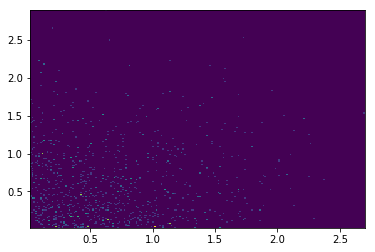

In [10]:
h = plt.hist2d(x1_list, x2_list, bins = [200, 200])

In [15]:
from autograd import grad
def test(x):
    return np.mean(x)

In [16]:
gg = grad(test)
gg(np.array([1,1]))

array([ 0.5,  0.5])

In [22]:
from torch.autograd.gradcheck import zero_gradients
def compute_jacobian(inputs, output):
	"""
	:param inputs: Batch X Size (e.g. Depth X Width X Height)
	:param output: Batch X Classes
	:return: jacobian: Batch X Classes X Size
	"""
	assert inputs.requires_grad

	num_classes = output.size()[1]

	jacobian = torch.zeros(num_classes, *inputs.size())
	grad_output = torch.zeros(*output.size())
	if inputs.is_cuda:
		grad_output = grad_output.cuda()
		jacobian = jacobian.cuda()

	for i in range(num_classes):
		zero_gradients(inputs)
		grad_output.zero_()
		grad_output[:, i] = 1
		output.backward(grad_output, retain_graph = True)
		jacobian[i] = inputs.grad.data

	return torch.transpose(jacobian, dim0=0, dim1=1)

In [5]:
x = torch.tensor([1.,2.,3.], requires_grad=True)
tmp = torch.zeros(1,3, requires_grad=True)
tmp.data[0] = x.data
y = transform(tmp)
y

tensor([[ 1.3133,  2.1269,  3.0486]])

In [6]:
z = compute_jacobian(tmp, y)

In [7]:
x.shape[0]

3

In [8]:
torch.det(z)

RuntimeError: det(torch.FloatTensor{[1, 3, 3]}): expected a 2D square tensor of floating types